# Objective of the Project:

## Build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

**Build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.**

# Importing required libraries.

In [1]:
#import vaex
import numpy as np   
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#from imblearn.over_sampling import SMOTE
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [2]:
print('''\n\033[1m''' + '''Loading Dataset....''' + '''\033[0m''')
pd.set_option("display.max_columns", None)
sd = pd.read_csv("signal-data.csv")


Loading Dataset....


In [3]:
print('''\n\033[1m''' + '''Getting 10 rows of data''' + '''\033[0m''')
sd.head(5)


Getting 10 rows of data


Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972  

In [4]:
print('''\n\033[1m''' + '''Checking unique data-types of Dataset''' + '''\033[0m''')
print(sd.dtypes.unique())


Checking unique data-types of Dataset
[dtype('O') dtype('float64') dtype('int64')]


In [5]:
print('''\n\033[1m''' + '''Getting data-type of each column of data set with thier length''' + '''\033[0m''')

Float=sd.select_dtypes(include='float64').columns
Int=sd.select_dtypes(include='int64').columns
Obj=sd.select_dtypes(include='object').columns

print('\nInteger type columns are\n',Int,'of Total',len(Int),'\n')
print('Float type of columns are\n',Float,'of Total',len(Float),'\n')
print('Object type columns are\n',Obj,'of Total',len(Obj),'\n')



Getting data-type of each column of data set with thier length

Integer type columns are
 Index(['Pass/Fail'], dtype='object') of Total 1 

Float type of columns are
 Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=590) of Total 590 

Object type columns are
 Index(['Time'], dtype='object') of Total 1 



In [6]:
print('''\n\033[1m''' + '''Getting shape of the data''' + '''\033[0m''')
print('The data contains \nNo. of rows = ',sd.shape[0],'\nNo. of columns = ',sd.shape[1])


Getting shape of the data
The data contains 
No. of rows =  1567 
No. of columns =  592


In [7]:
print('''\n\033[1m''' + '''Checking total number of missing values in each column:''' + '''\033[0m''')
for x in sd:
    i=sd[sd[x].isnull()].index.tolist()
    s = sd[x].isnull().sum()
    if s!=0:
        print('Column',x,'has total missing values of',len(i),'\n')


Checking total number of missing values in each column:
Column 0 has total missing values of 6 

Column 1 has total missing values of 7 

Column 2 has total missing values of 14 

Column 3 has total missing values of 14 

Column 4 has total missing values of 14 

Column 5 has total missing values of 14 

Column 6 has total missing values of 14 

Column 7 has total missing values of 9 

Column 8 has total missing values of 2 

Column 9 has total missing values of 2 

Column 10 has total missing values of 2 

Column 11 has total missing values of 2 

Column 12 has total missing values of 2 

Column 13 has total missing values of 3 

Column 14 has total missing values of 3 

Column 15 has total missing values of 3 

Column 16 has total missing values of 3 

Column 17 has total missing values of 3 

Column 18 has total missing values of 3 

Column 19 has total missing values of 10 

Column 21 has total missing values of 2 

Column 22 has total missing values of 2 

Column 23 has total mis

In [8]:
print('''\n\033[1m''' + '''Missing values with more than below value can be droped''' + '''\033[0m''')
sd.shape[0]/2


Missing values with more than below value can be droped


783.5

In [9]:
ulf=[]
ulf

[]

In [10]:
print('''\n\033[1m''' + '''Removing columns with missing values more than 784:\n''' + '''\033[0m''')
co=[]
for x in sd:
    i=sd[sd[x].isnull()].index.tolist()
    s = sd[x].isnull().sum()
    if s!=0:
        c=len(i)
        if c >= 784:
            print('Column',x,'has total missing values',c,'which is more than 784')
            print('Therefore Removing',x,'column\n')
            ulf.append(x)
            sd=sd.drop(x,axis=1)



Removing columns with missing values more than 784:

Column 72 has total missing values 794 which is more than 784
Therefore Removing 72 column

Column 73 has total missing values 794 which is more than 784
Therefore Removing 73 column

Column 85 has total missing values 1341 which is more than 784
Therefore Removing 85 column

Column 109 has total missing values 1018 which is more than 784
Therefore Removing 109 column

Column 110 has total missing values 1018 which is more than 784
Therefore Removing 110 column

Column 111 has total missing values 1018 which is more than 784
Therefore Removing 111 column

Column 157 has total missing values 1429 which is more than 784
Therefore Removing 157 column

Column 158 has total missing values 1429 which is more than 784
Therefore Removing 158 column

Column 220 has total missing values 1341 which is more than 784
Therefore Removing 220 column

Column 244 has total missing values 1018 which is more than 784
Therefore Removing 244 column

Colu

In [11]:
print('''\n\033[1m''' + '''Replacing other columns by their median value:''' + '''\033[0m''')
for x in sd:
    s = sd[x].isnull().sum()
    if s!=0:
        median=sd[x].median()
        print('Median of',x,median)
        sd[x].fillna(median,inplace=True)


Replacing other columns by their median value:
Median of 0 3011.49
Median of 1 2499.4049999999997
Median of 2 2201.0667
Median of 3 1285.2144
Median of 4 1.3168
Median of 5 100.0
Median of 6 101.5122
Median of 7 0.1224
Median of 8 1.4616
Median of 9 -0.0013
Median of 10 0.0004
Median of 11 0.9658
Median of 12 199.5356
Median of 13 0.0
Median of 14 8.966999999999999
Median of 15 412.2191
Median of 16 9.85175
Median of 17 0.9726
Median of 18 189.6642
Median of 19 12.4996
Median of 21 -5523.25
Median of 22 2664.0
Median of 23 -3820.75
Median of 24 -78.75
Median of 25 1.283
Median of 26 1.9865
Median of 27 7.2647
Median of 28 69.1556
Median of 29 2.3778
Median of 30 0.1867
Median of 31 3.431
Median of 32 85.13544999999999
Median of 33 8.7698
Median of 34 50.3964
Median of 35 64.1658
Median of 36 49.6036
Median of 37 66.23179999999999
Median of 38 86.8207
Median of 39 118.39930000000001
Median of 40 78.29
Median of 41 3.074
Median of 42 70.0
Median of 43 353.72090000000003
Median of 44 10.

In [12]:
ulf.append('Time')
sd1=sd.drop('Time',axis=1)

In [13]:
print('''\n\033[1m''' + '''Checking columns with all zero values:''' + '''\033[0m''')
print('Columns with all zero values are')
total=[]
for x in sd:
    if (sd[x] == 0).all() == True:
        total.append(x)
        print(x)
print('Total columns with all zero rows are',len(total))


Checking columns with all zero values:
Columns with all zero values are
13
52
97
141
149
178
179
186
189
190
191
192
193
194
226
229
230
231
232
233
234
235
236
237
240
241
242
243
256
257
258
259
260
261
262
263
264
265
266
276
284
313
314
315
322
325
326
327
328
329
330
364
369
370
371
372
373
374
375
378
379
380
381
394
395
396
397
398
399
400
401
402
403
404
414
422
449
450
451
458
461
462
463
464
465
466
481
498
501
502
503
504
505
506
507
508
509
512
513
514
515
528
529
530
531
532
533
534
535
536
537
538
Total columns with all zero rows are 112


In [14]:
print('''\n\033[1m''' + '''Droping all columns, with all zero rows''' + '''\033[0m''')
print('''\n\033[1m''' + '''Since having all records as zero means either the sensor is idel or faulty''' + '''\033[0m''')

for x in sd1:
    if (sd[x] == 0).all() == True:
        ulf.append(x)        
        sd1=sd1.drop(x,axis=1)



Droping all columns, with all zero rows

Since having all records as zero means either the sensor is idel or faulty


In [15]:
print('''\n\033[1m''' + '''Checking for columns with 0 Standard Deviation''' + '''\033[0m''')
stdo = [] 
for x in sd1:
    sd1[x]=sd1[x].astype(float)
    att = sd1[x]
    std = np.std(att) 
    if std == 0:
        stdo.append(x)
print(stdo)


Checking for columns with 0 Standard Deviation
['5', '42', '49', '69']


In [16]:
co=sd1.corr()
co

0         1         2         3         4   5         6  \
0          1.000000 -0.144161  0.004667 -0.006665 -0.010819 NaN  0.002028   
1         -0.144161  1.000000  0.005883 -0.008963 -0.001917 NaN -0.025222   
2          0.004667  0.005883  1.000000  0.298810  0.095881 NaN -0.136212   
3         -0.006665 -0.008963  0.298810  1.000000 -0.058351 NaN -0.685773   
4         -0.010819 -0.001917  0.095881 -0.058351  1.000000 NaN -0.074395   
...             ...       ...       ...       ...       ...  ..       ...   
586        0.018534 -0.009430 -0.025506  0.035164 -0.043831 NaN -0.041299   
587       -0.025867  0.017056 -0.029287 -0.039196 -0.031012 NaN  0.034113   
588       -0.028161  0.009868 -0.030743 -0.033755 -0.026115 NaN  0.032341   
589        0.004185  0.044552 -0.032763 -0.080942  0.050792 NaN  0.044039   
Pass/Fail -0.025100 -0.002542 -0.000999 -0.024014 -0.013633 NaN  0.016085   

                  7         8         9        10        11        12  \
0          0.031347 -0.052735  0.009091  0.006445  0.043432  0.010571   
1         -0.011761  0.031244  0.024025  0.009529 -0.027042  0.034308   
2         -0.147116  0.023524  0.016248  0.069902  0.036368  0.018359   
3          0.086965 -0.102839  0.066987  0.049785  0.039943 -0.028949   
4         -0.343413 -0.025933  0.053973 -0.006496 -0.001137 -0.002800   
...             ...       ...       ...       ...       ...       ...   
586        0.058019  0.010418  0.033700  0.000329  0.023011  0.037094   
587       -0.021518  0.022793  0.059181  0.046995 -0.014784 -0.012274   
588       -0.020936  0.026185  0.060609  0.046083 -0.009528 -0.012772   
589       -0.107904 -0.022864  0.004670  0.008462  0.015552 -0.036847   
Pass/Fail  0.012891  0.028022 -0.031180  0.033630 -0.032660 -0.005925   

                 14        15        16        17        18        19  \
0         -0.007191  0.030745 -0.005720  0.012496  0.017997 -0.009350   
1         -0.037730 -0.087226 -0.001812 -0.010076  0.043390 -0.003172   
2          0.006494  0.006116 -0.000805 -0.004898  0.021890 -0.026671   
3         -0.020144 -0.013440 -0.004475  0.042937 -0.029514  0.040384   
4         -0.017583  0.011395 -0.001730  0.000312 -0.001742  0.007237   
...             ...       ...       ...       ...       ...       ...   
586       -0.063493 -0.011123 -0.054482  0.016002  0.089901  0.019151   
587        0.044288  0.016083  0.026367 -0.032275 -0.037020  0.032290   
588        0.036653  0.014401  0.028840 -0.021645 -0.039837  0.035278   
589        0.068237  0.009769 -0.013917 -0.013225 -0.030705 -0.015232   
Pass/Fail -0.068968 -0.002859  0.002368 -0.009746 -0.008782  0.030586   

                 20        21        22        23        24        25  \
0          0.025773 -0.011373  0.032438 -0.046631 -0.015075  0.107802   
1          0.032532  0.058213 -0.052712 -0.015985 -0.059887  0.004832   
2          0.015437  0.044653 -0.029961  0.009196 -0.021048 -0.025910   
3          0.037980  0.020765 -0.033073 -0.006984 -0.049871  0.078607   
4          0.012824  0.008305 -0.007777  0.005168 -0.013682  0.028113   
...             ...       ...       ...       ...       ...       ...   
586        0.046859  0.057966 -0.036168  0.017682  0.016465  0.082534   
587       -0.018362  0.022184 -0.046624  0.021694  0.003141 -0.075616   
588       -0.017215  0.017721 -0.036598  0.009089 -0.006234 -0.065057   
589       -0.019900 -0.030923  0.004361 -0.037910 -0.016854 -0.084279   
Pass/Fail  0.023253  0.108333 -0.073646  0.012850 -0.018129 -0.035383   

                 26        27        28        29        30        31  \
0          0.092542  0.106749  0.054828 -0.030918 -0.039741 -0.055994   
1         -0.023953  0.003840 -0.022899  0.001764  0.052170 -0.051542   
2         -0.027251 -0.025128 -0.061773  0.049783  0.062159 -0.007950   
3          0.035440  0.084145  0.096031 -0.013284  0.001784 -0.107694   
4          0.010989  0.028485  0.007573 -0.012846  0.001958 -0.035120   
...             ...     

In [17]:
upper=co.where(np.triu(np.ones(co.shape),k=1).astype(np.bool))
upper

0         1         2         3         4   5         6         7  \
0         NaN -0.144161  0.004667 -0.006665 -0.010819 NaN  0.002028  0.031347   
1         NaN       NaN  0.005883 -0.008963 -0.001917 NaN -0.025222 -0.011761   
2         NaN       NaN       NaN  0.298810  0.095881 NaN -0.136212 -0.147116   
3         NaN       NaN       NaN       NaN -0.058351 NaN -0.685773  0.086965   
4         NaN       NaN       NaN       NaN       NaN NaN -0.074395 -0.343413   
...        ..       ...       ...       ...       ...  ..       ...       ...   
586       NaN       NaN       NaN       NaN       NaN NaN       NaN       NaN   
587       NaN       NaN       NaN       NaN       NaN NaN       NaN       NaN   
588       NaN       NaN       NaN       NaN       NaN NaN       NaN       NaN   
589       NaN       NaN       NaN       NaN       NaN NaN       NaN       NaN   
Pass/Fail NaN       NaN       NaN       NaN       NaN NaN       NaN       NaN   

                  8         9        10        11        12        14  \
0         -0.052735  0.009091  0.006445  0.043432  0.010571 -0.007191   
1          0.031244  0.024025  0.009529 -0.027042  0.034308 -0.037730   
2          0.023524  0.016248  0.069902  0.036368  0.018359  0.006494   
3         -0.102839  0.066987  0.049785  0.039943 -0.028949 -0.020144   
4         -0.025933  0.053973 -0.006496 -0.001137 -0.002800 -0.017583   
...             ...       ...       ...       ...       ...       ...   
586             NaN       NaN       NaN       NaN       NaN       NaN   
587             NaN       NaN       NaN       NaN       NaN       NaN   
588             NaN       NaN       NaN       NaN       NaN       NaN   
589             NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail       NaN       NaN       NaN       NaN       NaN       NaN   

                 15        16        17        18        19        20  \
0          0.030745 -0.005720  0.012496  0.017997 -0.009350  0.025773   
1         -0.087226 -0.001812 -0.010076  0.043390 -0.003172  0.032532   
2          0.006116 -0.000805 -0.004898  0.021890 -0.026671  0.015437   
3         -0.013440 -0.004475  0.042937 -0.029514  0.040384  0.037980   
4          0.011395 -0.001730  0.000312 -0.001742  0.007237  0.012824   
...             ...       ...       ...       ...       ...       ...   
586             NaN       NaN       NaN       NaN       NaN       NaN   
587             NaN       NaN       NaN       NaN       NaN       NaN   
588             NaN       NaN       NaN       NaN       NaN       NaN   
589             NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail       NaN       NaN       NaN       NaN       NaN       NaN   

                 21        22        23        24        25        26  \
0         -0.011373  0.032438 -0.046631 -0.015075  0.107802  0.092542   
1          0.058213 -0.052712 -0.015985 -0.059887  0.004832 -0.023953   
2          0.044653 -0.029961  0.009196 -0.021048 -0.025910 -0.027251   
3          0.020765 -0.033073 -0.006984 -0.049871  0.078607  0.035440   
4          0.008305 -0.007777  0.005168 -0.013682  0.028113  0.010989   
...             ...       ...       ...       ...       ...       ...   
586             NaN       NaN       NaN       NaN       NaN       NaN   
587             NaN       NaN       NaN       NaN       NaN       NaN   
588             NaN       NaN       NaN       NaN       NaN       NaN   
589             NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail       NaN       NaN       NaN       NaN       NaN       NaN   

                 27        28        29        30        31        32  \
0          0.106749  0.054828 -0.030918 -0.039741 -0.055994 -0.004630   
1          0.003840 -0.022899  0.001764  0.052170 -0.051542 -0.044621   
2         -0.025128 -0.061773  0.049783  0.062159 -0.007950 -0.023447   
3          0.084145  0.096031 -0.013284  0.001784 -0.107694 -0.020255   
4          0.028485  0.007573 -0.012846  0.

In [18]:
l=[column for column in upper.columns if any (upper[column]>.8)]

for x in l:
    ulf.append(x)
    sd1=sd1.drop(x,axis=1)

5 is Symmetrically Skewed as Skewness = 0 



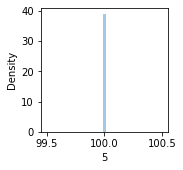

42 is Symmetrically Skewed as Skewness = 0 



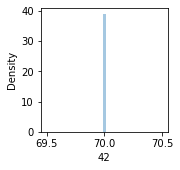

49 is Symmetrically Skewed as Skewness = 0 



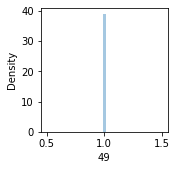

69 is Symmetrically Skewed as Skewness = 0 



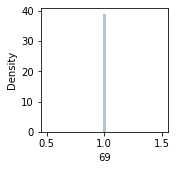

In [19]:
n=1
pds2=sd[['5','42','49','69']]
for x in pds2:
    series          = pds2[x]
    skewness        = series.skew()
    if skewness > -.5  and skewness < .5 :
        print(x,"is Symmetrically Skewed as Skewness =",round(skewness,3),'\n')
    elif skewness > .25:
            print(x,"is Positively Skewed towards Right side of asymmetric distribution as Skewness =",round(skewness,3),'\n')
    elif skewness < -.25:
            print(x,"is Negatively Skewed towards Left side of asymmetric distribution as Skewness =",round(skewness,3),'\n')
    plt.figure(figsize= (5,5))
    plt.subplot(2,2,n)
    n=n+1
    sns.distplot(pds2[x])
    plt.xlabel(x)
    plt.show()

In [20]:
print('''\n\033[1m''' + '''Droping all columns, of NaN correlaton with Pass/Fail column''' + '''\033[0m''')        
stdo = [] 
for x in sd1:
    sd1[x]=sd1[x].astype(float)
    att = sd1[x]
    std = np.std(att) 
    if std == 0:
        stdo.append(x)
        ulf.append(x)
        sd1=sd1.drop(x,axis=1)
print('Which are:',stdo)


Droping all columns, of NaN correlaton with Pass/Fail column
Which are: ['5', '42', '49', '69']


In [21]:
print('''\n\033[1m''' + '''Checking columns having low variance''' + '''\033[0m''')        
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(0.01))
selector.fit(sd1)


Checking columns having low variance


VarianceThreshold(threshold=0.01)

In [22]:
cols=[column for column in sd1.columns
      if column not in sd1.columns[selector.get_support()]]
print('''\n\033[1m''' + '''''' + '''\033[0m''',)        
print('Total columns having variance less than .01 are:\n',len(cols),'\nWhich are\n',list(cols))



Total columns having variance less than .01 are:
 91 
Which are
 ['7', '8', '9', '10', '11', '17', '20', '53', '56', '57', '58', '75', '76', '77', '78', '79', '80', '81', '82', '84', '86', '87', '89', '91', '92', '93', '94', '95', '99', '100', '102', '103', '104', '105', '106', '107', '108', '112', '113', '114', '116', '118', '119', '121', '130', '131', '132', '143', '144', '145', '146', '153', '156', '168', '171', '172', '173', '176', '210', '211', '212', '213', '214', '215', '216', '217', '219', '221', '222', '224', '227', '228', '238', '239', '247', '248', '251', '253', '254', '267', '367', '368', '542', '543', '544', '558', '565', '582', '583', '586', '587']


In [23]:
for x in cols:
    ulf.append(x)

In [24]:
sd1=sd1.drop(cols,axis=1)
sd1

0        1          2          3       4         6        12  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   
...       ...      ...        ...        ...     ...       ...       ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  203.9867   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  204.0173   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  199.5356   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  197.2448   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  199.5356   

           14        15        16        18       19       21       22  \
0      7.9558  414.8710  10.04330  192.3963  12.5190 -5419.00  2916.50   
1     10.1548  414.7347   9.25990  191.2872  12.4608 -5441.50  2604.25   
2      9.5157  416.7075   9.31440  192.7035  12.5404 -5447.75  2701.75   
3      9.6052  422.2894   9.69240  192.1557  12.4782 -5468.25  2648.25   
4     10.5661  420.5925  10.33870  191.6037  12.4735 -5476.25  2635.25   
...       ...       ...       ...       ...      ...      ...      ...   
1562  11.7692  419.3404  10.23970  193.7470  12.5373 -5418.75  2608.00   
1563   9.1620  405.8178  10.22850  193.7889  12.4020 -6408.75  2277.50   
1564   8.9670  412.2191   9.85175  189.6642  12.4555 -5153.25  2707.00   
1565   9.7354  401.9153   9.86300  187.3818  12.3937 -5271.75  2676.50   
1566   8.9670  412.2191   9.85175  189.6642  12.4790 -5319.50  2668.00   

           23       24      25       28      29      31       32      33  \
0    -4043.75   751.00  0.8955  64.2333  2.0222  3.5191  83.3971  9.5126   
1    -3498.75 -1640.25  1.2973  68.4222  2.2667  3.4171  84.9052  9.7997   
2    -4047.00 -1916.50  1.3122  67.1333  2.3333  3.5986  84.7569  8.6590   
3    -4515.00 -1657.25  1.3137  62.9333  2.6444  3.3813  84.9105  8.6789   
4    -3987.50   117.00  1.2887  62.8333  3.1556  3.2728  86.3269  8.7677   
...       ...      ...     ...      ...     ...     ...      ...     ...   
1562 -6228.25   356.00  1.2817  71.1444  2.2222  3.4680  83.8405  8.7164   
1563 -3675.50   339.00  1.0870  72.8444  2.0000  4.7088  84.0623  8.9607   
1564 -4102.00 -1226.00  1.2930  71.2667  2.2333  3.4912  85.8638  8.1728   
1565 -4001.50   394.75  1.2875  70.5111  2.9667  3.2803  84.5602  9.1930   
1566 -3951.75  -425.00  1.3020  73.0667  2.5889  3.3860  83.3424  8.7786   

           34       35       36       37       38        39     40     41  \
0     50.6170  64.2588  49.3830  66.3141  86.9555  117.5132  61.29  4.515   
1     50.6596  64.2828  49.3404  64.9193  87.5241  118.1188  78.25  2.773   
2     50.1530  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434   
3     50.5100  64.1125  49.4900  65.1951  86.6867  117.0442  76.90  1.279   
4     50.2480  64.1511  49.7520  66.1542  86.1468  121.4364  76.39  2.209   
...       ...      ...      ...      ...      ...       ...    ...    ...   
1562  50.2482  64.3573  49.7518  66.2013  86.3672  120.5156  81.21  1.427   
1563  50.2067  64.1176  49.7934  66.1488  86.4051  120.2552  79.43  2.945   
1564  50.9333  64.4062  49.0667  65.8936  86.3506  117.8912  82.03  2.863   
1565  50.6547  64.0158  49.3453  66.2301  86.3130  118.9288  81.13  2.067   
1566  50.1940  64.2226  49.8060  66.2251  86.4039  120.5418  80.45  2.741   

            43       44        45      47        48        51      55  \
0     352.7173  10.1841  130.3691  1.3072  141.2282  218.3174  2834.0   
1     352.2445  10.0373  133.1727  1.2887  145.8445  205.1695  2853.0   
2     364.3782   9.8783  131.8027  1.2992  141.0845  185.7574  2936.0   
3     363.0273   9.9305  131.8027  1.3027  142.5427  189.9079  2936.0   
4     3

#### 5 point summary defiened  given as follows:
>1. The minimum.
2. Q1 (the first quartile, or the 25% mark).
3. The median (50%).
4. Q3 (the third quartile, or the 75% mark).
5. The maximum.

In [25]:
print('''\n\033[1m''' + '''Statistical Analysis of dataset''' + '''\033[0m''')
sd.describe()


Statistical Analysis of dataset


0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000   
mean    100.0   101.116476     0.121825     1.462860    -0.000842   
std       0.0     6.209385     0.008936     0.073849     0.015107   
min     100.0    82.131100     0.000000     1.191000    -0.053400   
25%     100.0    97.937800     0.121100     1.411250    -0.010800   
50%     100.0   101.512200     0.122400     1.461600    -0.001300   
75%     100.0   104.530000     0.123800     1.516850     0.008400   
max     100.0   129.252200     0.128600     1.656400     0.074900   

                10           11           12      13           14  \
count  1567.000000  1567.000000  1567.000000  1567.0  1567.000000   
mean      0.000146     0.964355   199.956272     0.0     9.005297   
std       0.009296     0.012444     3.255230     0.0     2.793916   
min      -0.034900     0.655400   182.094000     0.0     2.249300   
25%      -0.005600     0.958100   198.130950     0.0     7.096750   
50%       0.000400     0.965800   199.535600     0.0     8.967000   
75%       0.005900     0.971300   202.006750     0.0    10.858700   
max       0.053000     0.984800   272.045100     0.0    19.546500   

                15           16           17           18           19  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    413.084376     9.907496     0.971446   190.046620    12.481152   
std      17.204633     2.401564     0.012051     2.778426     0.217273   
min     333.448600     4.469600     0.579400   169.177400     9.877300   
25%     406.131000     9.568550     0.968250   188.300650    12.460000   
50%     412.219100     9.851750     0.972600   189.664200    12.499600   
75%     419.082800    10.127750     0.976800   192.178900    12.547100   
max     824.927100   102.867700     0.984800   215.597700    12.989800   

                20           21           22           23            24  \
count  1567.000000  1567.000000  1567.000000  1567.000000   1567.000000   
mean      1.405054 -5618.272176  2699.333280 -3806.318177   -298.317538   
std       0.016737   626.430997   295.312481  1379.280633   2900.846582   
min       1.179700 -7150.250000     0.000000 -9986.750000 -14804.500000   
25%       1.396500 -5932.625000  2578.125000 -4370.625000  -1474.375000   
50%       1.406000 -5523.250000  2664.000000 -3820.750000    -78.750000   
75%       1.415000 -5356.625000  2840.625000 -3356.375000   1376.250000   
max       1.453400     0.000000  3656.250000  2363.000000  14106.000000   

                25           26           27           28           29  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      1.203946     1.938538     6.639427    69.499093     2.366212   
std       0.177510     0.189382     1.243655     3.458992     0.408433   
min       0.000000     0.000000     0.000000    59.400000     0.666700   
25%       1.094900     1.906750     5.267350    67.383350     2.088900   
50%       1.283000     1.986500     7.264700    69.155600     2.377800   
75%       1.304300     2.003200     7.329600    72.255550     2.655600   
max       1.382800     2.052800     7.658800    77.900000     3.511100   

                30          31           32           33          34  \
count  1567.000000  1567


Checking of outliers of each columns:
Total no. of outliers in column 0 are 16
Outlier Value are [2787.49, 3245.0, 3266.04, 2792.24, 2743.24, 3244.74, 3254.32, 3299.4, 3282.87, 3339.93, 3266.55, 3356.35, 3284.82, 3273.46, 3246.31, 2770.4]


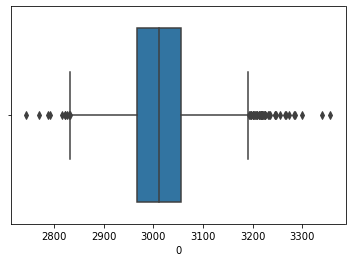

Total no. of outliers in column 1 are 19
Outlier Value are [2748.67, 2788.4, 2809.79, 2739.19, 2810.12, 2162.87, 2786.97, 2226.99, 2187.67, 2186.06, 2158.75, 2221.1, 2846.44, 2254.99, 2233.29, 2839.46, 2744.54, 2806.91, 2815.31]


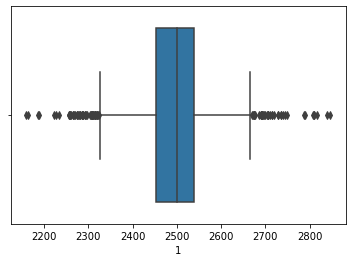

Total no. of outliers in column 2 are 12
Outlier Value are [2304.2111, 2315.2667, 2315.2667, 2315.2667, 2060.66, 2060.66, 2060.66, 2060.66, 2060.66, 2060.66, 2060.66, 2306.1]


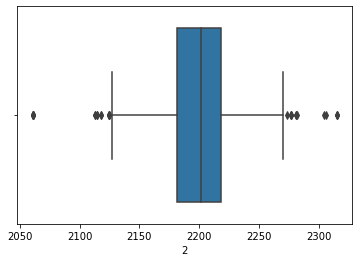

Total no. of outliers in column 3 are 32
Outlier Value are [2941.8341, 3715.0417, 3619.7397, 3619.7397, 3619.7397, 0.0, 3355.2007, 3355.2007, 2945.8855, 2914.1792, 3530.2362, 2945.8855, 2882.8558, 2945.8855, 2945.8855, 3530.2362, 3530.2362, 3085.3781, 3530.2362, 2882.8558, 3530.2362, 3085.3781, 2837.8788, 2882.8558, 3530.2362, 2837.8788, 2914.1792, 2914.1792, 3085.3781, 2945.8855, 3085.3781, 2914.1792]


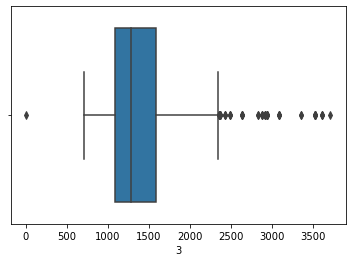

Total no. of outliers in column 4 are 4
Outlier Value are [1112.16, 1112.0769, 1114.5366, 1112.4728]


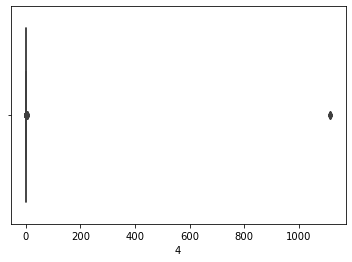

Total no. of outliers in column 6 are 20
Outlier Value are [129.2522, 129.2522, 129.2522, 119.9011, 82.1311, 82.1311, 123.4244, 123.4244, 119.9011, 123.4244, 82.2467, 82.2467, 123.41, 119.8822, 119.8822, 119.8822, 123.4244, 119.8822, 82.2467, 82.2467]


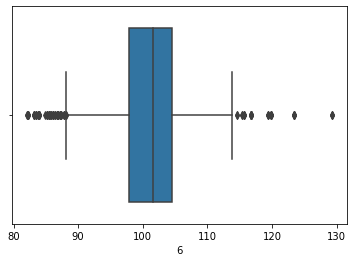

Total no. of outliers in column 12 are 5
Outlier Value are [226.0086, 210.5179, 210.618, 272.0451, 182.094]


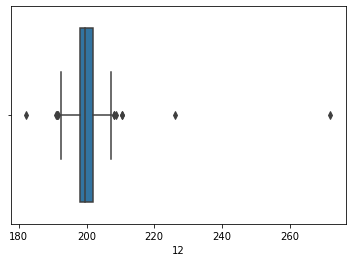

Total no. of outliers in column 14 are 6
Outlier Value are [17.8597, 18.8626, 18.1408, 19.5465, 18.4695, 18.0388]


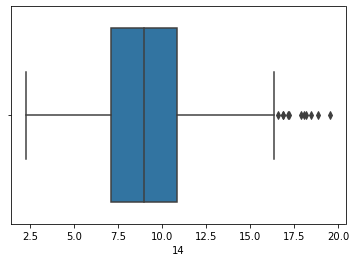

Total no. of outliers in column 15 are 4
Outlier Value are [824.9271, 817.003, 333.4486, 504.9312]


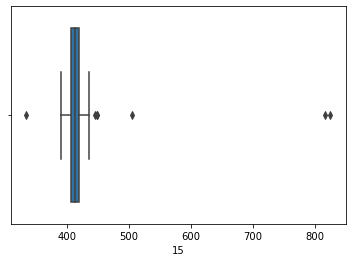

Total no. of outliers in column 16 are 1
Outlier Value are [102.8677]


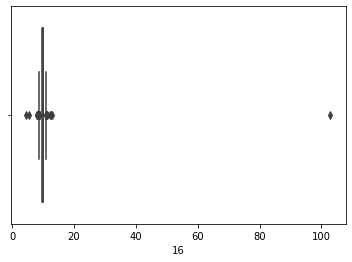

Total no. of outliers in column 18 are 9
Outlier Value are [215.5977, 181.2176, 198.736, 199.1236, 200.1544, 200.3134, 169.1774, 172.1654, 181.1119]


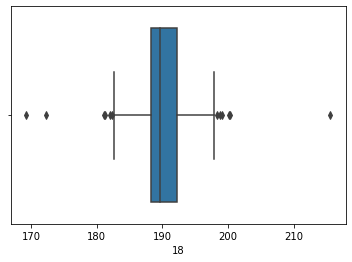

Total no. of outliers in column 19 are 11
Outlier Value are [10.7029, 10.7151, 10.7151, 9.8773, 9.8773, 9.8773, 9.8773, 9.8773, 9.8773, 9.8773, 9.8773]


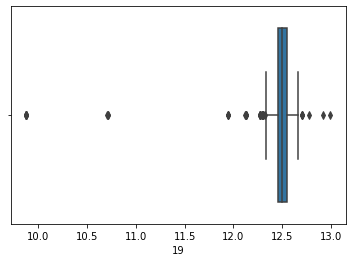

Total no. of outliers in column 21 are 24
Outlier Value are [-2727.5, -1431.5, -2694.75, -2664.25, -2681.75, -2706.0, -2622.5, -1362.0, -3281.0, -2575.5, -1368.75, -2597.0, -2649.25, -2665.5, -2609.25, -1502.75, -3293.5, -1918.25, -2595.0, -1480.75, -3345.75, -2668.5, 0.0, -1263.5]


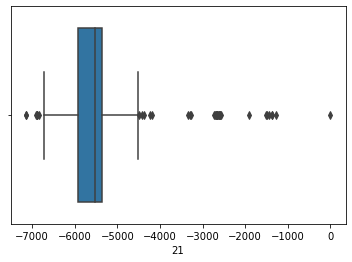

Total no. of outliers in column 22 are 27
Outlier Value are [1400.0, 619.5, 1476.25, 1542.0, 1496.25, 1445.75, 1550.0, 710.25, 1523.25, 1544.5, 653.75, 1474.25, 1461.25, 1485.75, 1505.5, 606.5, 1515.5, 736.75, 1455.5, 609.5, 1397.0, 1538.25, 3589.0, 0.0, 3613.75, 820.0, 3656.25]


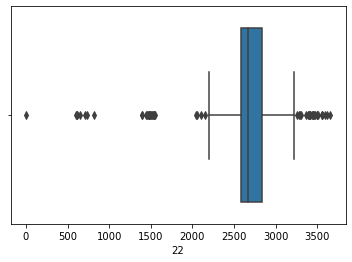

Total no. of outliers in column 23 are 32
Outlier Value are [1614.75, 908.25, 2363.0, 1932.5, 670.25, 1830.75, -8690.25, 417.0, 1889.25, -8718.6667, -8621.3333, 2287.0, 451.5, 1041.25, 925.3333, 645.75, 398.0, 1401.5, 1094.0, 605.25, -9141.5, 1975.25, -9986.75, 1143.75, 794.5, -8755.6667, -8812.25, -8112.3333, -7964.0, 333.75, 1039.25, -8480.0]


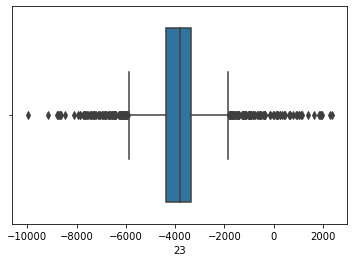

Total no. of outliers in column 24 are 36
Outlier Value are [-14804.5, -9191.5, -10366.333, 10248.75, 9133.0, 11034.75, 9013.5, 10969.3333, 9841.0, 8981.0, -13232.5, 10126.6667, 9022.0, 9092.75, 8777.0, 9055.5, -11705.333, -9440.0, 9329.0, 8902.6667, -11532.25, -14228.667, 9331.3333, 10981.5, 14106.0, 8673.0, 8525.5, 10386.6667, -9228.5, 9503.3333, 13880.0, -10169.0, -9533.6667, -10077.75, 9309.0, -10762.5]


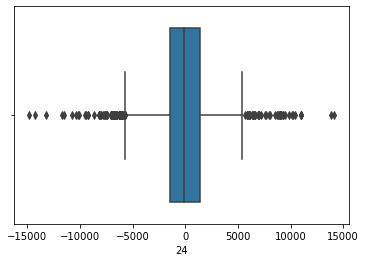

Total no. of outliers in column 25 are 35
Outlier Value are [0.455, 0.2328, 0.4495, 0.4425, 0.443, 0.4515, 0.446, 0.224, 0.4397, 0.6679999999999999, 0.4373, 0.652, 0.2253, 0.6557, 0.4385, 0.441, 0.6565, 0.4525, 0.438, 0.2367, 0.4417, 0.219, 0.6518, 0.4527, 0.2315, 0.4552, 0.4477, 0.0, 0.2122, 0.6438, 0.6268, 0.65, 0.556, 0.6002, 0.657]


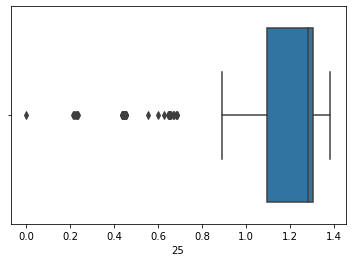

Total no. of outliers in column 28 are 0
Outlier Value are []


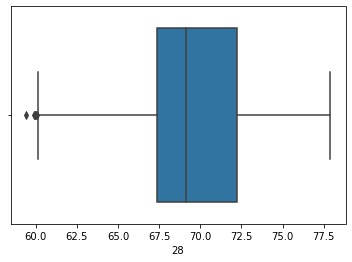

Total no. of outliers in column 29 are 10
Outlier Value are [0.7111, 0.9889, 0.7667, 0.6667, 1.0333, 1.0333, 0.8778, 1.0667, 1.0444, 0.7667]


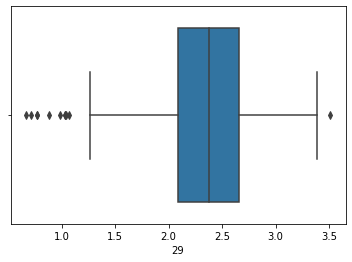

Total no. of outliers in column 31 are 0
Outlier Value are []


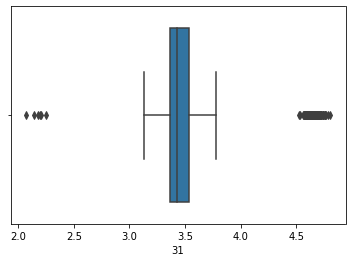

Total no. of outliers in column 32 are 27
Outlier Value are [101.9072, 101.9072, 101.9072, 101.9072, 92.072, 92.072, 92.072, 92.072, 92.072, 92.072, 92.072, 103.1082, 103.1082, 103.1082, 103.1082, 103.1082, 103.1082, 103.1082, 93.8653, 93.8653, 93.8653, 93.8653, 93.8653, 93.8653, 99.771, 105.6038, 105.6038]


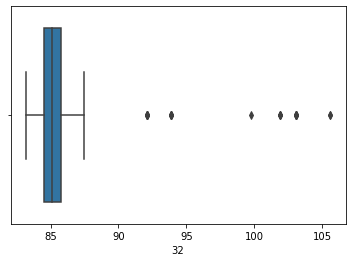

Total no. of outliers in column 33 are 19
Outlier Value are [23.3453, 23.3453, 23.3453, 23.3453, 23.1583, 23.1583, 23.1583, 23.1583, 23.1583, 23.1583, 23.1583, 13.5481, 13.5481, 13.5481, 13.5481, 13.5481, 21.5944, 13.5481, 13.5481]


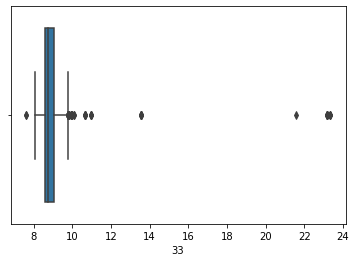

Total no. of outliers in column 34 are 32
Outlier Value are [57.6663, 57.6663, 57.6663, 57.6663, 59.7711, 59.7711, 59.3488, 59.3488, 59.7711, 59.3488, 59.3488, 59.3488, 59.7711, 59.3488, 59.3488, 59.7711, 57.7421, 57.7421, 57.7421, 57.7421, 57.7421, 57.7421, 57.7421, 57.8485, 57.8485, 57.8485, 57.8485, 57.8485, 57.8485, 58.7862, 58.8024, 58.8024]


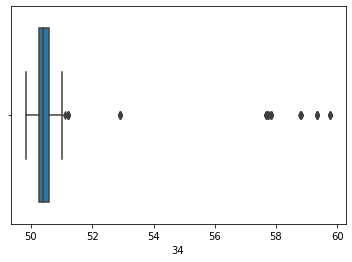

Total no. of outliers in column 35 are 38
Outlier Value are [74.7081, 74.7081, 74.7081, 74.7081, 79.2786, 79.2786, 78.25399999999998, 78.25399999999998, 79.2786, 78.25399999999998, 78.25399999999998, 78.25399999999998, 79.2786, 78.25399999999998, 78.25399999999998, 79.2786, 74.8511, 74.8511, 74.8511, 74.8511, 74.8511, 74.8511, 74.8511, 76.2508, 94.2641, 76.2508, 76.2508, 76.2508, 94.2641, 94.2641, 76.2508, 94.2641, 76.2508, 94.2641, 94.2641, 76.4763, 76.1632, 76.1632]


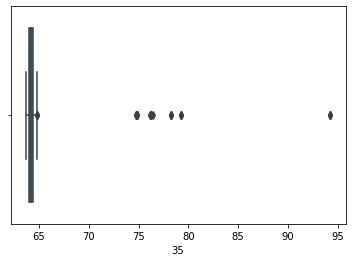

Total no. of outliers in column 36 are 32
Outlier Value are [42.3337, 42.3337, 42.3337, 42.3337, 40.2289, 40.2289, 40.6512, 40.6512, 40.2289, 40.6512, 40.6512, 40.6512, 40.2289, 40.6512, 40.6512, 40.2289, 42.2579, 42.2579, 42.2579, 42.2579, 42.2579, 42.2579, 42.2579, 42.1515, 42.1515, 42.1515, 42.1515, 42.1515, 42.1515, 41.2139, 41.1976, 41.1976]


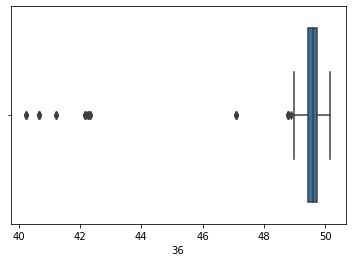

Total no. of outliers in column 37 are 33
Outlier Value are [64.9193, 65.1951, 65.0665, 65.0665, 65.1951, 65.1111, 65.1951, 65.0894, 64.9193, 65.1893, 65.1893, 65.1902, 64.9193, 65.1893, 64.9193, 65.1893, 65.1902, 65.1893, 67.199, 67.199, 67.1943, 67.199, 67.199, 67.199, 67.1943, 67.199, 67.1943, 67.1943, 67.1943, 67.199, 67.1943, 67.1943, 67.9586]


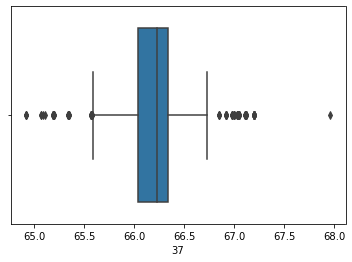

Total no. of outliers in column 38 are 71
Outlier Value are [84.7327, 84.7327, 88.3312, 88.3312, 88.3312, 88.2425, 85.1414, 88.3548, 88.2847, 88.3548, 88.3548, 84.7327, 88.2074, 88.2425, 88.3312, 88.2425, 88.3282, 88.3282, 88.2425, 88.3282, 88.3548, 88.2207, 88.2109, 88.2847, 88.2425, 85.1414, 88.3548, 88.3282, 88.3282, 88.2109, 88.3282, 88.2074, 85.1414, 88.3548, 88.3312, 88.4188, 88.4188, 88.2109, 88.2207, 88.4188, 88.2109, 88.2207, 88.24, 88.2207, 88.2109, 88.2074, 85.1414, 88.2109, 88.2109, 88.4188, 88.4188, 88.4188, 88.2425, 88.3282, 88.24, 88.2207, 88.2074, 88.4188, 88.24, 88.2207, 88.24, 88.2425, 88.2207, 88.2894, 88.24, 88.24, 88.3312, 88.2074, 88.2894, 88.24, 88.2894]


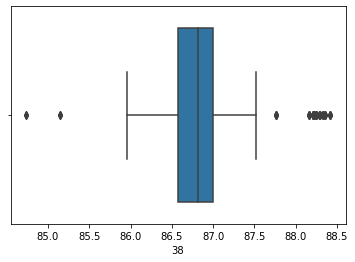

Total no. of outliers in column 39 are 37
Outlier Value are [111.7128, 126.5662, 126.5662, 126.5662, 126.5662, 111.7128, 111.7128, 111.7128, 133.3898, 133.3898, 132.5378, 132.5378, 133.3898, 132.5378, 132.5378, 132.5378, 133.3898, 124.6244, 132.5378, 132.5378, 133.3898, 127.3944, 127.3944, 127.3944, 127.3944, 127.3944, 127.3944, 127.3944, 125.9348, 125.9348, 125.9348, 125.9348, 125.9348, 125.9348, 125.0222, 126.0786, 126.0786]


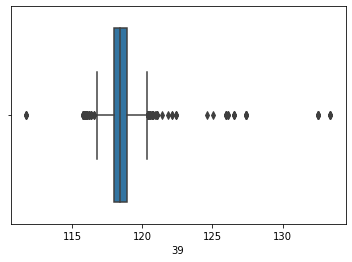

Total no. of outliers in column 40 are 0
Outlier Value are []


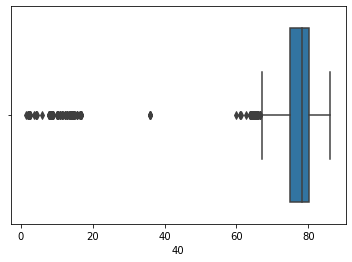

Total no. of outliers in column 41 are 6
Outlier Value are [37.88, 37.88, 37.88, 37.88, 37.88, 37.88]


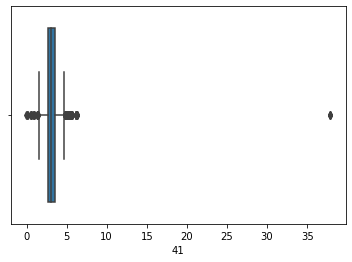

Total no. of outliers in column 43 are 6
Outlier Value are [376.0782, 377.2973, 375.2936, 374.8218, 374.9509, 376.4691]


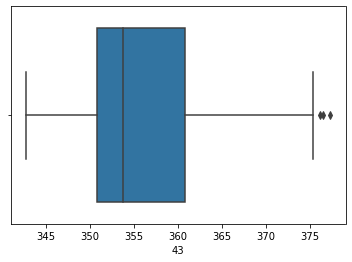

Total no. of outliers in column 44 are 10
Outlier Value are [10.6071, 10.5903, 9.4941, 9.4867, 9.4735, 9.4853, 9.464, 9.4999, 11.053, 10.5994]


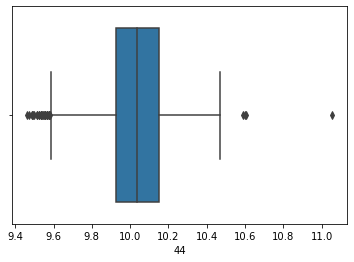

Total no. of outliers in column 45 are 10
Outlier Value are [176.3136, 108.8464, 164.5955, 163.1527, 167.1618, 169.0418, 163.6618, 168.7655, 161.0709, 110.3945]


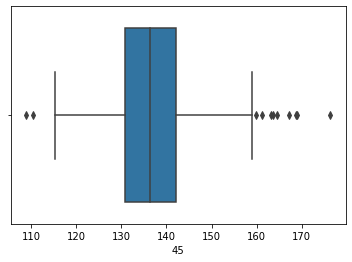

Total no. of outliers in column 47 are 1
Outlier Value are [0.4967]


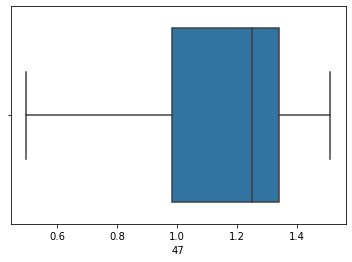

Total no. of outliers in column 48 are 5
Outlier Value are [125.9727, 125.7982, 126.1864, 154.94, 163.2509]


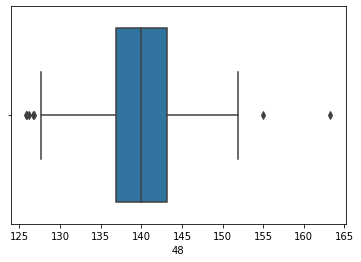

Total no. of outliers in column 51 are 0
Outlier Value are []


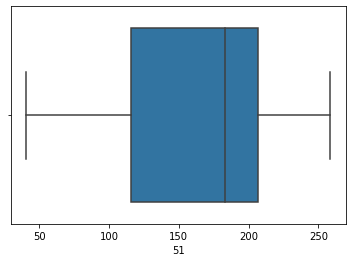

Total no. of outliers in column 55 are 5
Outlier Value are [2936.0, 2936.0, 2936.0, 2936.0, 2936.0]


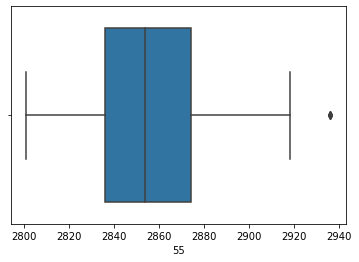

Total no. of outliers in column 59 are 5
Outlier Value are [87.0391, -28.9882, 168.1455, 36.3682, 53.6818]


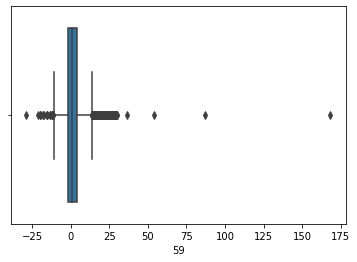

Total no. of outliers in column 61 are 16
Outlier Value are [9.5543, 9.5055, 9.4952, 11.496, 11.7063, 9.5748, 11.7849, 9.5798, 9.5577, 9.5044, 11.3067, 9.5335, 9.4611, 11.5887, 9.5052, 9.5718]


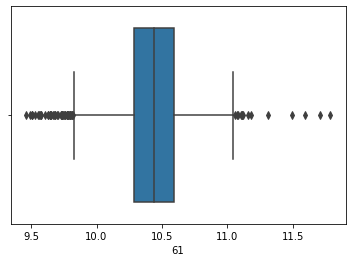

Total no. of outliers in column 62 are 14
Outlier Value are [144.0191, 89.8127, 90.29, 90.3318, 81.49, 88.4391, 86.5655, 144.5618, 189.6609, 87.4618, 85.5091, 287.1509, 143.9527, 168.1936]


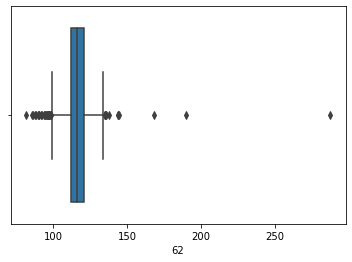

Total no. of outliers in column 63 are 8
Outlier Value are [39.6172, 38.8027, 40.0636, 89.5305, 35.8527, 188.0923, 53.9451, 37.2708]


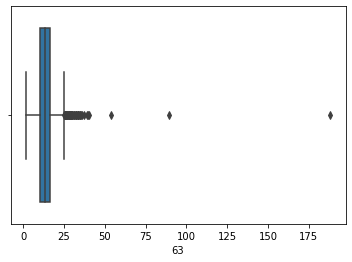

Total no. of outliers in column 64 are 23
Outlier Value are [38.4118, 37.4791, 36.0945, 39.1518, 37.9336, 48.3127, 41.2055, 41.5664, 37.4173, 35.5718, 39.5164, 37.9573, 36.72, 37.3591, 38.8827, 35.5318, 41.8473, 38.6282, 36.8864, 48.9882, 38.0518, 42.63, 39.9927]


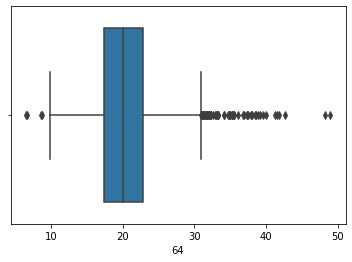

Total no. of outliers in column 67 are 4
Outlier Value are [6363.6566, 7272.8283, 3637.0928, 6363.8013]


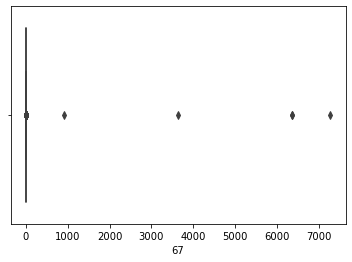

Total no. of outliers in column 68 are 5
Outlier Value are [127.5891, 110.4282, 106.8409, 87.0255, 167.8309]


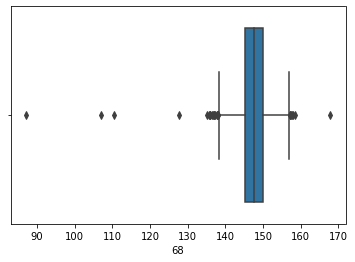

Total no. of outliers in column 71 are 40
Outlier Value are [204.8898, 200.0261, 211.8448, 222.2734, 221.6792, 209.8135, 224.9449, 207.1709, 210.5112, 218.5524, 231.4128, 225.5875, 227.2577, 222.1145, 227.2456, 238.4775, 224.1387, 223.4975, 213.9842, 209.5703, 233.6113, 227.4135, 229.5238, 199.5758, 220.1348, 211.9558, 212.8519, 202.2698, 204.7133, 202.4137, 214.1869, 220.5295, 202.4391, 203.129, 209.4001, 224.9621, 211.8978, 220.4506, 214.0137, 225.0767]


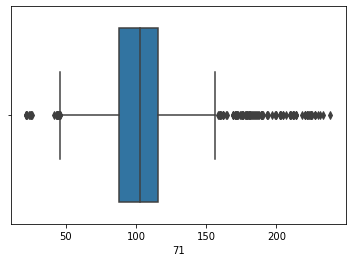

Total no. of outliers in column 74 are 1
Outlier Value are [4.1955]


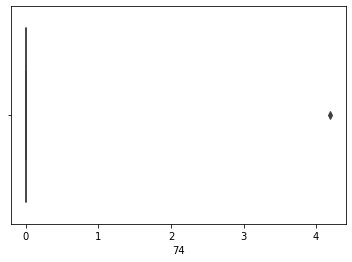

Total no. of outliers in column 83 are 2
Outlier Value are [5.8337, 5.8257]


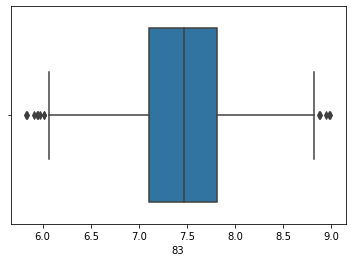

Total no. of outliers in column 88 are 7
Outlier Value are [1632.312, 2105.1823, 1642.5266, 1634.0957, 1633.1937, 1627.4714, 1627.4714]


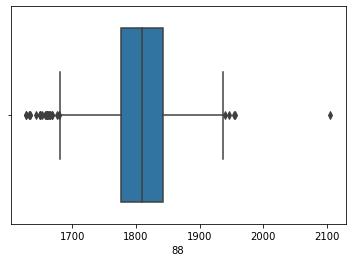

Total no. of outliers in column 90 are 13
Outlier Value are [7397.31, 10746.6, 10358.1, 10206.58, 7539.29, 7574.11, 7406.64, 10653.5, 10608.8, 10090.3399, 10090.3301, 10137.4601, 10228.08]


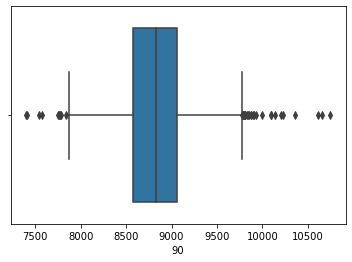

Total no. of outliers in column 96 are 23
Outlier Value are [1.895, 0.7972, -1.4803, 0.7696, 1.2055, 0.7164, -1.2004, -0.6587, -0.9229, 0.8166, -0.6788, -1.0008, -0.7025, 1.3082, 2.5093, 0.9914, 0.9144, 0.703, -0.7811, -0.6683, 0.851, -0.7516, 0.728]


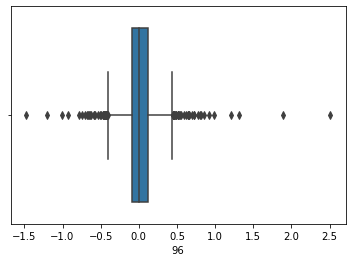

Total no. of outliers in column 115 are 15
Outlier Value are [913.7342, 920.359, 914.8248, 544.0254, 598.8947, 581.2285, 598.2087, 571.9780000000002, 584.1758, 909.7511, 595.7959999999998, 600.2219, 924.5318, 900.6217, 909.3752]


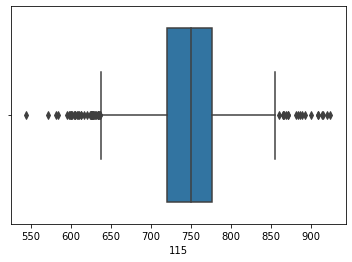

Total no. of outliers in column 117 are 1
Outlier Value are [311.7344]


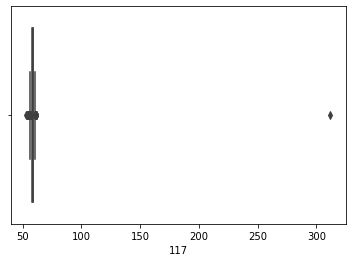

Total no. of outliers in column 120 are 24
Outlier Value are [6.6967, 6.7662, 6.7772, 6.7499, 7.0626, 5.9047, 7.522, 6.7997, 5.8415, 5.7564, 5.8468, 5.9072, 5.7207, 5.7288, 5.1259, 6.6944, 5.8821, 5.8883, 5.9135, 6.7805, 7.4275, 5.9161, 5.9171, 5.9349]


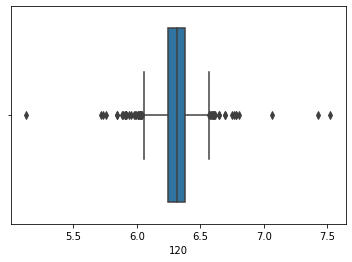

Total no. of outliers in column 122 are 6
Outlier Value are [6.8889999999999985, 6.8889999999999985, 6.8889999999999985, 6.8889999999999985, 6.8889999999999985, 6.8889999999999985]


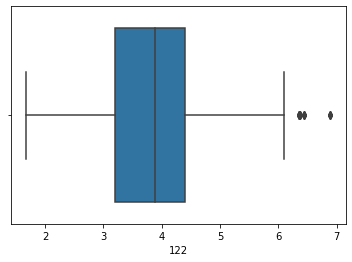

Total no. of outliers in column 125 are 17
Outlier Value are [0.3122, 0.3122, 0.3122, 0.3122, 0.3122, 2.154, 2.154, 2.154, 2.154, 2.154, 2.154, 2.154, 2.211, 2.211, 2.211, 2.211, 2.465]


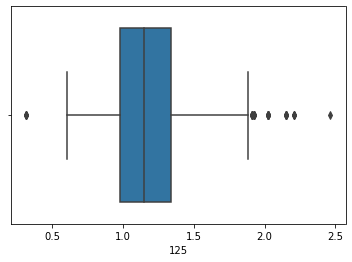

Total no. of outliers in column 126 are 26
Outlier Value are [3.955, 3.955, 3.955, 3.955, 3.955, 3.955, 3.955, 3.955, 3.955, 3.635, 3.635, 3.635, 3.811, 3.811, 3.811, 3.811, 3.811, 3.991, 3.991, 3.991, 3.991, 3.991, 3.991, 3.856, 3.856, 3.856]


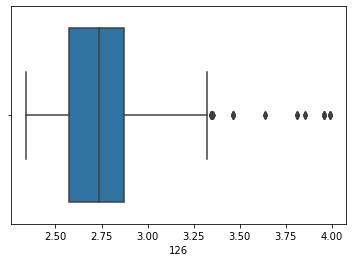

Total no. of outliers in column 128 are 5
Outlier Value are [0.0, 0.0, 0.0, 0.0, 0.0]


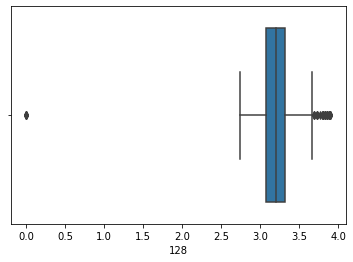

Total no. of outliers in column 129 are 0
Outlier Value are []


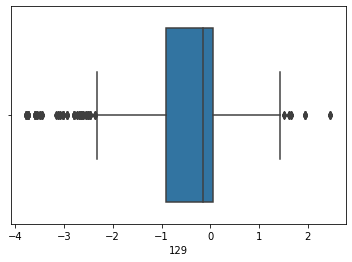

Total no. of outliers in column 133 are 4
Outlier Value are [980.451, 984.0379, 984.0379, 984.0379]


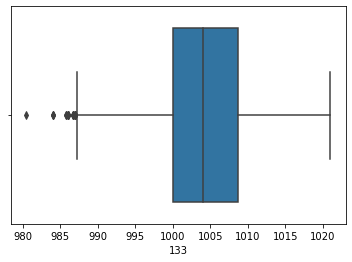

Total no. of outliers in column 134 are 5
Outlier Value are [48.5321, 64.1287, 64.1287, 64.1287, 64.1287]


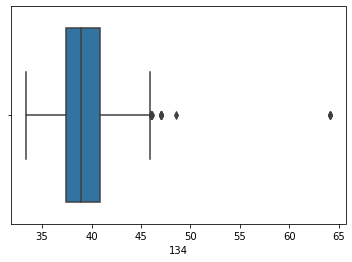

Total no. of outliers in column 135 are 34
Outlier Value are [299.0, 551.0, 371.0, 371.0, 371.0, 551.0, 551.0, 306.0, 371.0, 308.0, 308.0, 593.0, 308.0, 308.0, 308.0, 382.0, 308.0, 308.0, 382.0, 382.0, 593.0, 593.0, 330.0, 330.0, 330.0, 382.0, 380.0, 380.0, 634.0, 330.0, 549.0, 549.0, 302.0, 994.0]


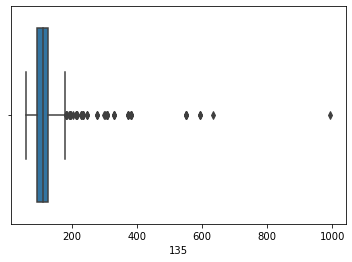

Total no. of outliers in column 136 are 0
Outlier Value are []


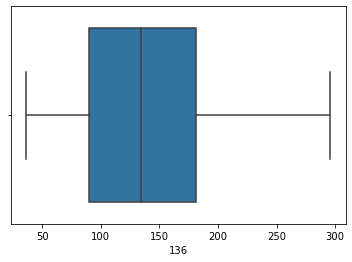

Total no. of outliers in column 137 are 3
Outlier Value are [288.2, 334.7, 281.2]


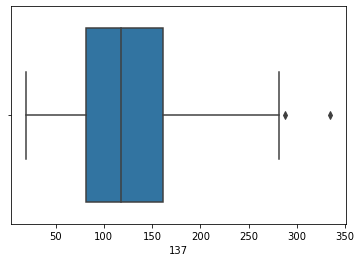

Total no. of outliers in column 138 are 35
Outlier Value are [107.6001, 107.6001, 107.6001, 107.6001, 107.6001, 95.4001, 107.6001, 107.6001, 111.9001, 95.0999, 95.0999, 95.0999, 95.0999, 95.0999, 95.0999, 95.0999, 95.0999, 95.0999, 96.1001, 101.8, 96.2998, 96.2998, 101.8, 101.8, 96.2998, 19.8, 19.8, 19.8, 19.8, 19.8, 19.8, 96.2998, 19.8, 121.1001, 141.7998]


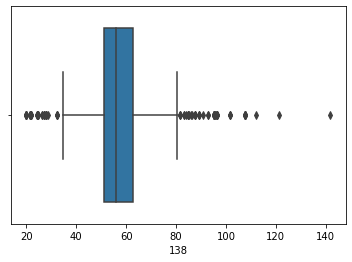

Total no. of outliers in column 139 are 46
Outlier Value are [1245.613, 1245.613, 1245.613, 1245.613, 1245.613, 1245.613, 1245.613, 1245.613, 1738.4641, 1738.4641, 1596.1949, 1738.4641, 1215.093, 1215.093, 1596.1949, 1371.4971, 1407.9781, 1407.9781, 1275.644, 1275.644, 1407.9781, 1321.8339, 1275.644, 1321.8339, 1770.6909, 1321.8339, 1275.644, 1321.8339, 1498.329, 1533.777, 1533.777, 1415.4999, 1533.777, 1533.777, 1415.4999, 1533.777, 1258.052, 1258.052, 1258.052, 1635.3, 1258.052, 1258.052, 1635.3, 1258.052, 1635.3, 1635.3]


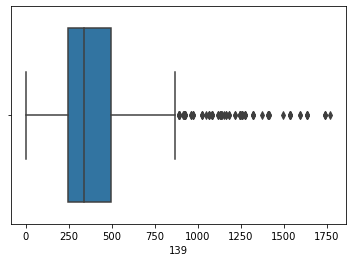

Total no. of outliers in column 142 are 4
Outlier Value are [52.34, 35.68, 22.13, 103.39]


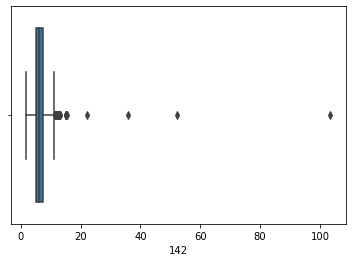

Total no. of outliers in column 150 are 23
Outlier Value are [19.388, 20.684, 20.298, 17.233, 18.857, 18.415, 17.579, 17.633, 22.318, 18.473, 19.781, 16.671, 20.111, 16.737000000000002, 17.899, 19.822, 17.406, 17.747, 18.736, 17.297, 19.556, 16.564, 16.852999999999998]


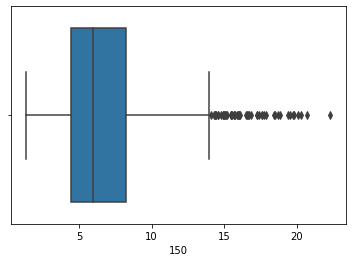

Total no. of outliers in column 151 are 12
Outlier Value are [140.243, 459.929, 536.564, 271.726, 229.849, 403.73800000000006, 357.49, 109.812, 182.901, 515.283, 290.535, 462.171]


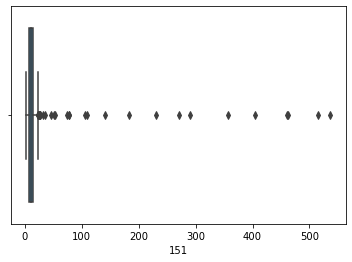

Total no. of outliers in column 155 are 18
Outlier Value are [12.71, 12.61, 12.61, 7.732, 7.732, 7.732, 7.732, 7.732, 7.732, 11.492, 11.492, 11.492, 11.492, 3.94, 11.492, 11.492, 11.492, 11.492]


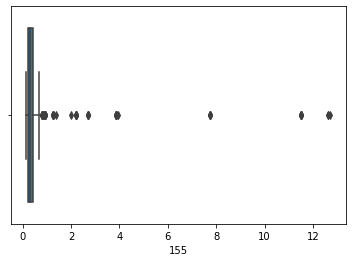

Total no. of outliers in column 159 are 35
Outlier Value are [5781.0, 5655.0, 5726.0, 5803.0, 5665.0, 5366.0, 5913.0, 5575.0, 5448.0, 7569.0, 7600.0, 7653.0, 5391.0, 7657.0, 5475.0, 7709.0, 5477.0, 5684.0, 7791.0, 5703.0, 7716.0, 5480.0, 6011.0, 7669.0, 7673.0, 5921.0, 7708.0, 5978.0, 5923.0, 7599.0, 5704.0, 5081.0, 5054.0, 3951.0, 4361.0]


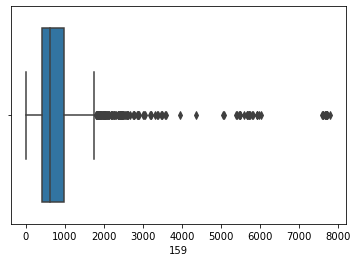

Total no. of outliers in column 160 are 54
Outlier Value are [2900.0, 2942.0, 2478.0, 3530.0, 3623.0, 3130.0, 3301.0, 3511.0, 2841.0, 4170.0, 3309.0, 3290.0, 3417.0, 3294.0, 3278.0, 2615.0, 3253.0, 3184.0, 3287.0, 3775.0, 3267.0, 3454.0, 3046.0, 3218.0, 2426.0, 3295.0, 2947.0, 2844.0, 3235.0, 2940.0, 3363.0, 2438.0, 3132.0, 3635.0, 3785.0, 3418.0, 3190.0, 3645.0, 3803.0, 3936.0, 3727.0, 3472.0, 3205.0, 2446.0, 3362.0, 3290.0, 2411.0, 3421.0, 3521.0, 3280.0, 3892.0, 3710.0, 3608.0, 4099.0]


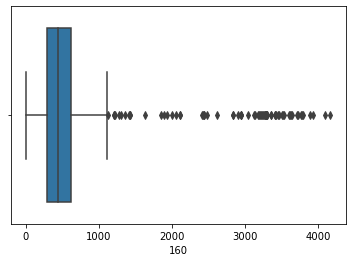

Total no. of outliers in column 161 are 31
Outlier Value are [19038.0, 28188.0, 20118.0, 21777.0, 18949.0, 17801.0, 18389.0, 20499.0, 22267.0, 18587.0, 19941.0, 17918.0, 18140.0, 28637.0, 19740.0, 18313.0, 20802.0, 21304.0, 37943.0, 19497.0, 20032.0, 16819.0, 17359.0, 22817.0, 19581.0, 25359.0, 20488.0, 19368.0, 22504.0, 18540.0, 18365.0]


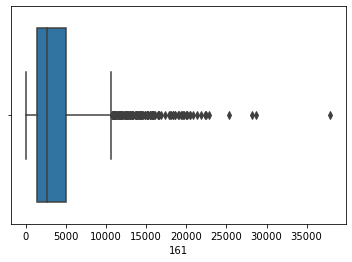

Total no. of outliers in column 162 are 30
Outlier Value are [31669.0, 28916.0, 27194.0, 27854.0, 27277.0, 36871.0, 27784.0, 24439.0, 36664.0, 27513.0, 34717.0, 25128.0, 24861.0, 27425.0, 27952.0, 25746.0, 30363.0, 25350.0, 31318.0, 28863.0, 25846.0, 24486.0, 24697.0, 35503.0, 29509.0, 24902.0, 25794.0, 24464.0, 30212.0, 26140.0]


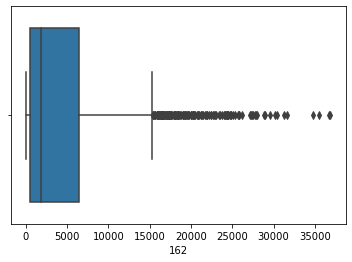

Total no. of outliers in column 163 are 32
Outlier Value are [0.912, 0.921, 0.931, 0.942, 0.915, 0.89, 0.95, 0.918, 0.8959999999999999, 0.926, 0.901, 0.947, 0.8909999999999999, 0.906, 0.901, 0.894, 0.899, 0.913, 0.899, 0.957, 0.954, 0.895, 0.947, 0.901, 0.8759999999999999, 0.949, 0.875, 0.944, 0.926, 0.945, 0.935, 0.8490000000000001]


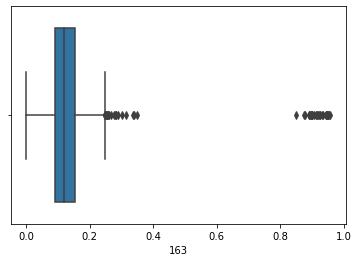

Total no. of outliers in column 166 are 8
Outlier Value are [10.3, 21.1, 7.0, 9.3, 18.9, 6.4, 7.3, 7.2]


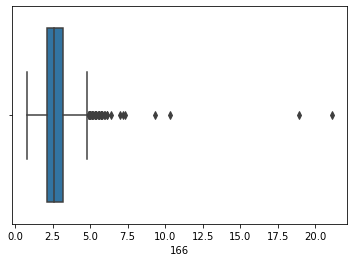

Total no. of outliers in column 167 are 3
Outlier Value are [8.4, 8.8, 16.3]


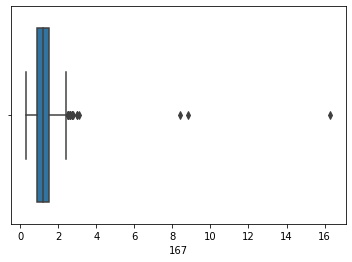

Total no. of outliers in column 169 are 4
Outlier Value are [1.0, 1.143, 1.042, 0.994]


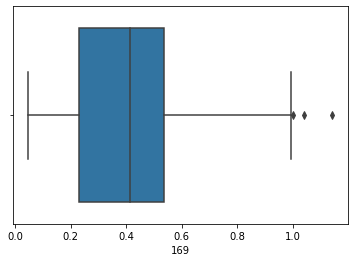

Total no. of outliers in column 170 are 0
Outlier Value are []


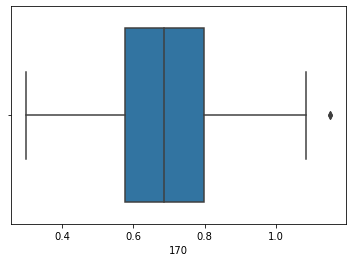

Total no. of outliers in column 175 are 6
Outlier Value are [1.172, 1.1437, 1.1437, 1.1437, 1.1437, 1.1437]


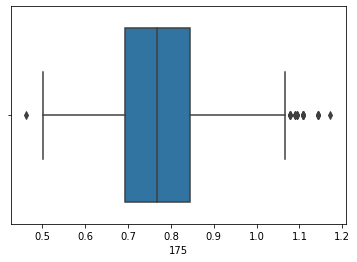

Total no. of outliers in column 177 are 6
Outlier Value are [1.858, 1.858, 1.858, 1.858, 1.858, 1.858]


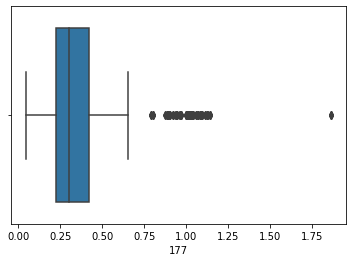

Total no. of outliers in column 180 are 6
Outlier Value are [30.52, 48.67, 29.08, 31.71, 33.78, 31.87]


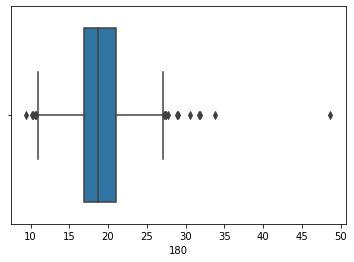

Total no. of outliers in column 181 are 5
Outlier Value are [1.276, 1.242, 1.3130000000000002, 3.573, 1.315]


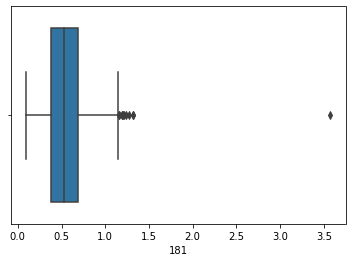

Total no. of outliers in column 182 are 4
Outlier Value are [53.98, 34.84, 55.0, 39.41]


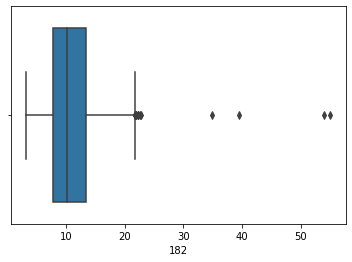

Total no. of outliers in column 183 are 9
Outlier Value are [5.733, 5.476, 5.0139999999999985, 6.093, 5.381, 6.119, 62.274, 72.947, 56.49]


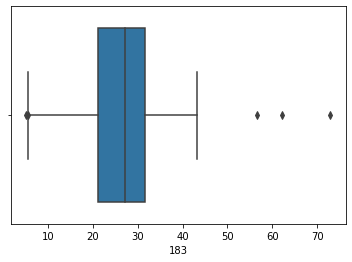

Total no. of outliers in column 184 are 6
Outlier Value are [2.1552, 0.6874, 0.5184, 0.5828, 0.523, 3.2283]


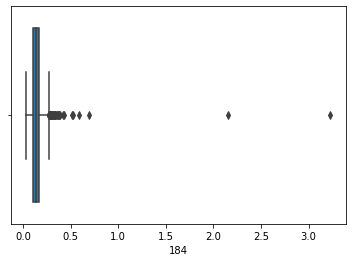

Total no. of outliers in column 185 are 3
Outlier Value are [30.22, 267.91, 54.09]


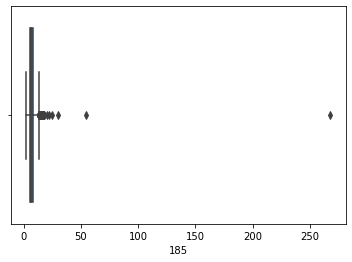

Total no. of outliers in column 188 are 3
Outlier Value are [111.677, 191.83, 116.057]


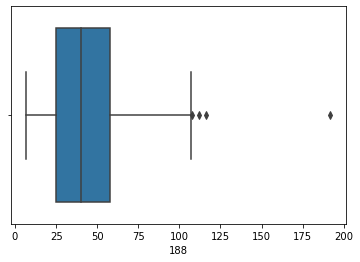

Total no. of outliers in column 195 are 11
Outlier Value are [4.617, 4.838, 4.838, 4.838, 4.838, 4.838, 4.838, 4.838, 4.838, 4.619, 4.619]


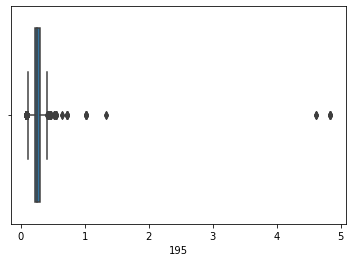

Total no. of outliers in column 198 are 8
Outlier Value are [10.017, 6.541, 4.985, 8.898, 2.756, 8.206, 3.508, 4.424]


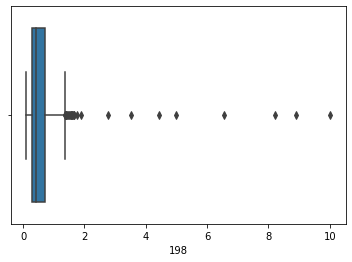

Total no. of outliers in column 200 are 4
Outlier Value are [199.62, 156.08, 94.32, 183.66]


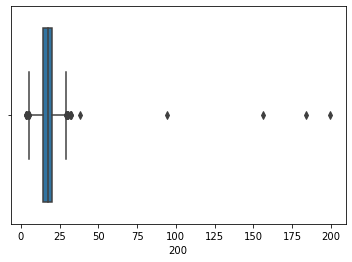

Total no. of outliers in column 201 are 10
Outlier Value are [25.06, 54.26, 23.37, 24.06, 23.55, 24.76, 27.52, 58.46, 32.84, 126.53]


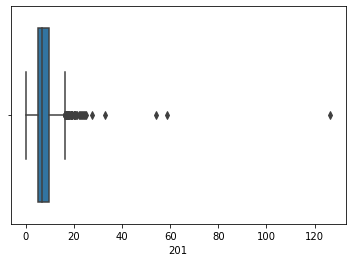

Total no. of outliers in column 208 are 7
Outlier Value are [172.34900000000005, 170.36, 165.553, 163.121, 165.497, 164.549, 160.234]


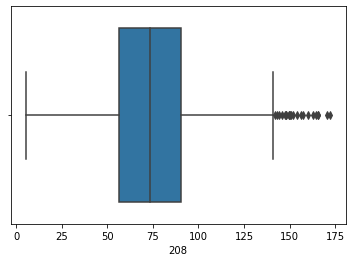

Total no. of outliers in column 218 are 10
Outlier Value are [7.5616, 7.3083, 7.9727, 7.5869, 8.8015, 7.8715, 7.5756, 8.1543, 7.9262, 7.569]


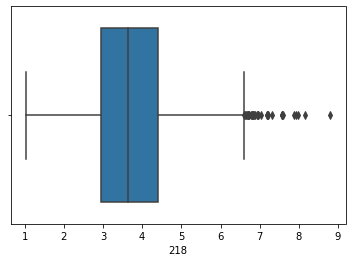

Total no. of outliers in column 223 are 1
Outlier Value are [1768.8802]


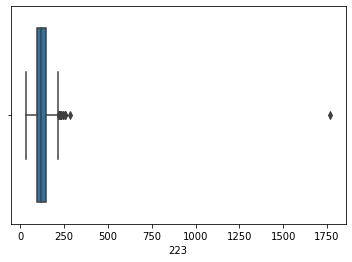

Total no. of outliers in column 225 are 18
Outlier Value are [2492.7998, 2887.2002, 2448.5996, 2458.2998, 2470.9995, 2568.8003, 2885.7998, 2628.2002, 2803.1001, 2523.4995, 2427.0, 2388.6001, 2518.3999, 2368.3999, 2466.2002, 3601.2998, 2571.6997, 2600.5996]


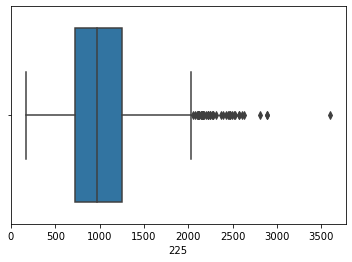

Total no. of outliers in column 250 are 6
Outlier Value are [295.763, 279.0726, 346.7927, 327.6722, 943.8936, 1119.7042]


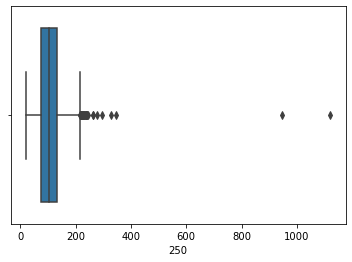

Total no. of outliers in column 255 are 4
Outlier Value are [0.8194, 0.7803, 0.8278, 0.9255]


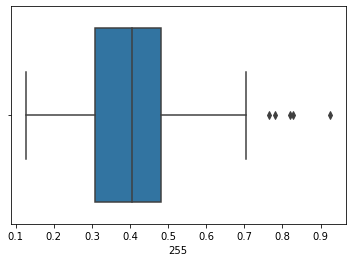

Total no. of outliers in column 268 are 0
Outlier Value are []


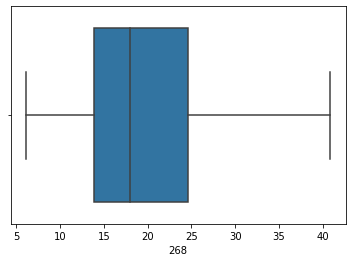

Total no. of outliers in column 269 are 17
Outlier Value are [10.1529, 10.1529, 7.3173, 7.3173, 7.3173, 7.3173, 7.3173, 7.3173, 8.478, 8.478, 8.478, 8.0099, 8.0099, 8.0099, 8.0099, 8.0099, 8.0099]


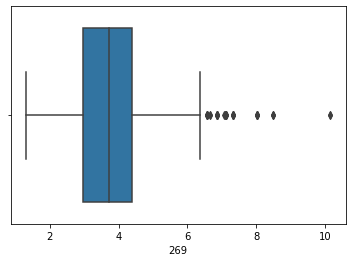

Total no. of outliers in column 418 are 0
Outlier Value are []


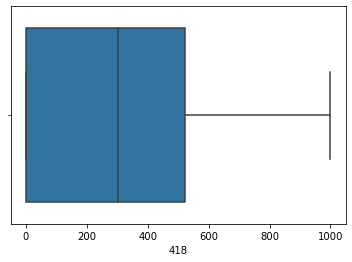

Total no. of outliers in column 419 are 0
Outlier Value are []


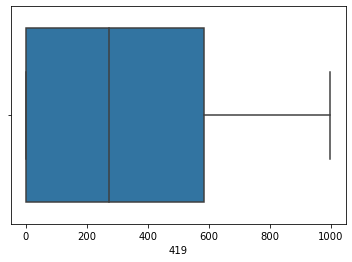

Total no. of outliers in column 423 are 21
Outlier Value are [213.0178, 178.7377, 424.2152, 295.525, 210.1032, 196.135, 193.2378, 218.8146, 204.6813, 223.8064, 196.3084, 202.5139, 187.1087, 178.7205, 184.1857, 180.7213, 194.763, 212.007, 226.8931, 176.7227, 201.19]


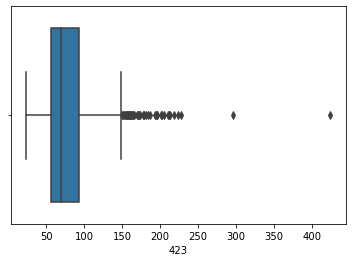

Total no. of outliers in column 432 are 35
Outlier Value are [582.364, 678.8889, 511.4653, 643.2664, 867.4989, 495.2039, 678.7382, 601.5305, 760.1053, 773.1043, 776.7051, 586.0527, 853.9353, 513.6025, 838.0066, 579.2769999999998, 607.3661, 533.9541, 994.2857, 963.8833, 538.7728, 837.3452, 952.1274, 591.7942, 606.5387, 602.8344, 764.1426, 907.6215, 585.7501, 662.1165, 590.8127, 913.6022, 851.7639, 480.6764, 791.3774]


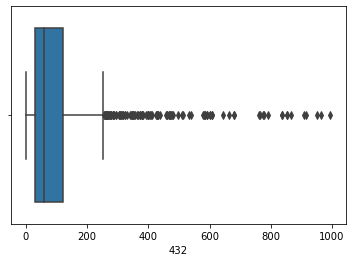

Total no. of outliers in column 433 are 30
Outlier Value are [930.9577, 907.5269, 935.5316, 908.0021, 887.0027, 914.7125, 955.286, 970.1357, 902.7436, 890.3646, 895.5665, 993.0314, 968.6747, 941.4168, 977.1353, 901.1494, 936.9642, 917.4825, 920.5273, 884.6673, 905.148, 945.6947, 911.0764, 953.0201, 960.2559, 884.0306, 900.7229, 945.5587, 947.3393, 995.7447]


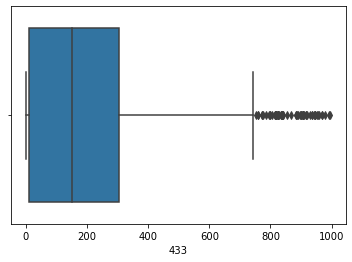

Total no. of outliers in column 438 are 7
Outlier Value are [239.0625, 444.7059, 260.8696, 851.6129, 185.7143, 353.1646, 239.3617]


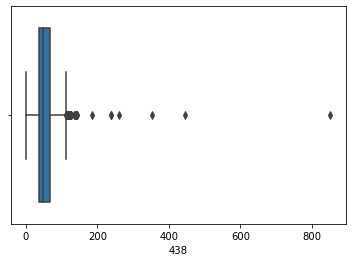

Total no. of outliers in column 439 are 7
Outlier Value are [218.0073, 241.791, 455.7545, 549.4949, 647.8827, 254.1985, 657.7621]


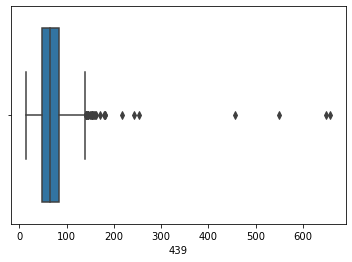

Total no. of outliers in column 460 are 19
Outlier Value are [78.3719, 75.0239, 70.2619, 118.7998, 73.7347, 149.3851, 70.684, 83.6569, 72.885, 72.0924, 76.8379, 71.182, 72.8696, 72.0207, 133.9113, 70.6707, 73.4011, 73.4752, 75.3229]


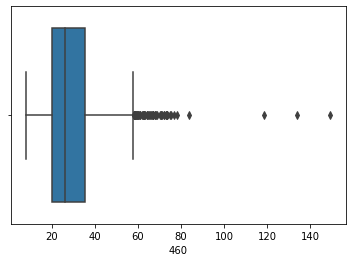

Total no. of outliers in column 468 are 23
Outlier Value are [995.2807, 957.554, 983.4625, 967.2532, 945.6885, 934.2229, 991.7375, 932.737, 943.7152, 943.8219, 966.1049, 946.6191, 964.5691, 969.917, 946.0468, 999.877, 968.5841, 944.0, 953.7056, 930.7692, 941.678, 938.8258, 987.5866]


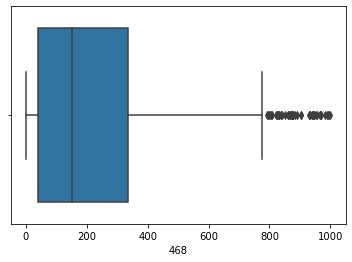

Total no. of outliers in column 472 are 10
Outlier Value are [285.9, 292.8947, 312.5152, 365.3171, 285.9717, 315.7949, 289.3312, 416.257, 492.7718, 303.237]


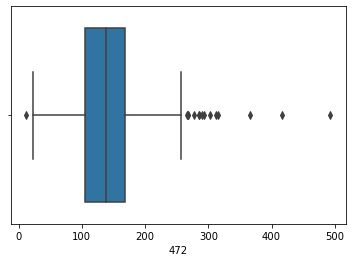

Total no. of outliers in column 474 are 16
Outlier Value are [211.5006, 354.4169, 189.7559, 227.8544, 131.6493, 113.124, 126.7858, 122.2429, 120.6696, 253.3888, 196.7546, 117.428, 131.9725, 120.0646, 415.4355, 134.2458]


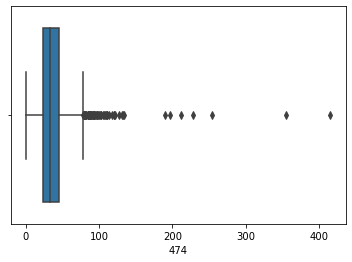

Total no. of outliers in column 476 are 17
Outlier Value are [71.7657, 157.1088, 65.9965, 79.3758, 79.8723, 137.4644, 274.8871, 70.829, 65.6944, 73.4527, 88.9624, 72.2292, 157.10299999999995, 75.368, 70.0774, 78.5433, 79.0222]


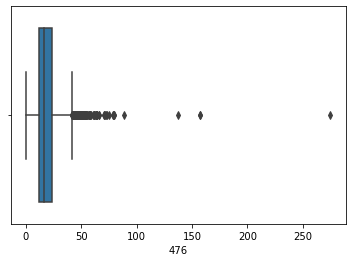

Total no. of outliers in column 482 are 0
Outlier Value are []


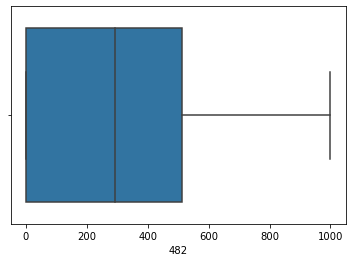

Total no. of outliers in column 483 are 39
Outlier Value are [989.4737, 820.7547, 839.5604, 905.4152, 843.7811, 948.0, 821.8487, 811.2676, 813.5922, 869.5652, 844.8, 923.2877, 983.691, 886.0987, 905.8065, 792.2581, 986.4253, 846.4646, 893.7063, 804.2781, 800.0, 837.1795, 961.7021, 964.1026, 852.3161, 831.6547, 832.2034, 842.0091, 822.9885, 959.5238, 792.8571, 907.4286, 804.8583, 852.7027, 858.8832, 791.3357, 887.0968, 948.0519, 925.1799]


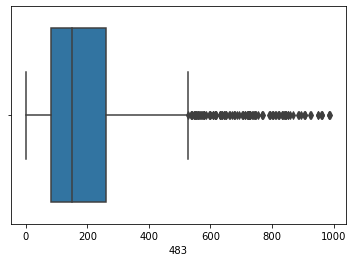

Total no. of outliers in column 484 are 33
Outlier Value are [979.8817, 981.4324, 887.8613, 950.3546, 934.2282, 911.332, 893.5167, 927.5362, 963.8095, 955.8824, 980.0643, 885.4271, 976.4103, 901.5385, 902.8571, 951.6484, 858.1197, 849.6124, 922.0104, 985.6, 964.7059, 879.7654, 938.8128, 881.3559, 996.8586, 929.4118, 910.4294, 876.5217, 923.1504, 957.1429, 850.6757, 965.4135, 928.3019]


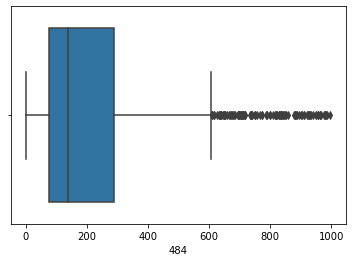

Total no. of outliers in column 485 are 30
Outlier Value are [892.1933, 869.3446, 866.3636, 865.2174, 871.6981, 984.6154, 945.9318, 930.504, 990.303, 963.2, 956.0606, 871.4286, 896.063, 994.0, 873.6, 901.8868, 882.6255, 956.4246, 883.0601, 991.6667, 883.2714, 876.2887, 957.7982, 960.8392, 955.6364, 853.7313, 902.8571, 909.7436, 891.1854, 856.6372]


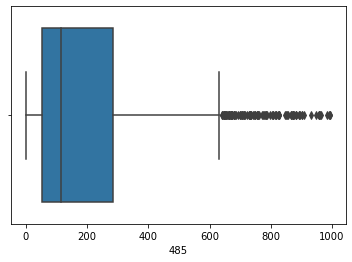

Total no. of outliers in column 486 are 0
Outlier Value are []


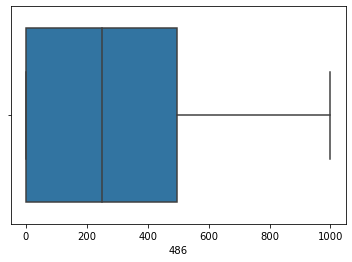

Total no. of outliers in column 487 are 0
Outlier Value are []


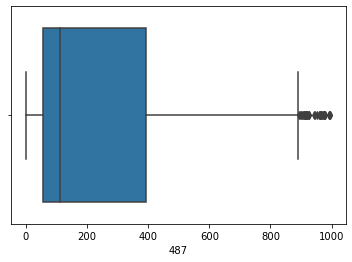

Total no. of outliers in column 488 are 0
Outlier Value are []


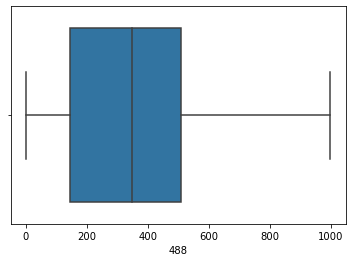

Total no. of outliers in column 489 are 11
Outlier Value are [972.0102, 963.5783, 985.2217, 980.6452, 953.5211, 994.0035, 958.9577, 987.5458, 950.7692, 981.3953, 972.9915]


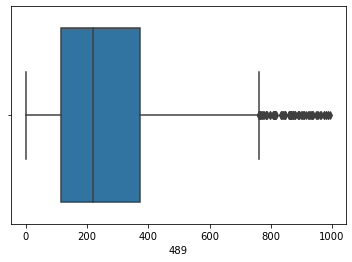

Total no. of outliers in column 499 are 0
Outlier Value are []


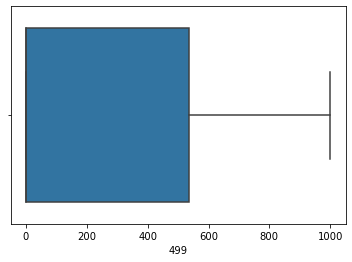

Total no. of outliers in column 500 are 0
Outlier Value are []


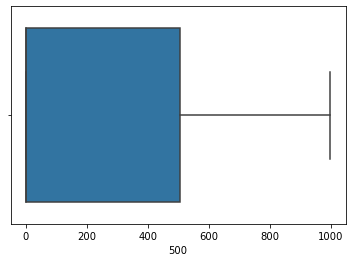

Total no. of outliers in column 510 are 32
Outlier Value are [240.7767, 263.4538, 349.2063, 172.0755, 200.7117, 218.1818, 174.8988, 301.4493, 243.4783, 289.6552, 205.5866, 252.6316, 202.7397, 171.1628, 175.3425, 400.0, 439.2157, 184.3478, 247.343, 174.8072, 253.7931, 451.4851, 249.711, 217.1429, 196.0199, 200.823, 206.2222, 204.5307, 221.6216, 210.596, 174.0988, 244.2748]


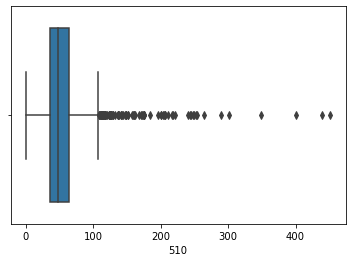

Total no. of outliers in column 511 are 0
Outlier Value are []


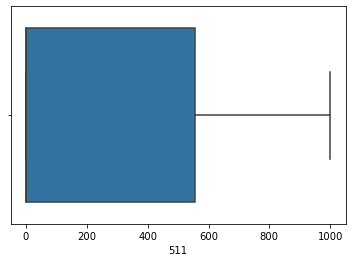

Total no. of outliers in column 521 are 20
Outlier Value are [1000.0, 907.91, 1000.0, 1000.0, 776.2169, 1000.0, 1000.0, 604.2009, 1000.0, 718.6039999999998, 1000.0, 553.2097, 1000.0, 474.6376, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]


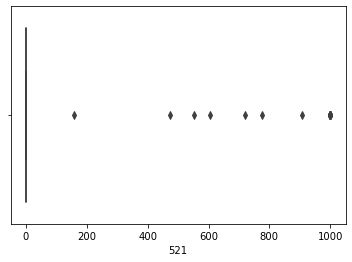

Total no. of outliers in column 546 are 21
Outlier Value are [2.1716, 2.3393, 2.1408, 2.3906, 2.1487, 2.1536, 2.8654, 3.9786, 2.1764, 2.1878, 2.2472, 2.5242, 2.3764, 2.0985, 2.116, 3.2092, 2.2021, 2.1592, 3.2310000000000003, 3.0437, 2.7059]


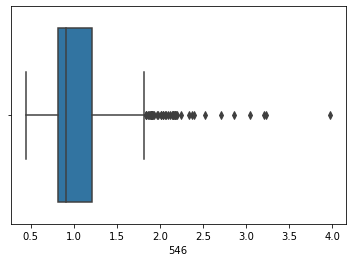

Total no. of outliers in column 547 are 15
Outlier Value are [372.822, 420.71, 389.206, 421.702, 388.906, 387.356, 387.398, 417.628, 388.152, 383.906, 383.352, 382.534, 389.53, 388.628, 384.568]


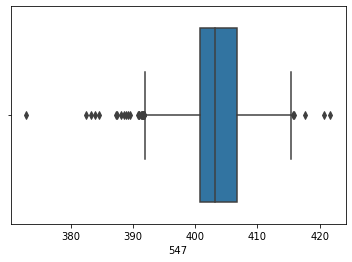

Total no. of outliers in column 548 are 0
Outlier Value are []


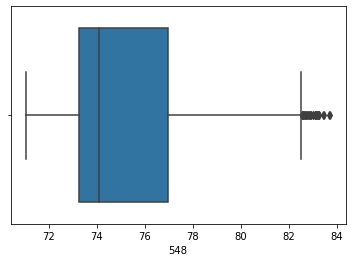

Total no. of outliers in column 549 are 34
Outlier Value are [6.2712, 2.6651, 2.722, 4.7366, 4.8467, 3.4902, 3.0519, 3.0544, 4.5986, 3.0588, 3.2976, 2.5351, 3.2604, 4.2729, 2.7105, 3.0304, 2.4955, 2.6488, 3.1688, 3.9653, 2.6285, 3.0839, 5.5088, 3.1059, 2.7536, 7.0656, 2.6010000000000004, 3.4486, 2.8960000000000004, 5.1232, 6.3371, 3.9115, 3.2403, 3.3495]


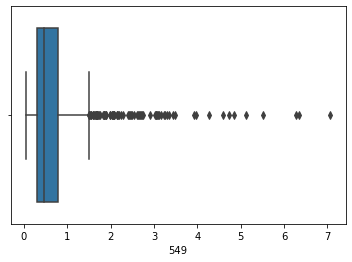

Total no. of outliers in column 550 are 2
Outlier Value are [131.68, 90.7]


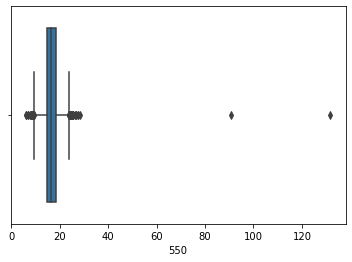

Total no. of outliers in column 551 are 4
Outlier Value are [39.33, 25.47, 11.42, 6.84]


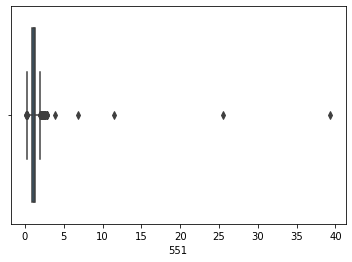

Total no. of outliers in column 559 are 11
Outlier Value are [0.9412, 0.9412, 0.9412, 0.9412, 1.0737, 0.9412, 0.9412, 0.9511, 1.0099, 0.9511, 0.98]


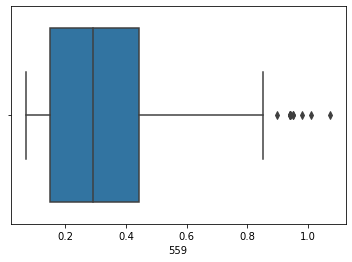

Total no. of outliers in column 562 are 10
Outlier Value are [311.404, 298.664, 299.876, 299.62, 284.8540000000001, 284.922, 286.65, 283.92, 284.362, 288.8640000000001]


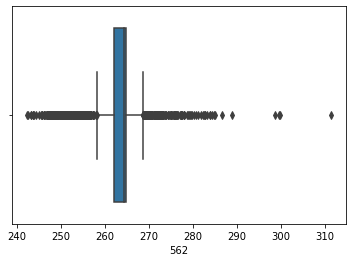

Total no. of outliers in column 563 are 12
Outlier Value are [1.0247, 1.0256, 1.1978, 1.0607, 1.1116, 1.0394, 1.0189, 1.0799, 0.3049, 1.0103, 1.2988, 1.2254]


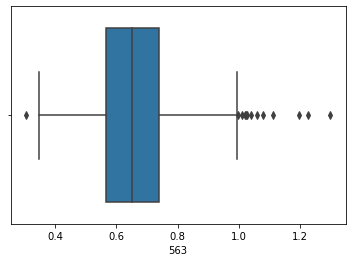

Total no. of outliers in column 564 are 18
Outlier Value are [15.07, 13.93, 32.58, 14.51, 13.61, 19.61, 13.92, 14.76, 13.69, 13.57, 14.76, 13.55, 16.06, 14.49, 15.04, 14.13, 14.26, 16.54]


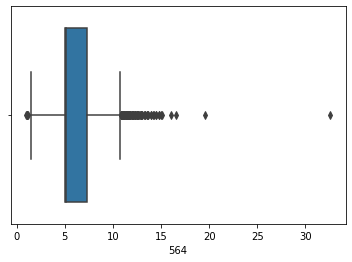

Total no. of outliers in column 570 are 18
Outlier Value are [466.5409, 367.44, 391.5764, 401.4482, 364.1436, 331.9618, 317.1964, 379.0045, 360.7645, 336.6718, 410.2409, 365.3818, 384.6536, 335.5982, 328.4664, 586.9145, 589.5082, 458.8464]


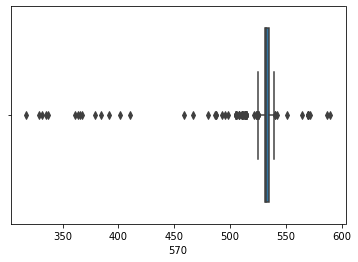

Total no. of outliers in column 571 are 32
Outlier Value are [1.0912, 1.0912, 1.0912, 1.0912, 1.0744, 1.0912, 1.0912, 1.0912, 1.0024, 1.0912, 1.0744, 1.0936, 1.0744, 1.0912, 0.9802, 1.0912, 1.0744, 1.1073, 1.0744, 0.9847, 0.9847, 0.9847, 0.9847, 1.109, 0.9847, 1.1073, 0.9847, 1.0744, 0.9847, 0.9847, 1.0744, 0.9847]


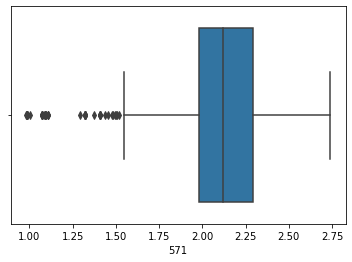

Total no. of outliers in column 572 are 60
Outlier Value are [439.05, 439.05, 439.05, 439.05, 420.24, 439.05, 434.04, 454.56, 426.69, 445.32, 451.69, 426.85, 452.54, 435.57, 435.26, 438.87, 438.87, 438.87, 438.87, 438.87, 438.87, 438.87, 438.87, 438.87, 436.52, 436.52, 438.87, 436.52, 436.52, 436.52, 438.87, 415.03, 430.37, 445.8, 427.42, 445.8, 431.71, 431.71, 445.8, 427.42, 431.71, 432.94, 431.71, 445.8, 431.71, 427.42, 431.71, 431.71, 431.71, 431.71, 431.71, 427.42, 427.42, 431.71, 441.92, 441.92, 441.92, 441.92, 439.29, 441.92]


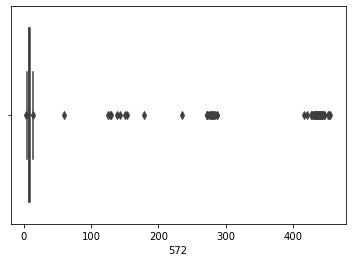

Total no. of outliers in column 573 are 60
Outlier Value are [1.2098, 1.2098, 1.2098, 1.2098, 1.4316, 1.2098, 1.1022, 1.6228, 1.4024, 1.3634, 1.2515, 1.1093, 1.1669, 1.138, 1.138, 1.138, 1.138, 1.3206, 1.3483, 1.138, 1.2877, 1.138, 1.138, 1.138, 2.1967, 2.1967, 2.1967, 2.1967, 2.1967, 2.1967, 2.1967, 2.1967, 2.1967, 1.1022, 1.1022, 2.1967, 1.1022, 1.1022, 1.1022, 2.1967, 1.2041, 1.2041, 1.2571, 1.2571, 1.2041, 1.2571, 1.2571, 1.2041, 1.2571, 1.2571, 1.2571, 1.2571, 1.2571, 1.2571, 1.2571, 1.2113, 1.2113, 1.2113, 1.2113, 1.2113]


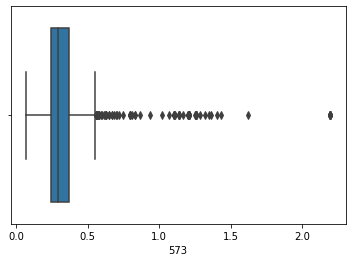

Total no. of outliers in column 589 are 46
Outlier Value are [397.5003, 397.5003, 397.5003, 397.5003, 397.5003, 382.6619, 510.041, 706.824, 706.824, 388.9648, 388.9648, 388.9648, 388.9648, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 474.0812, 390.4146, 390.4146, 390.4146, 390.4146, 390.4146, 390.4146, 737.3048, 737.3048, 427.4732, 545.6838, 545.6838, 545.6838, 545.6838, 579.1817, 579.1817, 579.1817, 579.1817, 414.4256, 402.6874]


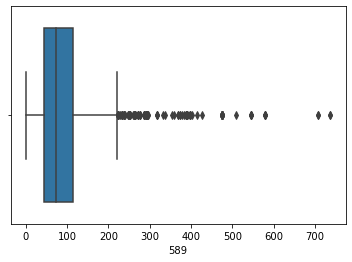

Total no. of outliers in column Pass/Fail are 104
Outlier Value are [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


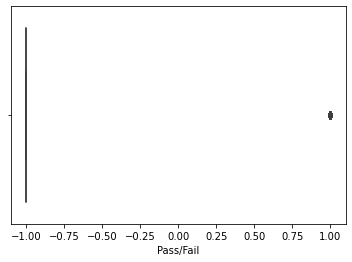

In [26]:
# MAIN outliers


print('''\n\033[1m''' + '''Checking of outliers of each columns:''' + '''\033[0m''')
n=1
for x in sd1:
    sd1[x]=sd1[x].astype(float)
    att = sd1[x]
    mean = np.mean(att) 
    std = np.std(att) 
    outlier = [] 
    outliervalue = []
    for i in att:
        if std != 0:
            z = (i-mean)/std 
            if z < -3.00 or z > 3.00: 
                outlier.append(i) 
                outliervalue.append(z)
    print('Total no. of outliers in column',x,'are',len(outlier))
    print('Outlier Value are',outlier)
    sns.boxplot(sd1[x])
    plt.xlabel(x)
    plt.show()


# Univariate Analysis


Univariate Analysis of each columns:

Checking of skewness and distribution of each columns:
0 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.515 



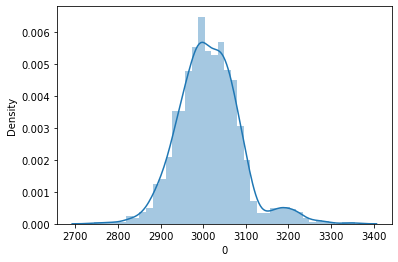

1 is Symmetrically Skewed as Skewness = -0.044 



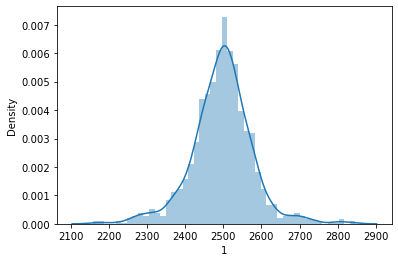

2 is Symmetrically Skewed as Skewness = -0.308 



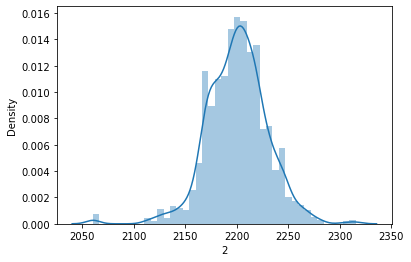

3 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.724 



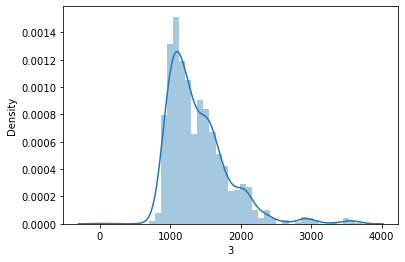

4 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 19.734 



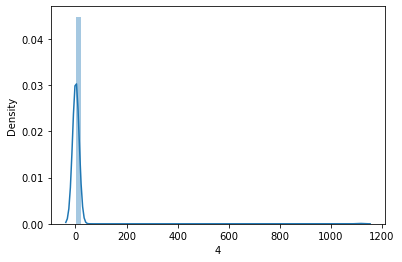

6 is Symmetrically Skewed as Skewness = -0.109 



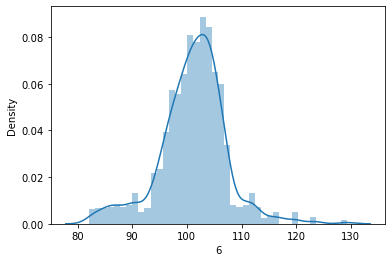

12 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 7.21 



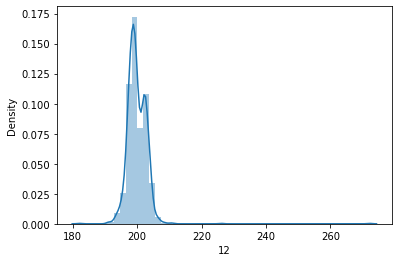

14 is Symmetrically Skewed as Skewness = 0.17 



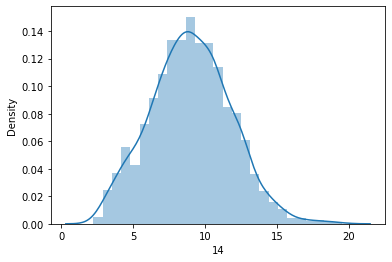

15 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 17.077 



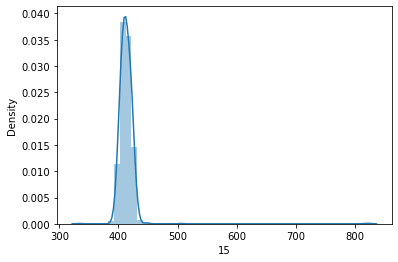

16 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 37.07 



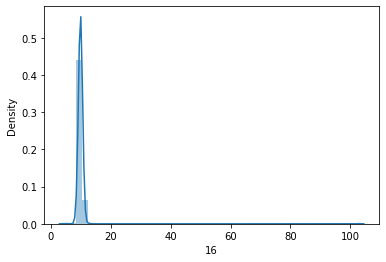

18 is Symmetrically Skewed as Skewness = 0.196 



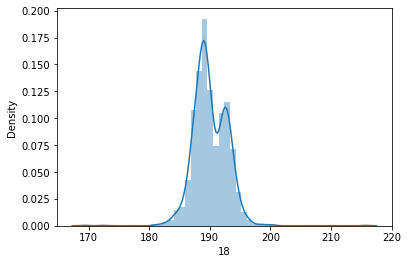

19 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -9.863 



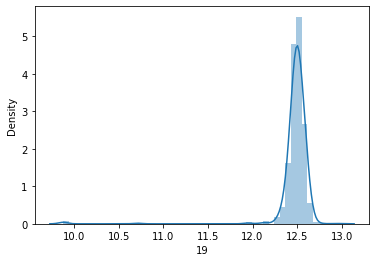

21 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.375 



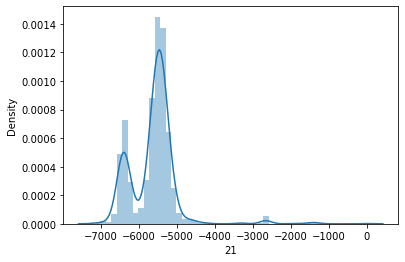

22 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -2.182 



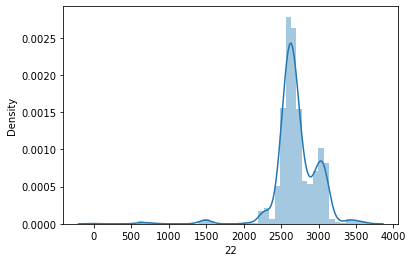

23 is Symmetrically Skewed as Skewness = 0.357 



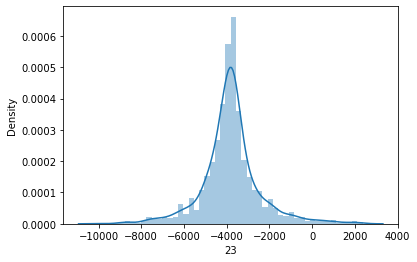

24 is Symmetrically Skewed as Skewness = -0.054 



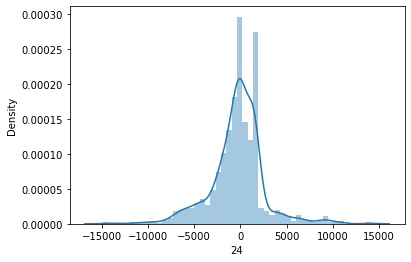

25 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -2.36 



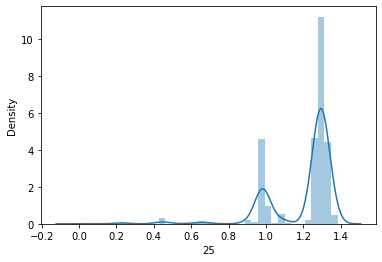

28 is Symmetrically Skewed as Skewness = -0.063 



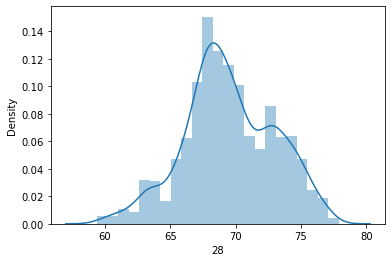

29 is Symmetrically Skewed as Skewness = -0.302 



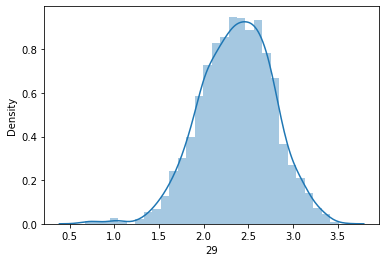

31 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.16 



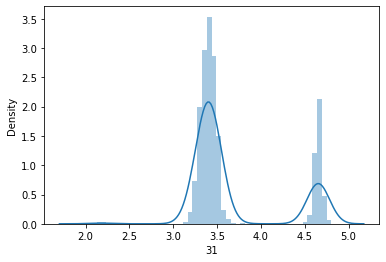

32 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 6.329 



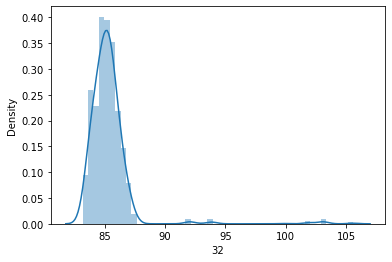

33 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 9.127 



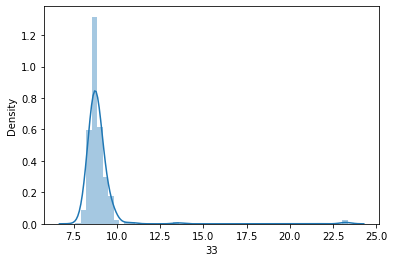

34 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 6.418 



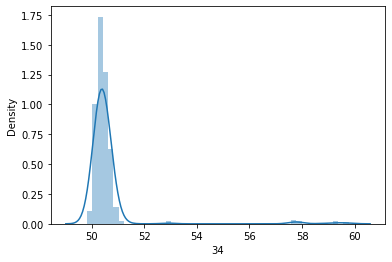

35 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 8.15 



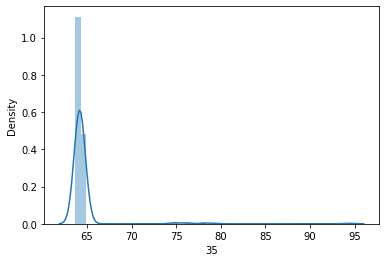

36 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -6.418 



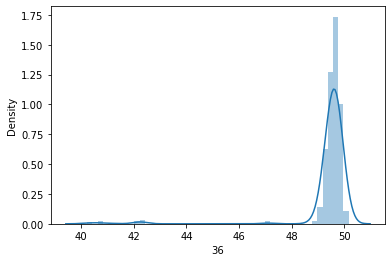

37 is Symmetrically Skewed as Skewness = 0.166 



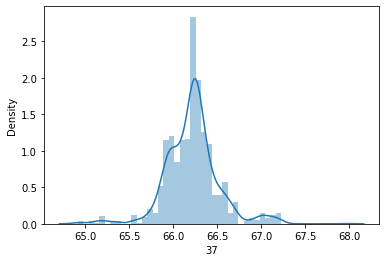

38 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.016 



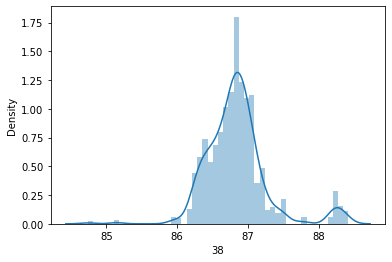

39 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.658 



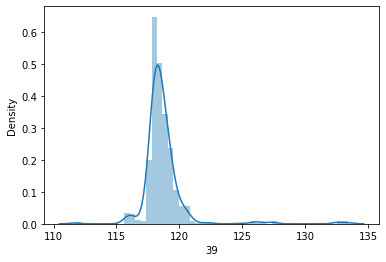

40 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -1.893 



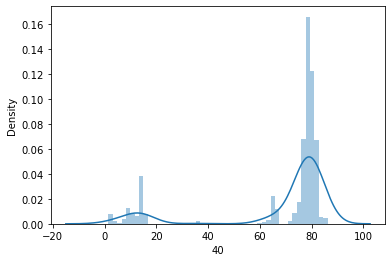

41 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 12.309 



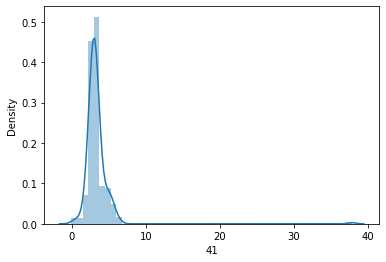

43 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.555 



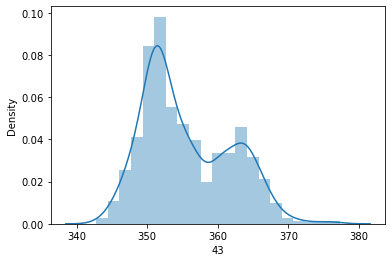

44 is Symmetrically Skewed as Skewness = -0.192 



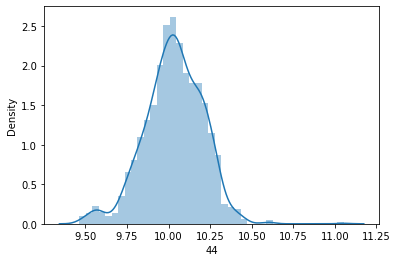

45 is Symmetrically Skewed as Skewness = 0.375 



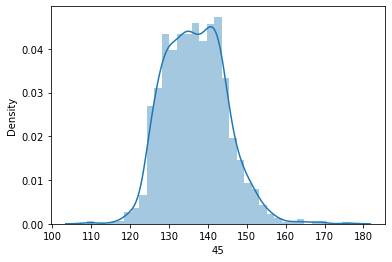

47 is Symmetrically Skewed as Skewness = -0.375 



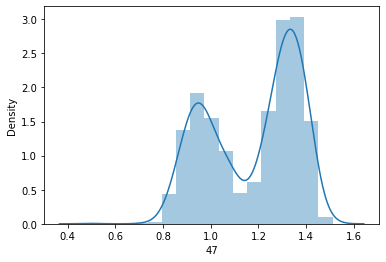

48 is Symmetrically Skewed as Skewness = -0.02 



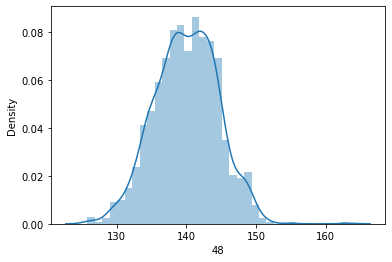

51 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -0.51 



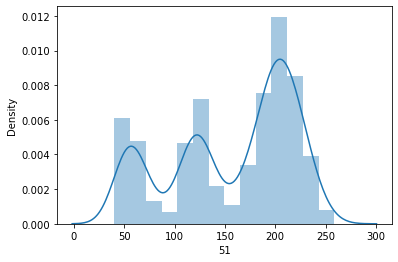

55 is Symmetrically Skewed as Skewness = 0.37 



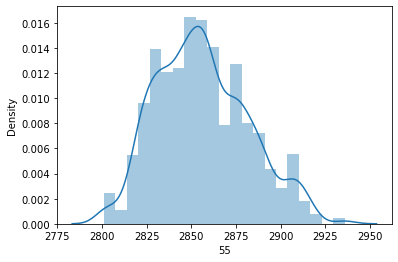

59 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.731 



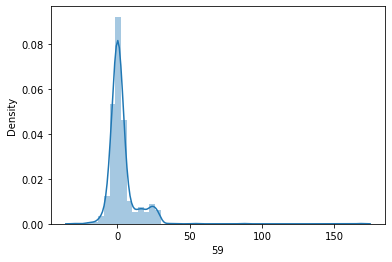

61 is Symmetrically Skewed as Skewness = -0.247 



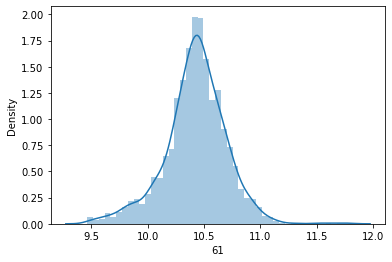

62 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 5.308 



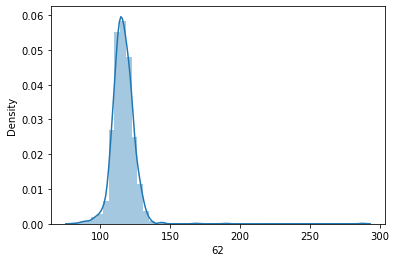

63 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 10.707 



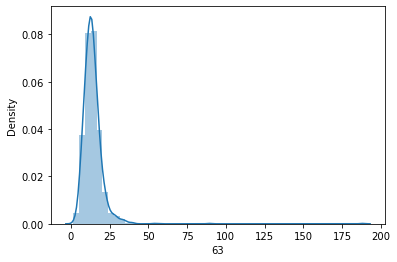

64 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.132 



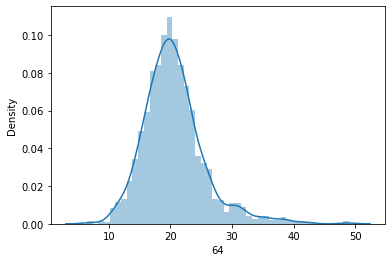

67 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 20.825 



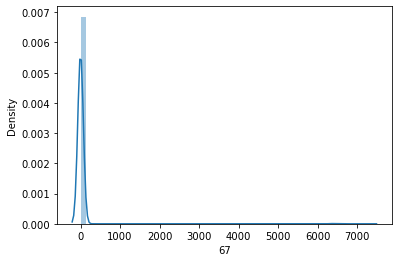

68 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -2.903 



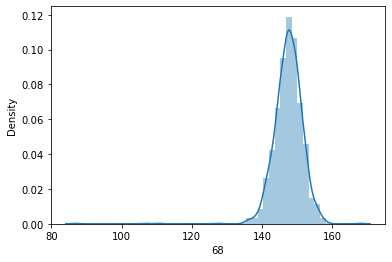

71 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.255 



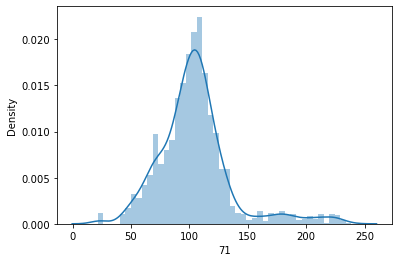

74 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 39.585 



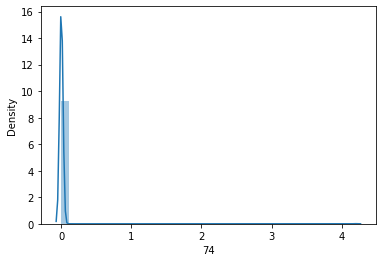

83 is Symmetrically Skewed as Skewness = -0.08 



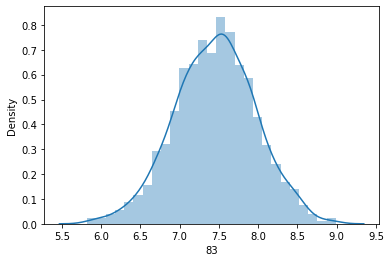

88 is Symmetrically Skewed as Skewness = -0.273 



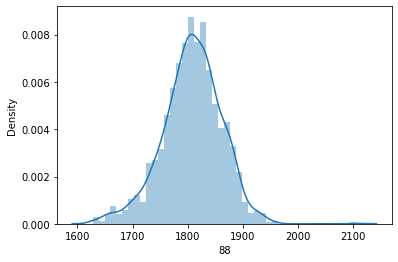

90 is Symmetrically Skewed as Skewness = 0.348 



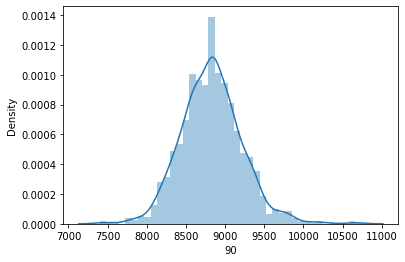

96 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.266 



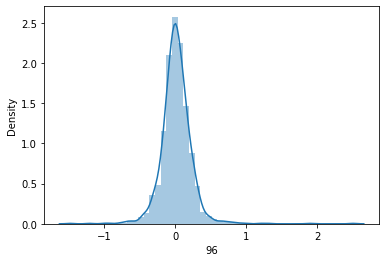

115 is Symmetrically Skewed as Skewness = -0.272 



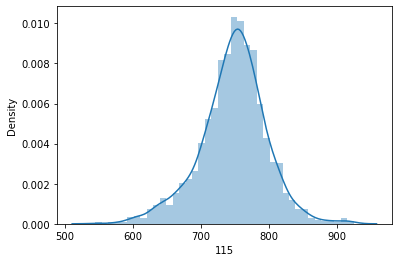

117 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 38.006 



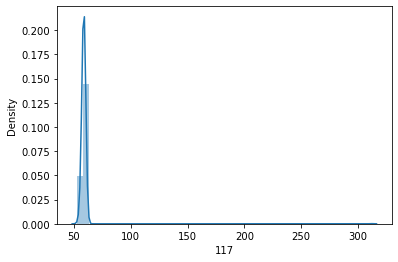

120 is Symmetrically Skewed as Skewness = 0.352 



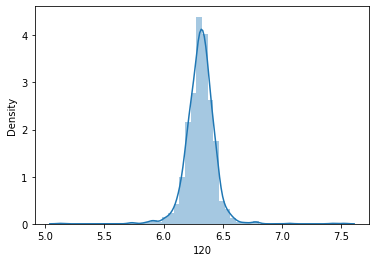

122 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.72 



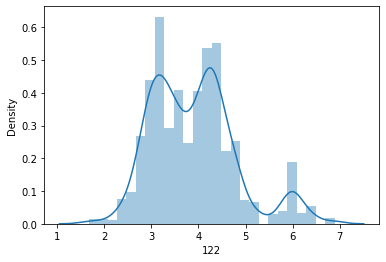

125 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.962 



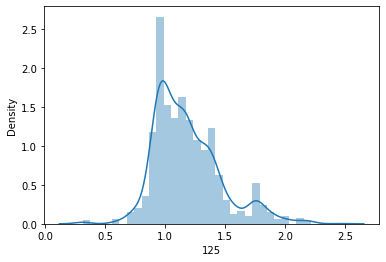

126 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.722 



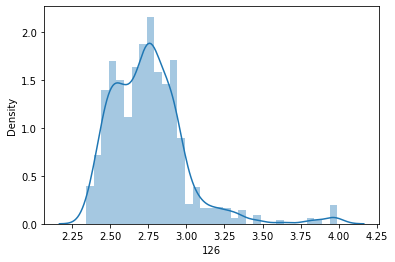

128 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -5.379 



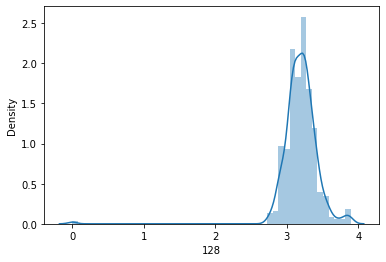

129 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -0.984 



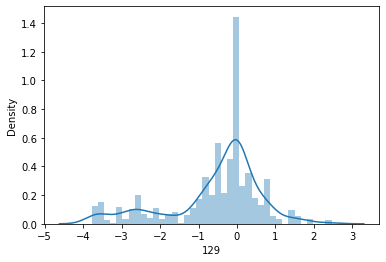

133 is Symmetrically Skewed as Skewness = -0.278 



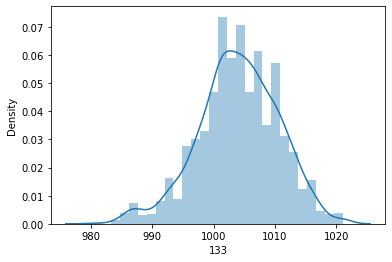

134 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.829 



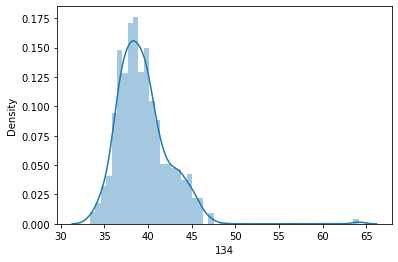

135 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 6.193 



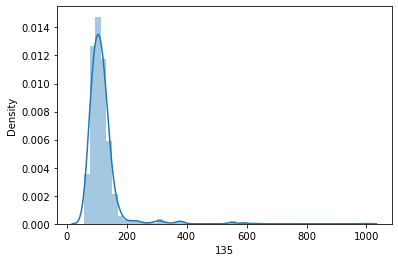

136 is Symmetrically Skewed as Skewness = 0.334 



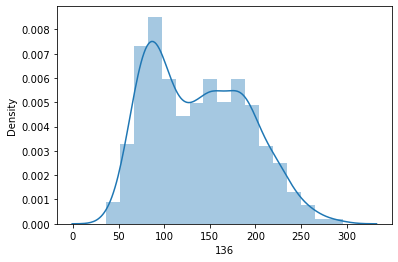

137 is Symmetrically Skewed as Skewness = 0.385 



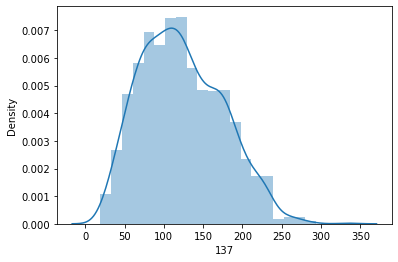

138 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.827 



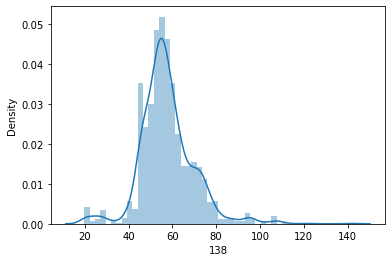

139 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.09 



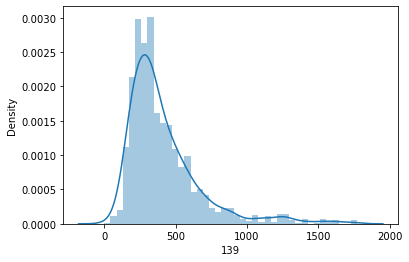

142 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 15.04 



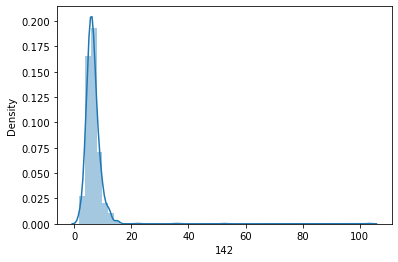

150 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.298 



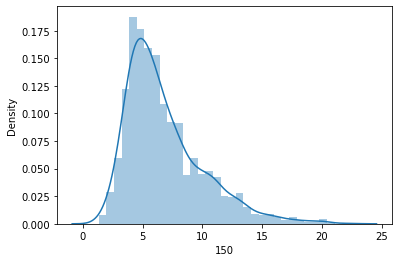

151 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 13.006 



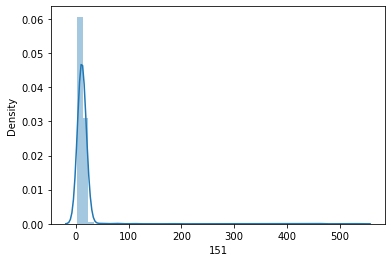

155 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 8.539 



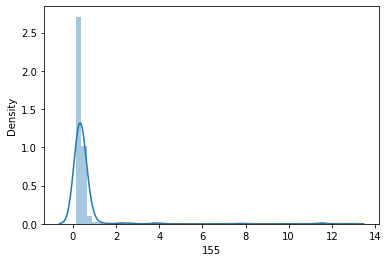

159 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.207 



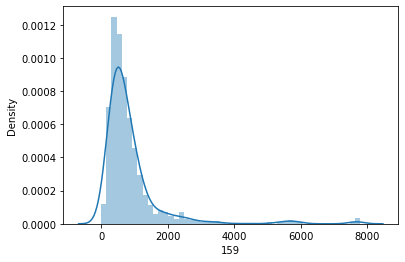

160 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 3.996 



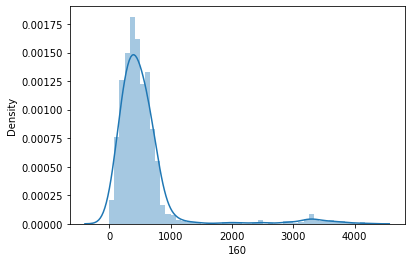

161 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.232 



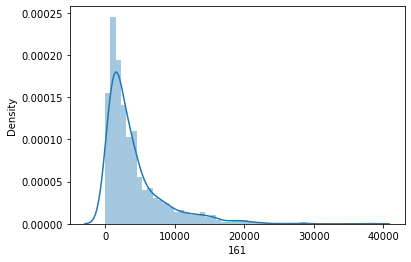

162 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.831 



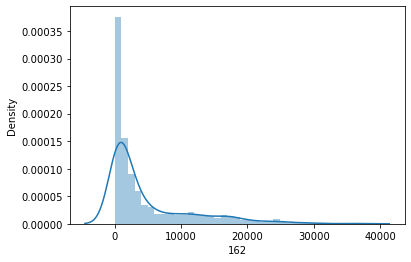

163 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 5.265 



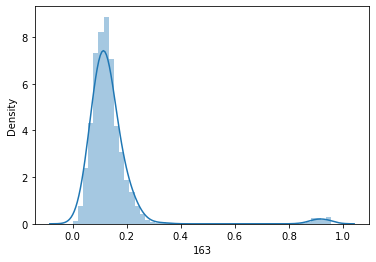

166 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 5.519 



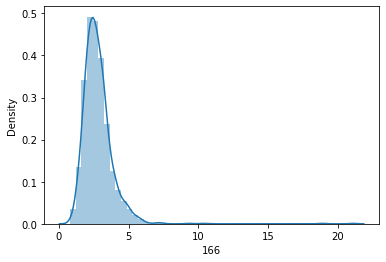

167 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 10.873 



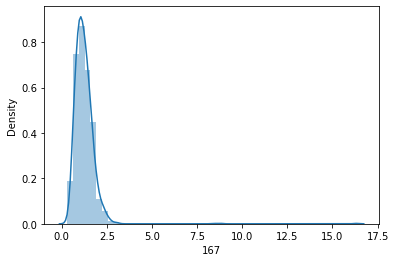

169 is Symmetrically Skewed as Skewness = 0.208 



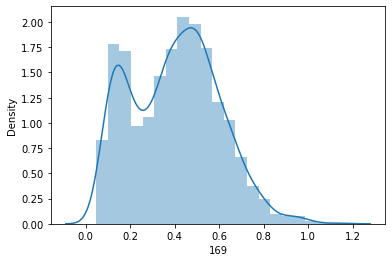

170 is Symmetrically Skewed as Skewness = -0.004 



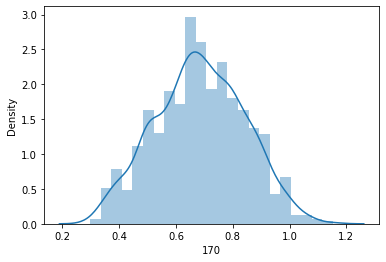

175 is Symmetrically Skewed as Skewness = 0.487 



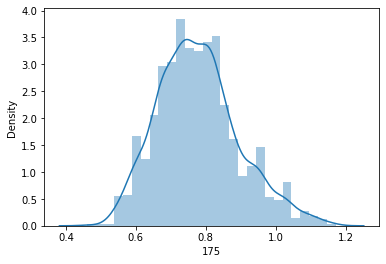

177 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.835 



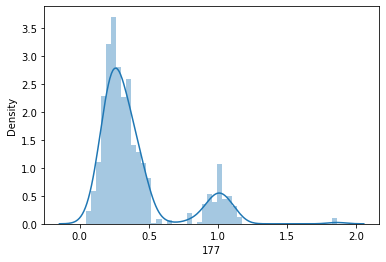

180 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.777 



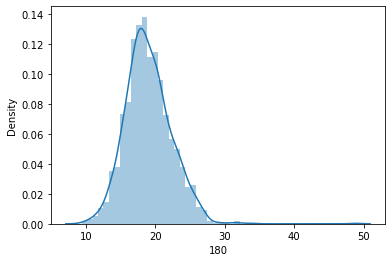

181 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.931 



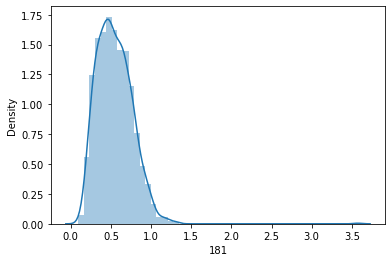

182 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.145 



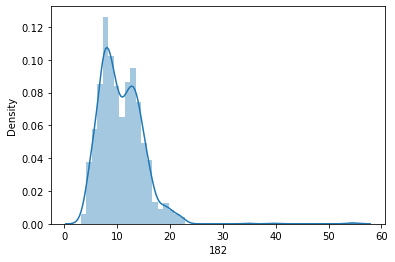

183 is Symmetrically Skewed as Skewness = 0.202 



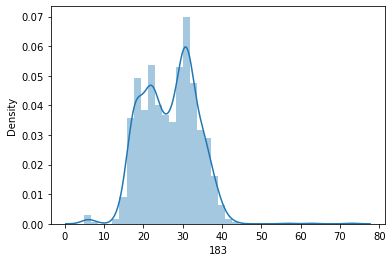

184 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 18.175 



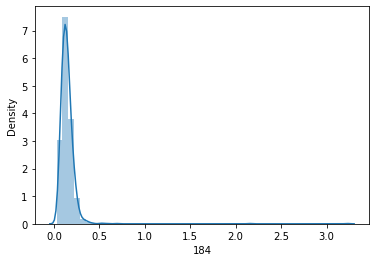

185 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 30.709 



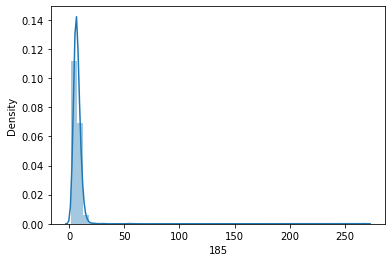

188 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.766 



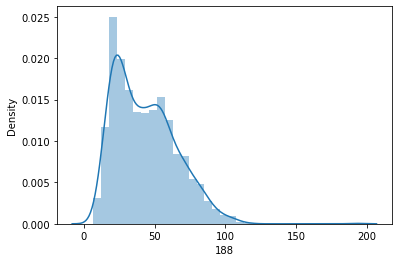

195 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 10.431 



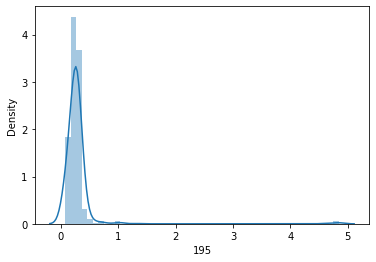

198 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 9.547 



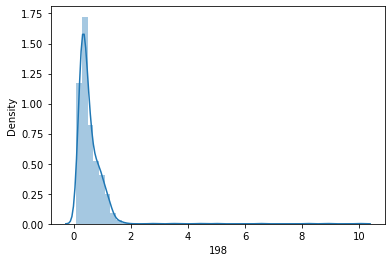

200 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 13.44 



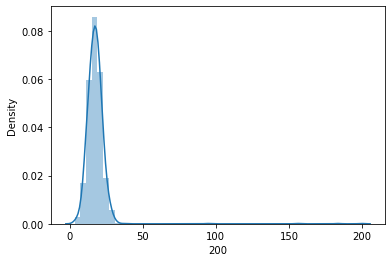

201 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 9.747 



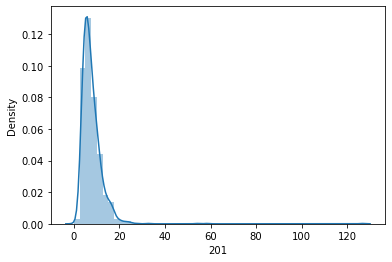

208 is Symmetrically Skewed as Skewness = 0.163 



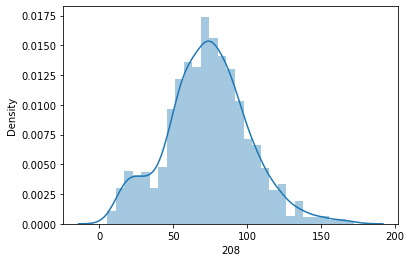

218 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.682 



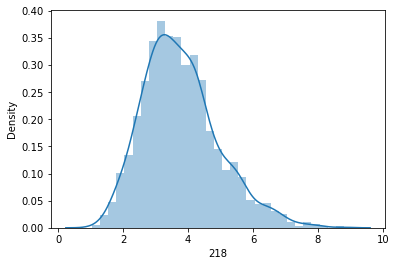

223 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 17.146 



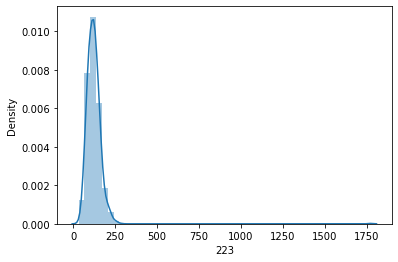

225 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.107 



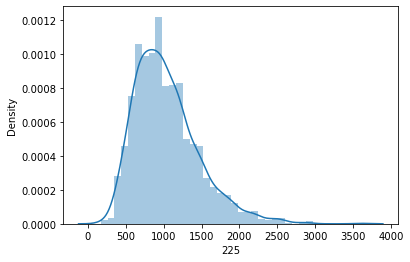

250 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 6.752 



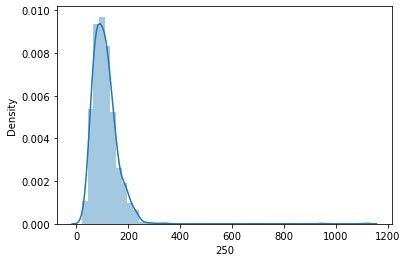

255 is Symmetrically Skewed as Skewness = 0.21 



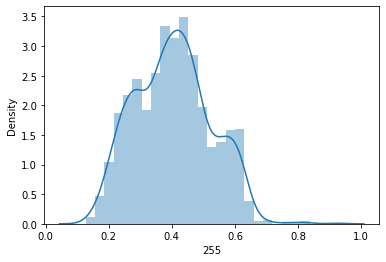

268 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.582 



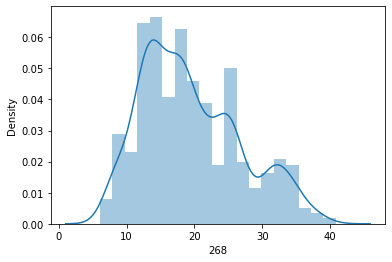

269 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.836 



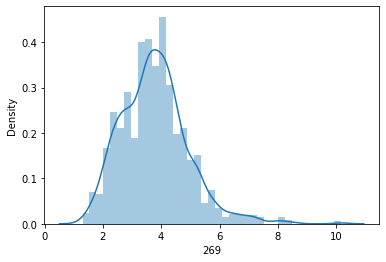

418 is Symmetrically Skewed as Skewness = 0.457 



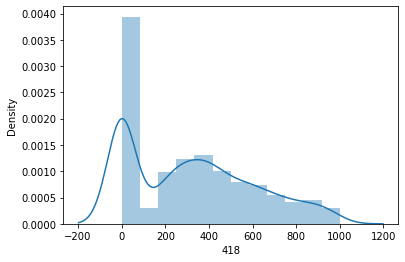

419 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.5 



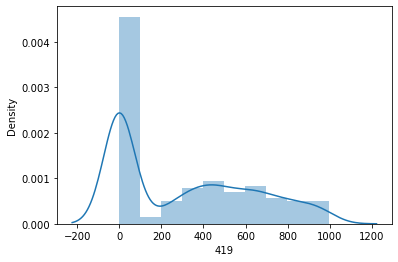

423 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.086 



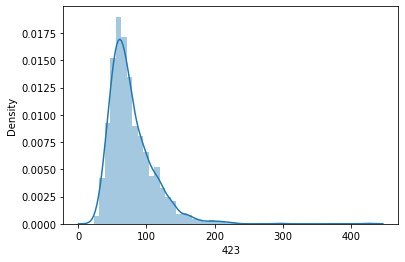

432 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 3.347 



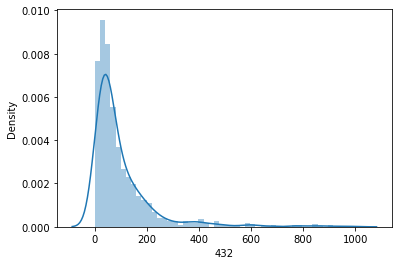

433 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.365 



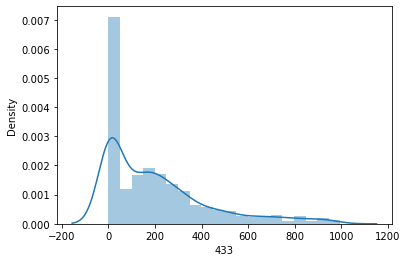

438 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 10.165 



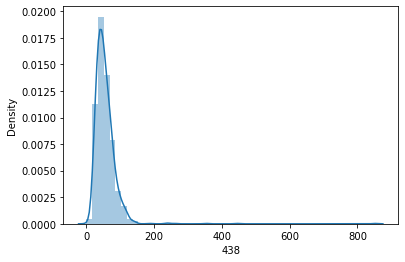

439 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 6.757 



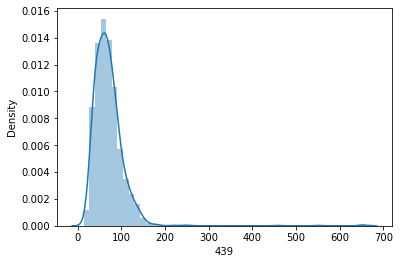

460 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.868 



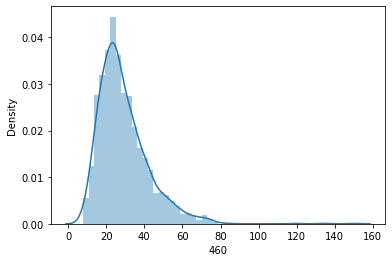

468 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.266 



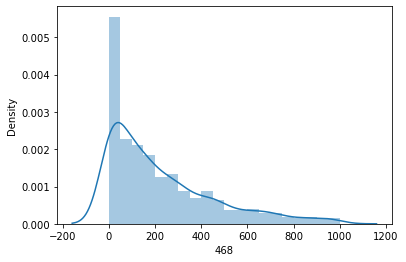

472 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.575 



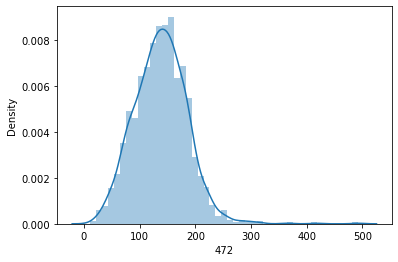

474 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 5.468 



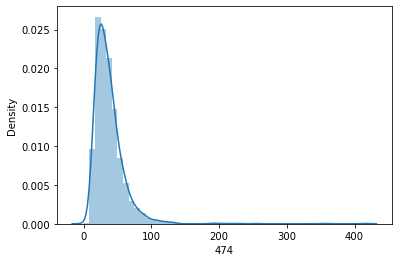

476 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 5.459 



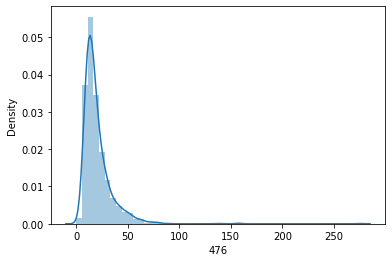

482 is Symmetrically Skewed as Skewness = 0.474 



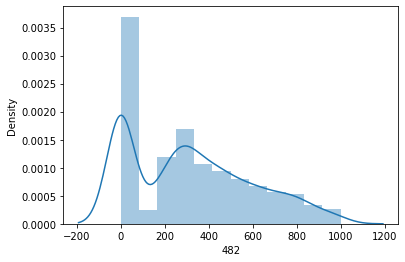

483 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.724 



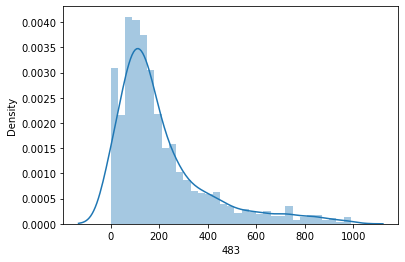

484 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.545 



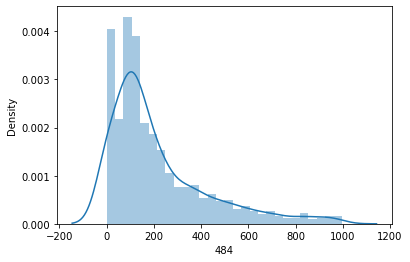

485 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.536 



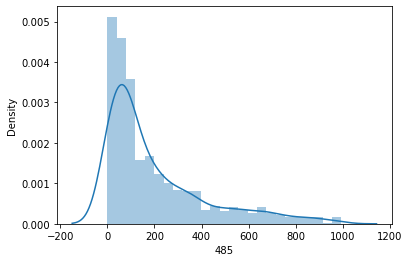

486 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.623 



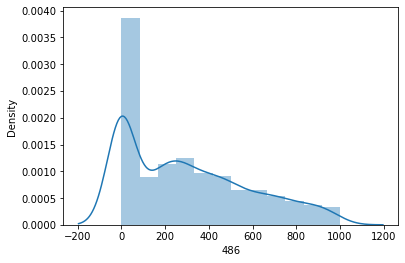

487 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.175 



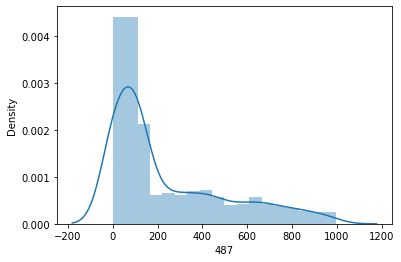

488 is Symmetrically Skewed as Skewness = 0.357 



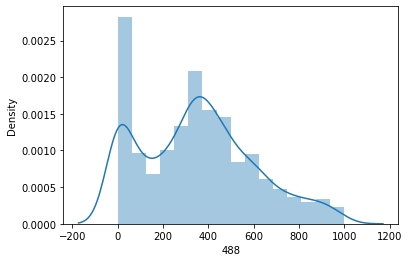

489 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.056 



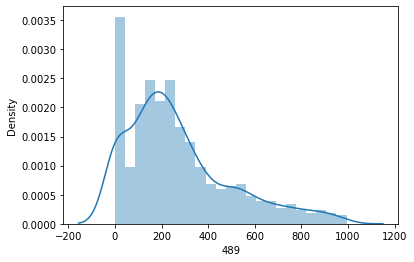

499 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.745 



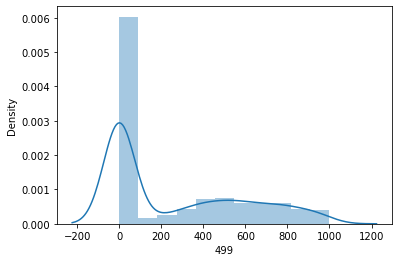

500 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.921 



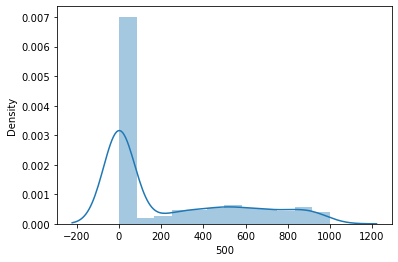

510 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.11 



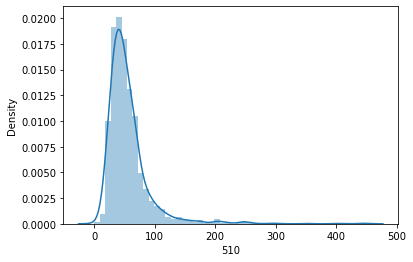

511 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.702 



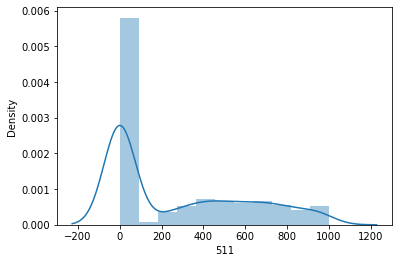

521 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 9.04 



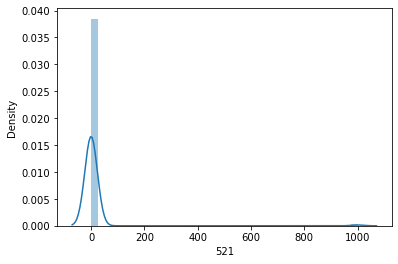

546 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.722 



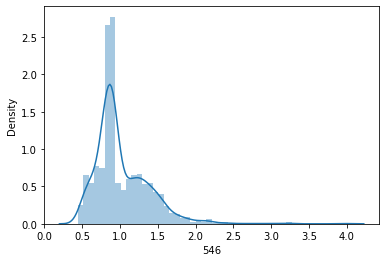

547 is Symmetrically Skewed as Skewness = -0.406 



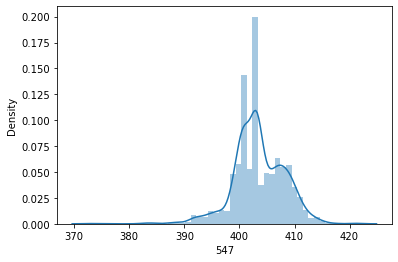

548 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.121 



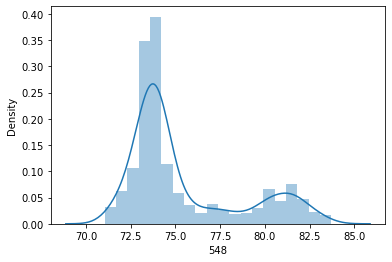

549 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.231 



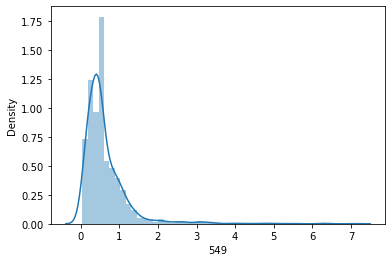

550 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 13.112 



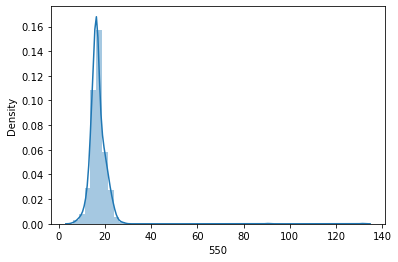

551 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 23.585 



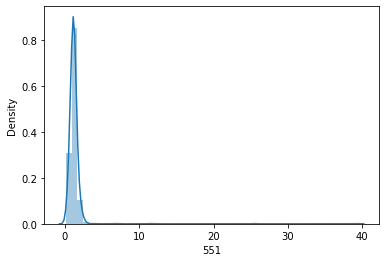

559 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 0.851 



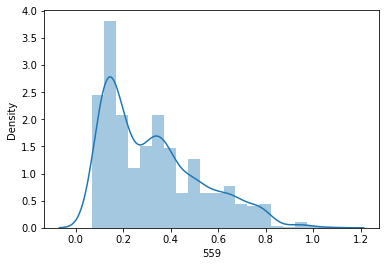

562 is Symmetrically Skewed as Skewness = 0.001 



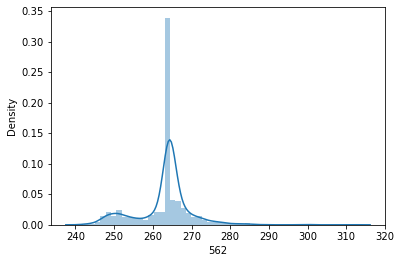

563 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 1.059 



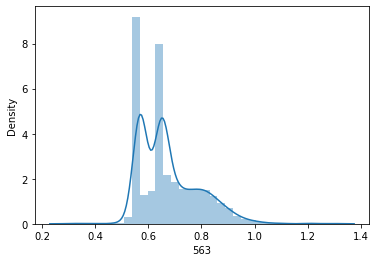

564 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.013 



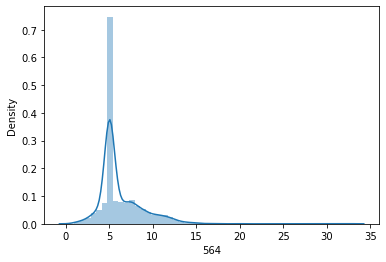

570 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -8.659 



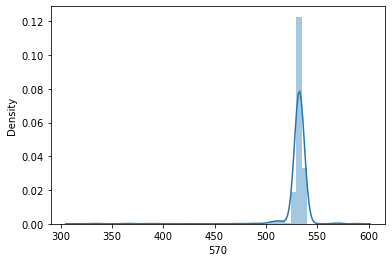

571 is Positively Skewed towards Right side of asymmetric distribution as Skewness = -1.276 



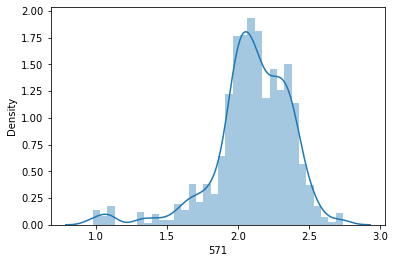

572 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.299 



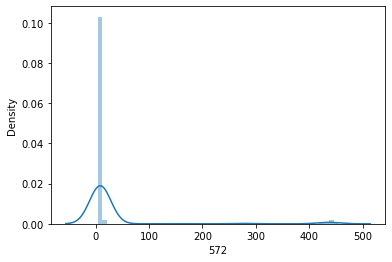

573 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 4.359 



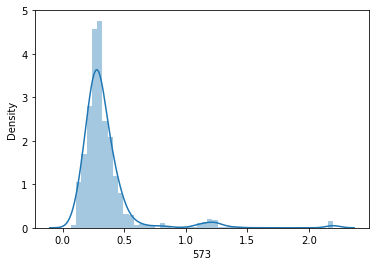

589 is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 2.716 



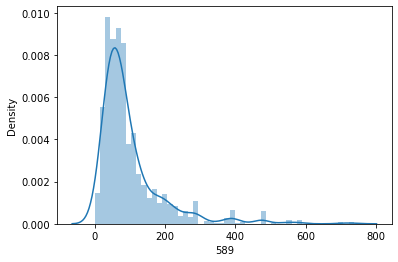

Pass/Fail is Negatively Skewed towards Left side of asymmetric distribution as Skewness = 3.487 



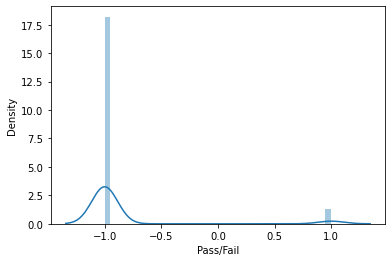

In [27]:
print('''\n\033[1m''' + '''Univariate Analysis of each columns:''' + '''\033[0m''')
print('''\n\033[1m''' + '''Checking of skewness and distribution of each columns:''' + '''\033[0m''')

for x in sd1:
    series          = sd1[x]
    skewness        = series.skew()
    if skewness > -.5  and skewness < .5 :
        print(x,"is Symmetrically Skewed as Skewness =",round(skewness,3),'\n')
    elif skewness > .25:
            print(x,"is Negatively Skewed towards Left side of asymmetric distribution as Skewness =",round(skewness,3),'\n')
    elif skewness < -.25:
            print(x,"is Positively Skewed towards Right side of asymmetric distribution as Skewness =",round(skewness,3),'\n')
    sns.distplot(sd1[x])
    plt.xlabel(x)
    plt.show()

# Model Building

In [28]:
print('''\n\033[1m''' + '''Selecting predictors and target attributes''' + '''\033[0m''')
x = sd1.drop('Pass/Fail',axis=1)
y=sd1['Pass/Fail']
accuracies={}


Selecting predictors and target attributes


In [29]:
print('''\n\033[1m''' + '''Spliting in Train and Test sets''' + '''\033[0m''')
x_train, x_test, y_train,  y_test = train_test_split(x, y,train_size=0.7, test_size=0.3,random_state=202)

print('X_Train',len(x_train),'X_Test',len(x_test))
print('Y_Train',len(y_train),'Y_Test',len(y_test))


Spliting in Train and Test sets
X_Train 1096 X_Test 471
Y_Train 1096 Y_Test 471


In [30]:
print('''\n\033[1m''' + '''Check for target balancing''' + '''\033[0m''')
y.value_counts()


Check for target balancing


-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

In [31]:
print('''\n\033[1m''' + '''Check for target balancing''' + '''\033[0m''')
count_Pass = len(sd[sd['Pass/Fail'] == -1])
print('Total Count of Pass(-1) yield for in-house line testing:',count_Pass)
count_Fail = len(y[y==1])
print('Total Count of Fail(1) yield for in-house line testing:',count_Fail)
Pass= count_Pass/(count_Pass+count_Fail)
print("Percentage of Pass(-1) yield for in-house line testing:",Pass*100)
Fail = count_Fail/(count_Pass+count_Fail)
print("Percentage of Fail(1) yield for in-house line testing:",Fail*100)


Check for target balancing
Total Count of Pass(-1) yield for in-house line testing: 1463
Total Count of Fail(1) yield for in-house line testing: 104
Percentage of Pass(-1) yield for in-house line testing: 93.36311423101468
Percentage of Fail(1) yield for in-house line testing: 6.636885768985322



COUNT PLOT OF TARGET COLUMN


<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

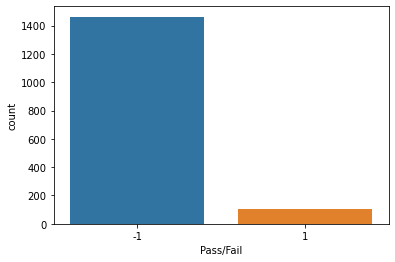

In [32]:
print('''\n\033[1m''' + '''COUNT PLOT OF TARGET COLUMN''' + '''\033[0m''')
sns.countplot(x='Pass/Fail',data=sd)

In [33]:
mx=max(count_Pass,count_Fail)
mn=min(count_Pass,count_Fail)
if mn/mx >= .67:
    print('Target column is balanced')
else:
    print('Taarget column is Imbalanced')

Taarget column is Imbalanced


### Balancing Target column


RANDOM OVER-SAMPLING
New random picked points  1359


<AxesSubplot:title={'center':'Count'}>

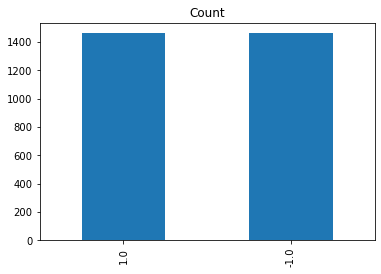

In [34]:
print('''\n\033[1m''' + '''RANDOM OVER-SAMPLING''' + '''\033[0m''')

from imblearn.over_sampling import RandomOverSampler

bal = RandomOverSampler()
x_bal, y_bal = bal.fit_sample(x, y)
rn=x_bal.shape[0] - x.shape[0]
print('New random picked points ',rn)

y_bal.value_counts().plot(kind='bar', title='Count')

In [35]:
nsd = pd.concat([x_bal,y_bal], axis=1)

In [36]:
print('''\n\033[1m''' + '''NEW DATASET WITH BALANCED TARGET COLUMN''' + '''\033[0m''')
nsd


NEW DATASET WITH BALANCED TARGET COLUMN


0        1          2          3       4         6        12  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   
...       ...      ...        ...        ...     ...       ...       ...   
2921  2971.99  2502.62  2239.3000  1192.7495  1.2479  100.1189  201.9597   
2922  3037.49  2463.11  2205.2889  1630.3112  1.2733   98.8056  199.7563   
2923  2977.29  2471.50  2214.7889  1687.4606  2.2073   97.3378  203.7140   
2924  2964.77  2524.44  2181.5111  1177.0830  1.3012  100.9333  195.5249   
2925  3163.86  2470.60  2211.4000  1511.7842  1.3004   97.4700  197.9805   

           14        15       16        18       19       21       22  \
0      7.9558  414.8710  10.0433  192.3963  12.5190 -5419.00  2916.50   
1     10.1548  414.7347   9.2599  191.2872  12.4608 -5441.50  2604.25   
2      9.5157  416.7075   9.3144  192.7035  12.5404 -5447.75  2701.75   
3      9.6052  422.2894   9.6924  192.1557  12.4782 -5468.25  2648.25   
4     10.5661  420.5925  10.3387  191.6037  12.4735 -5476.25  2635.25   
...       ...       ...      ...       ...      ...      ...      ...   
2921   4.7482  404.6931   9.6496  192.3100  12.4659 -5495.75  2703.75   
2922   6.8695  396.9662  10.3504  189.4059  12.3741 -6057.25  2609.00   
2923   4.8012  407.3098   9.0489  194.6651  12.5590 -5459.00  2635.75   
2924  11.7113  408.0994   9.8767  185.6482  12.5098 -6349.50  2966.75   
2925  10.3963  404.7285   9.9074  188.0731  12.4694 -5390.00  2596.25   

           23         24      25       28      29      31       32      33  \
0    -4043.75   751.0000  0.8955  64.2333  2.0222  3.5191  83.3971  9.5126   
1    -3498.75 -1640.2500  1.2973  68.4222  2.2667  3.4171  84.9052  9.7997   
2    -4047.00 -1916.5000  1.3122  67.1333  2.3333  3.5986  84.7569  8.6590   
3    -4515.00 -1657.2500  1.3137  62.9333  2.6444  3.3813  84.9105  8.6789   
4    -3987.50   117.0000  1.2887  62.8333  3.1556  3.2728  86.3269  8.7677   
...       ...        ...     ...      ...     ...     ...      ...     ...   
2921 -3914.75  1334.5000  1.3057  62.8333  2.7111  3.2932  83.8746  9.2658   
2922 -4709.25 -2523.5000  1.2825  69.0667  2.4000  3.4074  84.3232  8.5218   
2923 -3735.00 -3060.3333  1.2913  66.3111  2.7000  3.3181  84.4061  8.6772   
2924 -4438.25  1576.7500  0.9853  69.0111  2.3111  4.6423  84.8180  8.6309   
2925 -3240.00 -1666.6667  1.2668  70.2556  2.0111  3.2300  86.8990  9.3181   

           34       35       36       37       38        39     40     41  \
0     50.6170  64.2588  49.3830  66.3141  86.9555  117.5132  61.29  4.515   
1     50.6596  64.2828  49.3404  64.9193  87.5241  118.1188  78.25  2.773   
2     50.1530  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434   
3     50.5100  64.1125  49.4900  65.1951  86.6867  117.0442  76.90  1.279   
4     50.2480  64.1511  49.7520  66.1542  86.1468  121.4364  76.39  2.209   
...       ...      ...      ...      ...      ...       ...    ...    ...   
2921  50.2261  64.3328  49.7739  66.5940  88.2109  119.1040  73.32  2.051   
2922  50.3583  64.2803  49.6417  66.1861  87.0459  118.1020  78.42  3.645   
2923  50.4095  64.2376  49.5905  66.2913  86.2590  118.5420  79.86  2.936   
2924  50.2512  64.2144  49.7488  65.9697  86.7969  117.4996  78.31  2.408   
2925  50.7948  64.1792  49.2052  65.8829  87.4062  118.7162  78.70  2.932   

            43       44        45      47        48        51      55  \
0     352.7173  10.1841  130.3691  1.3072  141.2282  218.3174  2834.0   
1     352.2445  10.0373  133.1727  1.2887  145.8445  205.1695  2853.0   
2     364.3782   9.8783  131.8027  1.2992  141.0845  185.7574  2936.0   
3     363.0273   9.9305  131.8027  1.3027  142.5427  189.9079  2936.

In [37]:
print('''\n\033[1m''' + '''SHAPE OF NEW DATAFRAME''' + '''\033[0m''')
nsd.shape


SHAPE OF NEW DATAFRAME


(2926, 140)

In [38]:
print('''\n\033[1m''' + '''BALANCED TARGET''' + '''\033[0m''')
nsd['Pass/Fail'].value_counts()


BALANCED TARGET


 1.0    1463
-1.0    1463
Name: Pass/Fail, dtype: int64

# Training Model

In [39]:
nsd=nsd.apply(zscore)

In [40]:
nx = nsd.drop('Pass/Fail',axis=1)
ny=nsd['Pass/Fail']

In [41]:
print('''\n\033[1m''' + '''Spliting New dataset in Train and Test sets''' + '''\033[0m''')
nx_train,nx_test,ny_train, ny_test = train_test_split(nx, ny,train_size=0.7, test_size=0.3,random_state=202)

print('New X_Train',len(nx_train)),print('New X_Test',len(nx_test))
print('New Y_Train',len(ny_train)),print('New Y_Test',len(ny_test))
score_train={}
score_test={}
accuracy={}


Spliting New dataset in Train and Test sets
New X_Train 2048
New X_Test 878
New Y_Train 2048
New Y_Test 878


### Checking the statistical characteristics of train and test data with original data.

In [42]:
new_sd1 = pd.concat([nx_train,nx_test], axis=0, ignore_index=True)
new_sd1

0         1         2         3         4         6        12  \
0    -1.064747 -0.313718 -0.385191 -0.124860 -0.040510  0.679484  1.431873   
1     0.465627  0.656212 -0.934419  0.956997 -0.035881 -0.724824 -0.079498   
2     1.208099  1.203306  0.617374  0.652699 -0.048606 -0.570695  0.710161   
3     2.213874 -1.417944  0.318135  0.536947 -0.028187 -2.064199 -1.744289   
4    -0.720244 -0.233140 -0.268778  0.155081 -0.010929  1.075359  0.016208   
...        ...       ...       ...       ...       ...       ...       ...   
2921 -2.303706 -2.724005  0.338656  1.890460 -0.042996 -1.107467 -1.008629   
2922 -0.399083 -2.577844  0.599834  0.361609 -0.048160  0.793741 -1.162657   
2923  0.576069  0.373409 -0.643015 -1.102484 -0.035039  0.474043 -0.323119   
2924 -0.004881  0.363630 -0.768008 -0.723478 -0.037150 -0.034899  0.609794   
2925 -0.568009  1.753268  0.820347 -1.082388 -0.037581  0.622454 -1.520423   

            14        15        16        18        19        21        22  \
0    -0.466871  1.341764 -0.294925  1.780056  0.177770  0.026935 -0.264984   
1    -1.730163 -0.972754  0.139909 -0.181187  0.100092  0.031449 -0.237009   
2    -0.241396  0.882404  0.225006  0.634173 -0.261598 -0.065613  0.194907   
3    -0.090547  0.007528 -0.375680 -1.674757  0.094023 -0.000797 -0.157176   
4     0.866046 -0.038066 -0.066572  0.062966  0.799804 -1.054297 -1.055806   
...        ...       ...       ...       ...       ...       ...       ...   
2921  0.156209  1.054760 -0.169089 -1.000539  0.342837  0.156244 -0.406227   
2922  0.839196 -0.510988  0.622550 -1.701396 -0.186347  0.300709 -0.103272   
2923 -1.148652 -0.242270 -0.056276 -0.318821  0.180197 -0.005634 -0.202210   
2924 -0.678904 -0.319537 -0.039189  0.700434 -0.196057  0.352949 -0.177646   
2925  0.369589  0.690372 -0.085272 -1.622114 -0.206981  5.268312 -5.583755   

            23        24        25        28        29        31        32  \
0    -1.275005 -0.276734  0.502880  1.428983 -2.179305 -0.467619 -0.047774   
1    -2.138469  0.009712  0.362974 -1.212800  0.561117 -0.693976 -0.172802   
2    -0.269933  0.023088  0.493427 -0.544937  0.617562 -0.571524 -0.298699   
3    -0.365550  0.020545  0.298220  2.297536 -0.851556 -0.375082 -0.293445   
4     0.145075  0.323192 -2.575527  1.327009 -1.303377 -2.839877 -0.643841   
...        ...       ...       ...       ...       ...       ...       ...   
2921  0.079815 -0.969725  0.636169  0.418987  1.295676 -0.465625 -0.575579   
2922 -0.043069  2.589047  0.326580  0.692042 -1.218708 -0.553575 -0.024704   
2923  1.859460 -0.554514  0.500517  1.600064  0.250410 -0.447676 -0.743705   
2924  0.061637  0.297760  0.558181 -0.518644  0.222187 -0.264597 -0.640404   
2925  2.014883  0.198667 -4.547447 -1.893809  0.109041 -0.331805 -0.164664   

            33        34        35        36        37        38        39  \
0    -0.427485 -0.243219 -0.126241  0.243212 -0.618441 -0.499261  0.847857   
1    -0.234486 -0.048887 -0.047111  0.048880 -1.048353 -0.048757 -0.349539   
2    -0.045743 -0.124182 -0.094651  0.124174  0.852836  0.254600 -0.319323   
3    -0.019124  0.030691  0.133986 -0.030699  0.027805  0.764724  0.308888   
4    -0.281569 -0.140163  0.021356  0.140156 -0.982902 -0.073946 -0.675239   
...        ...       ...       ...       ...       ...       ...       ...   
2921 -0.150423 -0.371566  0.067652  0.371558 -0.453779  0.057436 -0.448502   
2922  0.017496 -0.100045 -0.312803  0.100037 -1.847893 -0.948678 -0.047145   
2923 -0.436358 -0.221142 -0.132284  0.221134 -0.975668 -0.330005  0.673003   
2924  0.012470 -0.134808 -0.083410  0.134801  1.220742  0.181932 -0.236639   
2925  0.025292 -0.327987 -0.126063  0.327980  0.920354  2.644845 -0.235936   

            40        41        43        44        45        47        48  \
0     0.611802 -0.165411 -0.442840  0.005288  0.649235  0.569495  1.258773   
1     0.426295 -0.563424  0.826279 -0.430288 -1.130661  0.694065  0.731027   
2    -0.028258 -0.281255  0.724

In [43]:
a=nsd.drop('Pass/Fail',axis=1)
a.describe()

0             1             2             3             4  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -3.944669e-15  4.975894e-16  2.519060e-16 -8.362719e-17 -4.731775e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.338221e+00 -4.384322e+00 -4.685578e+00 -3.484829e+00 -5.245552e-02   
25%   -6.886170e-01 -5.418254e-01 -7.254718e-01 -7.502949e-01 -4.396021e-02   
50%   -1.419291e-01  5.729133e-02 -7.139848e-02 -2.357250e-01 -3.714983e-02   
75%    5.641467e-01  5.229921e-01  5.930277e-01  5.011071e-01 -3.222893e-02   
max    4.356449e+00  4.582089e+00  3.864230e+00  5.932152e+00  2.706863e+01   

                  6            12            14            15            16  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   2.607468e-16  5.343565e-16 -7.021041e-16 -6.631363e-16 -2.527787e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.412454e+00 -6.006751e+00 -2.292982e+00 -5.852905e+00 -3.042174e+00   
25%   -4.508966e-01 -5.557568e-01 -7.498768e-01 -4.691685e-01 -1.754332e-01   
50%    4.738815e-02 -8.037606e-02  4.458867e-02 -3.980294e-02 -2.310509e-02   
75%    5.182499e-01  6.856686e-01  7.011072e-01  4.233169e-01  1.322284e-01   
max    4.956723e+00  2.437031e+01  3.842126e+00  3.031353e+01  5.172143e+01   

                 18            19            21            22            23  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   7.611250e-15  7.346292e-15 -6.033945e-17  4.451611e-16  1.106808e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -7.747908e+00 -1.586949e+01 -2.108119e+00 -7.274572e+00 -4.501270e+00   
25%   -5.871694e-01 -1.863474e-01 -3.147996e-01 -2.390558e-01 -4.558051e-01   
50%   -1.504068e-01  3.576423e-02  3.789857e-02 -3.776817e-02 -1.780168e-02   
75%    7.720682e-01  3.367680e-01  2.562893e-01  3.284730e-01  3.540635e-01   
max    9.571230e+00  3.019100e+00  7.114757e+00  2.704520e+00  4.478573e+00   

                 24            25            28            29            31  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   4.270526e-17  1.544675e-16 -3.220975e-15 -1.047237e-17  9.531375e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -5.428998e+00 -5.647789e+00 -2.811691e+00 -4.354505e+00 -3.104923e+00   
25%   -4.067933e-01  2.391383e-01 -5.679729e-01 -7.384097e-01 -5.096001e-01   
50%    1.193549e-01  4.140209e-01 -5.475853e-02 -3.850667e-03 -3.902394e-01   
75%    6.371434e-01  5.194232e-01  6.328238e-01  7.024854e-01 -2.093535e-01   
max    5.463870e+00  8.880947e-01  2.665991e+00  2.877685e+00  2.348775e+00   

                 32            33            34            35            36  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   2.800676e-15  2.358702e-16  7.400987e-15 -4.452465e-16 -3.372587e-15   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -9.189028e-01 -7.940465e-01 -6.205154e-01 -3.670969e-01 -7.564916e+00   
25%   -3.815183e-01 -2.751577e-01 -2.774890e-01 -2.179227e-01  2.927340e-02   
50%   -1.293088e-01 -1.805298e-01 -1.637235e-01 -1.518329e-01  1.637159e-01   
75%    9.025109e-02  6.353720e-03 -2.919851e-02 -9.277414e-02  2.774813e-01   
max    7.938115e+00  7.279888e+00  7.564915e+00  1.322262e+01  6.205074e-01   

                 37            38            39            40            41  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -9.008894e-15 -1.361932e-14 -2.493719e-15 -5.691506e-19  5.829999e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -4.542077e+00 -3.876230e+00 -4.067862e+00 -2.511079e+00 -1.839246e+00   
25%   -5.977723e-01 -5.187869e-01 -3.731964e-01  1.096162e-02 -

In [44]:
new_sd1.describe()

0             1             2             3             4  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -3.997068e-15  4.997901e-16  2.830196e-16 -1.358373e-17 -6.713368e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.338221e+00 -4.384322e+00 -4.685578e+00 -3.484829e+00 -5.245552e-02   
25%   -6.886170e-01 -5.418254e-01 -7.254718e-01 -7.502949e-01 -4.396021e-02   
50%   -1.419291e-01  5.729133e-02 -7.139848e-02 -2.357250e-01 -3.714983e-02   
75%    5.641467e-01  5.229921e-01  5.930277e-01  5.011071e-01 -3.222893e-02   
max    4.356449e+00  4.582089e+00  3.864230e+00  5.932152e+00  2.706863e+01   

                  6            12            14            15            16  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   1.776129e-16  4.975894e-16 -4.151194e-16 -6.758094e-16 -2.331810e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.412454e+00 -6.006751e+00 -2.292982e+00 -5.852905e+00 -3.042174e+00   
25%   -4.508966e-01 -5.557568e-01 -7.498768e-01 -4.691685e-01 -1.754332e-01   
50%    4.738815e-02 -8.037606e-02  4.458867e-02 -3.980294e-02 -2.310509e-02   
75%    5.182499e-01  6.856686e-01  7.011072e-01  4.233169e-01  1.322284e-01   
max    4.956723e+00  2.437031e+01  3.842126e+00  3.031353e+01  5.172143e+01   

                 18            19            21            22            23  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   7.514457e-15  7.465368e-15 -2.610504e-17  3.366336e-16  1.276415e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -7.747908e+00 -1.586949e+01 -2.108119e+00 -7.274572e+00 -4.501270e+00   
25%   -5.871694e-01 -1.863474e-01 -3.147996e-01 -2.390558e-01 -4.558051e-01   
50%   -1.504068e-01  3.576423e-02  3.789857e-02 -3.776817e-02 -1.780168e-02   
75%    7.720682e-01  3.367680e-01  2.562893e-01  3.284730e-01  3.540635e-01   
max    9.571230e+00  3.019100e+00  7.114757e+00  2.704520e+00  4.478573e+00   

                 24            25            28            29            31  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   1.201856e-17  1.253649e-16 -3.007467e-15 -7.124816e-17  7.169779e-16   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -5.428998e+00 -5.647789e+00 -2.811691e+00 -4.354505e+00 -3.104923e+00   
25%   -4.067933e-01  2.391383e-01 -5.679729e-01 -7.384097e-01 -5.096001e-01   
50%    1.193549e-01  4.140209e-01 -5.475853e-02 -3.850667e-03 -3.902394e-01   
75%    6.371434e-01  5.194232e-01  6.328238e-01  7.024854e-01 -2.093535e-01   
max    5.463870e+00  8.880947e-01  2.665991e+00  2.877685e+00  2.348775e+00   

                 32            33            34            35            36  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   2.470189e-15 -1.316754e-17  7.389452e-15 -5.676139e-16 -3.288021e-15   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -9.189028e-01 -7.940465e-01 -6.205154e-01 -3.670969e-01 -7.564916e+00   
25%   -3.815183e-01 -2.751577e-01 -2.774890e-01 -2.179227e-01  2.927340e-02   
50%   -1.293088e-01 -1.805298e-01 -1.637235e-01 -1.518329e-01  1.637159e-01   
75%    9.025109e-02  6.353720e-03 -2.919851e-02 -9.277414e-02  2.774813e-01   
max    7.938115e+00  7.279888e+00  7.564915e+00  1.322262e+01  6.205074e-01   

                 37            38            39            40            41  \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean  -8.869604e-15 -1.367843e-14 -2.521081e-15  9.368218e-17 -7.774597e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -4.542077e+00 -3.876230e+00 -4.067862e+00 -2.511079e+00 -1.839246e+00   
25%   -5.977723e-01 -5.187869e-01 -3.731964e-01  1.096162e-02 -

	LOGISTIC REGRESSION WITH BALANCEED TARGET SET

LOG-REG TRAIN SCORE 0.8193359375

LOG-REG TEST SCORE 0.907744874715262

		LOG-REG MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90       415
         1.0       0.89      0.94      0.92       463

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878



LOG-REG MODEL CONFUSION METRICS WITH HEATMAP
 [[361  54]
 [ 27 436]]


<AxesSubplot:>

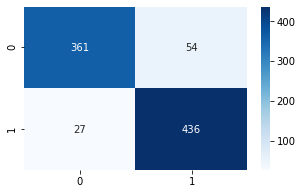

In [45]:
# LOGISTIC REGRESSION WITH BALANCEED TARGET SET
print('''\033[1m''' + '''\tLOGISTIC REGRESSION WITH BALANCEED TARGET SET''' + '''\033[0m''')

model = LogisticRegression() 
model.fit(nx_train, ny_train)
model.fit(nx_test, ny_test)

ny_predict = model.predict(nx_test)

model_train = model.score(nx_train,ny_train)
model_test = model.score(nx_test,ny_test)

score_train['LOG-REG TRAIN'] = model_train
score_test['LOG-REG TEST'] = model_test

print('''\n\033[1m''' + '''LOG-REG TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''LOG-REG TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\n\t\tLOG-REG MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',metrics.classification_report(ny_test, ny_predict))

print('''\n\n\033[1m''' + '''LOG-REG MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',metrics.confusion_matrix(ny_test, ny_predict))
cm1 = metrics.confusion_matrix(ny_test, ny_predict)
plt.figure(figsize = (5,3))
sns.heatmap(cm1, annot=True,cmap='Blues', fmt='g')

In [46]:
# KFOLD CROSS VALIDATION
print('''\033[1m''' + '''KFOLD CROSS VALIDATION''' + '''\033[0m''')
print('''\033[1m''' + '''LOGISTIC REGRESSION MODEL''' + '''\033[0m''')

kfold = KFold(n_splits = 25, random_state = 56)
model_train= cross_val_score(model,nx_train,ny_train,cv = kfold)
model_test= cross_val_score(model,nx_test,ny_test,cv = kfold)

score_train['LOG-REG  KFLOD TRAIN SCORE'] = model_train.mean()
score_test['LOG-REG KFLOD TEST SCORE'] = model_test.mean()

print('''\033[1m''' + '''KFOLD TRAIN OVERALL SCORE''' + '''\033[0m {:.2f}% WITH STD+/-({:.2f}%)'''.format(model_train.mean(),model_train.std()))
print('''\033[1m''' + '''KFOLD TEST OVERALL SCORE ''' + '''\033[0m {:.2f}% WITH STD+/-({:.2f}%)'''.format(model_test.mean(),model_test.std()))

KFOLD CROSS VALIDATION
LOGISTIC REGRESSION MODEL
KFOLD TRAIN OVERALL SCORE 0.83% WITH STD+/-(0.04%)
KFOLD TEST OVERALL SCORE  0.83% WITH STD+/-(0.06%)


In [47]:
# LEAVE ONE OUT CROSS VALIDATION
print('''\033[1m''' + '''LEAVE ONE OUT CROSS CROSS VALIDATION''' + '''\033[0m''')
print('''\033[1m''' + '''LOGISTIC REGRESSION MODEL''' + '''\033[0m''')
loocv = LeaveOneOut()

model_train= cross_val_score(model,nx_train,ny_train,cv = loocv)
model_test= cross_val_score(model,nx_test,ny_test,cv = loocv)

score_train['LOG-REG LOOCV TRAIN SCORE'] = model_train.mean()
score_test['LOG-REG LOOCV TEST SCORE'] = model_test.mean()

print('''\033[1m''' + '''LOOCV TRAIN OVERALL ACURRACY ''' + '''\033[0m {:.2f}% WITH STD+/-({:.2f}%)'''.format(model_train.mean(),model_train.std()))
print('''\033[1m''' + '''LOOCV TEST OVERALL ACURRACY ''' + '''\033[0m {:.2f}% WITH STD+/-({:.2f}%)'''.format(model_test.mean(),model_test.std()))

LEAVE ONE OUT CROSS CROSS VALIDATION
LOGISTIC REGRESSION MODEL
LOOCV TRAIN OVERALL ACURRACY  0.83% WITH STD+/-(0.37%)
LOOCV TEST OVERALL ACURRACY  0.84% WITH STD+/-(0.37%)


In [48]:
# LR HYPERPARAMETER TUNUNG
print('''\033[1m''' + '''HYPERPARAMETER TUNUNG''' + '''\033[0m''')

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
randomCV = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = randomCV.fit(nx,ny)

# summarize results
print(f"Best model score of Random Forest using parameters {grid_result.best_params_} is  {grid_result.best_score_:.3f}")

HYPERPARAMETER TUNUNG
Best model score of Random Forest using parameters {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100} is  0.844


	LOGISTIC REGRESSION HYPERPARAMETER TUNING

LOG-REG TUINING TRAIN SCORE 0.8173828125

LOG-REG TUINING TEST SCORE 0.908883826879271

		LOG-REG TUINING MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90       415
         1.0       0.89      0.94      0.92       463

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878



LOG-REG TUINING MODEL CONFUSION METRICS WITH HEATMAP
 [[362  53]
 [ 27 436]]


<AxesSubplot:>

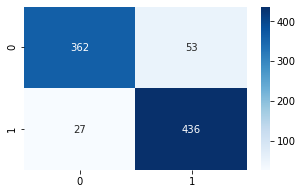

In [49]:
# APPLIED LR HYPERPARAMETER TUNING
print('''\033[1m''' + '''\tLOGISTIC REGRESSION HYPERPARAMETER TUNING''' + '''\033[0m''')

model = LogisticRegression( C = 100, penalty = 'l2' , solver = 'newton-cg') 
model.fit(nx_train, ny_train)
model.fit(nx_test, ny_test)
ny_predict = model.predict(nx_test)

model_train = model.score(nx_train,ny_train)
model_test = model.score(nx_test,ny_test)

score_train['LOG-REG TUINING TRAIN'] = model_train
score_test['LOG-REG TUINING TEST'] = model_test

print('''\n\033[1m''' + '''LOG-REG TUINING TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''LOG-REG TUINING TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\n\t\tLOG-REG TUINING MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',metrics.classification_report(ny_test, ny_predict))

print('''\n\n\033[1m''' + '''LOG-REG TUINING MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',metrics.confusion_matrix(ny_test, ny_predict))
cm2 = metrics.confusion_matrix(ny_test, ny_predict)
plt.figure(figsize = (5,3))
sns.heatmap(cm2, annot=True,cmap='Blues', fmt='g')

In [50]:
def SampleNDrop(df):
    global sample_df
    sample_df = df.sample(n = 200)
#     sample2_df = sig_df.sample(n =100)
    x_diff = sample_df.drop(['Pass/Fail'],axis=1)
    y_diff = sample_df['Pass/Fail']

    return x_diff,y_diff
    

x_diff_n, y_diff_n = SampleNDrop(sd1)



#Creating a user defined function to split the new sample
def SplitTrainTest(par_X,par_y):
#     tr_size = 0.7
#     test_size = 0.3
#     rs = 40
    X_train_,X_test_,y_train_,y_test_ = train_test_split(par_X,par_y,train_size=0.7, test_size=0.3, random_state=40)
    return X_train_,X_test_,y_train_,y_test_
        
X_train_d,X_test_d,y_train_d,y_test_d = SplitTrainTest(x_diff_n, y_diff_n)



#Creating a user defined function to find the train and test accuracies of the new sample
def FindAccuracy(tr_x,tr_y,ts_x,ts_y):
    achieved_score = []

    achieved_score.append(pipe.score(tr_x,tr_y))
    achieved_score.append(pipe.score(ts_x,ts_y))
    
    return achieved_score


In [51]:
pipe= make_pipeline(StandardScaler(),model)
pipe.fit(X_train_d, y_train_d)
pipe.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=100, solver='newton-cg'))])

Checking the achieved train and test accuracies with the different sample population

In [52]:
print('''\n\033[1m''' + '''Checking the achieved test accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved test accuracy of kNN"
Ha = "There is a change in the achieved test accuracy of kNN"

x = grid_result.best_score_                                        
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved test accuracies with the different sample population
No change in the achieved test accuracy of kNN as the p_value (nan) > 0.05


In [53]:
print('''\n\033[1m''' + '''Checking the achieved train accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved train accuracy of kNN"                
Ha = "There is a change in the achieved train accuracy of kNN"        
x = grid_result.best_score_                                           
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  
t, p_value  = stats.ttest_ind(x,y, axis = 0)          

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved train accuracies with the different sample population
No change in the achieved train accuracy of kNN as the p_value (nan) > 0.05


In [54]:
sd1=sd.drop('Time',axis=1)
sd2=sd1

In [55]:
print('''\n\033[1m''' + '''Replacing other columns by their median value:''' + '''\033[0m''')
for x in sd2:
    s = sd2[x].isnull().sum()
    if s!=0:
        median=sd1[x].median()
        #print('Median of',x,median)
        sd2[x].fillna(median,inplace=True)


Replacing other columns by their median value:


In [56]:
print('''\n\033[1m''' + '''Droping all columns, of NaN correlaton with Pass/Fail column''' + '''\033[0m''')        
stdo = [] 
for x in sd2:
    sd2[x]=sd2[x].astype(float)
    att = sd1[x]
    std = np.std(att) 
    if std == 0:
        stdo.append(x)
        sd2=sd2.drop(x,axis=1)
        
print('Which are:',stdo)


Droping all columns, of NaN correlaton with Pass/Fail column
Which are: ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [57]:
sd2=sd2.apply(zscore)

In [58]:
x=sd2.drop('Pass/Fail',axis=1)
y=sd2['Pass/Fail']
x

0         1         2         3         4         6         7  \
0     0.224463  0.849523 -0.436430  0.035804 -0.050121 -0.564354  0.265894   
1     1.107287 -0.383106  1.016977  0.155282 -0.059585  0.197639  0.321868   
2    -1.114000  0.798901 -0.481447  0.688278 -0.047447 -0.906768  0.254699   
3    -0.350156 -0.199072 -0.051705 -1.104376 -0.050831  0.502662 -0.013974   
4     0.242296  0.087328  1.117227 -0.156616 -0.047033 -0.115954  0.187531   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -1.565963 -0.392832 -0.708802  3.843544 -0.047908 -3.039882  0.333062   
1563  0.515516  0.332706 -0.067591 -0.615706 -0.058749 -0.426519 -0.148310   
1564 -0.485064 -1.447412  0.195701 -0.647916 -0.059689 -0.274555 -0.114726   
1565 -1.627087  0.450658 -0.800728 -0.481365 -0.046334 -0.373534 -0.058753   
1566 -0.946420 -0.562403 -0.173894  3.454187 -0.045885 -2.580044  0.187531   

             8         9        10        11        12        14        15  \
0     0.509848  1.128455 -0.381577 -1.515617  0.763117 -0.375756  0.103879   
1     0.457021  0.022620 -1.608281 -0.133006  0.181528  0.411562  0.095954   
2    -0.260885  0.327222  0.124169 -0.229467  0.633530  0.182742  0.210657   
3     0.343240 -0.765369 -0.370817 -0.116929  0.581382  0.214786  0.535203   
4     0.545066 -0.149545 -0.790478 -0.599235  0.610329  0.558822  0.436541   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -1.631679 -0.242250 -0.629070 -0.518851  1.238535  0.989573  0.363740   
1563 -0.400403 -0.348198 -1.016450 -0.205352  1.247938  0.056105 -0.422496   
1564 -0.017068 -0.030354  0.027324  0.116185 -0.129271 -0.013712 -0.050309   
1565 -0.008941 -0.421038  0.328619  0.405569 -0.833225  0.261402 -0.649397   
1566 -0.017068 -0.030354  0.027324  0.116185 -0.129271 -0.013712 -0.050309   

            16        17        18        19        20        21        22  \
0     0.056566 -0.286055  0.845957  0.174249 -0.146683  0.318209  0.735614   
1    -0.269742 -0.111740  0.446647 -0.093702 -1.348004  0.282279 -0.322078   
2    -0.247041 -0.335860  0.956559  0.272774  0.433058  0.272299  0.008186   
3    -0.089594 -0.227950  0.759334 -0.013593 -0.236334  0.239564 -0.173036   
4     0.179609  0.170486  0.560597 -0.035232 -0.971470  0.226789 -0.217071   
...        ...       ...       ...       ...       ...       ...       ...   
1562  0.138372 -0.178146  1.332251  0.258502  0.128246  0.318608 -0.309375   
1563  0.133707 -0.153243  1.347336 -0.364415 -0.606891 -1.262278 -1.428886   
1564 -0.023220  0.095779 -0.137683 -0.118103  1.227962  0.742573  0.025970   
1565 -0.018534  0.211989 -0.959418 -0.402628 -1.091005  0.553346 -0.077344   
1566 -0.023220  0.095779 -0.137683 -0.009910 -0.015195  0.477096 -0.106136   

            23        24        25        26        27        28        29  \
0    -0.172197  0.361844 -1.738184 -0.874376 -2.887917 -1.522835 -0.842542   
1     0.223063 -0.462748  0.526079  0.400176  0.603714 -0.311431 -0.243722   
2    -0.174554 -0.558009  0.610045  0.480463  0.755573 -0.684173 -0.080607   
3    -0.513969 -0.468610  0.618498  0.344715  0.542987 -1.898787  0.681327   
4    -0.131402  0.143217  0.477615  0.278161  0.511055 -1.927707  1.933338   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -1.756499  0.225633  0.438168  0.081670  0.353806  0.475813 -0.352709   
1563  0.094875  0.219771 -0.659024 -0.719613 -1.196796  0.967442 -0.896913   
1564 -0.214442 -0.319899  0.501847  0.026209  0.476227  0.511181 -0.325524   
1565 -0.141555  0.238995  0.470853  0.261259  0.551834  0.292666  1.470691   
1566 -0.105474 -0.043685  0.552565  0.369541  0.563095  1.031730  0.545398   

            30        31        32        33        34        35        36  \
0    -0.636905 -0.287505 -0.958019  0.411164  0.029174 -0.115322 -0.029182   
1     0.791123 -0.478202 -0.213375  0.624843  0.065219 -0.105995 -0.065226   
2    -0.326993 -0.138873 -0.286

In [59]:
print('''\n\033[1m''' + '''Fiting PCA''' + '''\033[0m''')        
pca = PCA()
pca.fit(x)


Fiting PCA


PCA()

In [60]:
print('''\n\033[1m''' + '''Eigen Values''' + '''\033[0m''')        
print(pca.explained_variance_)


Eigen Values
[2.55635884e+01 1.72100540e+01 1.33386388e+01 1.19466473e+01
 9.78901151e+00 9.27933513e+00 8.61370084e+00 8.47404781e+00
 7.61181070e+00 6.86557054e+00 6.27013184e+00 6.16312150e+00
 5.99857396e+00 5.92839190e+00 5.62471343e+00 5.38044737e+00
 5.33836225e+00 5.17333422e+00 4.97850609e+00 4.81947401e+00
 4.73638018e+00 4.61723682e+00 4.49075659e+00 4.43154120e+00
 4.36902753e+00 4.31258355e+00 4.08219537e+00 4.03970683e+00
 3.94127690e+00 3.84716361e+00 3.84417868e+00 3.71282249e+00
 3.66012781e+00 3.56130027e+00 3.55139071e+00 3.49565193e+00
 3.43002042e+00 3.31466495e+00 3.28279911e+00 3.19915991e+00
 3.18623901e+00 3.14285265e+00 3.09721328e+00 3.07818706e+00
 2.97617082e+00 2.92092939e+00 2.87010710e+00 2.83910873e+00
 2.80664545e+00 2.72530237e+00 2.69441167e+00 2.62744228e+00
 2.60971211e+00 2.59877738e+00 2.53870765e+00 2.51235640e+00
 2.46393202e+00 2.42723299e+00 2.39584692e+00 2.37641411e+00
 2.29002450e+00 2.26916179e+00 2.24793196e+00 2.21367545e+00
 2.1996010

In [61]:
print('''\n\033[1m''' + '''Eigen Vectors''' + '''\033[0m''')        
print(pca.components_)


Eigen Vectors
[[-6.09484203e-03 -1.28123954e-04 -4.09665202e-03 ...  3.45318608e-05
   3.30693243e-04  1.53288795e-02]
 [-2.47102738e-02  1.26690738e-02  9.17419155e-03 ...  2.02311575e-02
   1.64807725e-02  1.68932617e-02]
 [-9.55801545e-03 -2.91503461e-03 -7.47617329e-03 ...  3.78052243e-03
   4.04450841e-03 -8.27221547e-03]
 ...
 [ 0.00000000e+00 -9.92016288e-17  1.61874131e-16 ...  8.45835030e-17
  -7.26179190e-17  7.88532900e-17]
 [ 0.00000000e+00 -1.13685586e-16  8.37500564e-17 ...  9.92431377e-17
  -1.24375610e-16 -8.75655594e-18]
 [ 0.00000000e+00  4.02429304e-17  2.29101309e-17 ... -5.73695968e-17
   4.26222758e-17 -2.32159453e-17]]


In [62]:
k = 1
total = []
for i in pca.explained_variance_ratio_*100:
    print('Variance explained by Principle Component',k,'is : {:.2f}%'.format(i))
    k+=1
    total.append(i)
print('\nTotal variance explained by all the principle components:',sum(total),'%')
n=len(total)

Variance explained by Principle Component 1 is : 5.73%
Variance explained by Principle Component 2 is : 3.86%
Variance explained by Principle Component 3 is : 2.99%
Variance explained by Principle Component 4 is : 2.68%
Variance explained by Principle Component 5 is : 2.19%
Variance explained by Principle Component 6 is : 2.08%
Variance explained by Principle Component 7 is : 1.93%
Variance explained by Principle Component 8 is : 1.90%
Variance explained by Principle Component 9 is : 1.71%
Variance explained by Principle Component 10 is : 1.54%
Variance explained by Principle Component 11 is : 1.40%
Variance explained by Principle Component 12 is : 1.38%
Variance explained by Principle Component 13 is : 1.34%
Variance explained by Principle Component 14 is : 1.33%
Variance explained by Principle Component 15 is : 1.26%
Variance explained by Principle Component 16 is : 1.21%
Variance explained by Principle Component 17 is : 1.20%
Variance explained by Principle Component 18 is : 1.16%
V


Graph Visualization


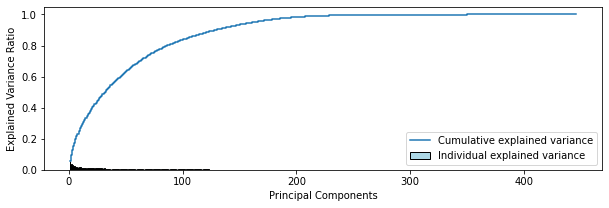

In [63]:
print('''\n\033[1m''' + '''Graph Visualization''' + '''\033[0m''')        

plt.figure(figsize=(10 ,3))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, label = 'Individual explained variance',color='lightblue',edgecolor='black')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_),where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

In [64]:
print('''\n\033[1m''' + '''Selecting Components having percentage more than 0''' + '''\033[0m''')        
n=[]
for s in total:
    if s>1:
        n.append(s)
print('Total Non-Zero Percentage of variance explained by Principle Component',len(n),'\nWhich are:\n',n)


Selecting Components having percentage more than 0
Total Non-Zero Percentage of variance explained by Principle Component 23 
Which are:
 [5.72808849008744, 3.856293984929741, 2.988817618873338, 2.676911079306572, 2.1934449636267894, 2.0792406741628904, 1.930090560270093, 1.898798204800847, 1.705594872489182, 1.5383832271819162, 1.4049619919773928, 1.38098395184282, 1.3441134304432878, 1.3283875849882096, 1.2603416933208036, 1.205608468366907, 1.1961783656239269, 1.1592001770457228, 1.1155446188532157, 1.0799099565682801, 1.061290942277238, 1.0345942312184155, 1.0062535335289227]


In [65]:
n=len(n)
pca2 = PCA(n_components=n)
pca2.fit(x)

PCA(n_components=23)

In [66]:
print('''\n\033[1m''' + '''PCA Dataframe''' + '''\033[0m''')        
pd.DataFrame(pca2.components_)


PCA Dataframe


0         1         2         3         4         5         6    \
0  -0.006095 -0.000128 -0.004097  0.002546  0.001019  0.000458  0.002081   
1  -0.024710  0.012669  0.009174 -0.032670 -0.008608  0.036899  0.007558   
2  -0.009558 -0.002915 -0.007476 -0.024771 -0.020334  0.038391  0.016588   
3   0.010854  0.007781  0.013249  0.035184  0.033649 -0.045515 -0.025413   
4  -0.007996  0.001429 -0.001382 -0.016116  0.003228  0.020745 -0.007479   
5   0.005652 -0.000794 -0.003400  0.020104 -0.010305 -0.029797 -0.004642   
6  -0.004720  0.006791  0.014286 -0.017307  0.001912  0.005853 -0.011250   
7  -0.018904 -0.016001  0.018385 -0.024806 -0.012114  0.021103 -0.001451   
8   0.004575  0.001371  0.054416  0.031756  0.032623 -0.028847 -0.028899   
9   0.005608 -0.000348  0.050497 -0.035992  0.238174 -0.026712 -0.128637   
10 -0.013158 -0.008889  0.010816  0.034775  0.118092 -0.043839 -0.023733   
11 -0.004873 -0.002964 -0.005343 -0.017158  0.152497 -0.023146 -0.071835   
12 -0.023621  0.025101 -0.023930 -0.053934  0.041554  0.041050  0.010824   
13 -0.011875  0.006592  0.020324 -0.030426  0.108808  0.018450 -0.028647   
14  0.054504 -0.035016  0.008861  0.062077 -0.056409 -0.045143  0.016751   
15 -0.019639 -0.006645  0.031679  0.040837 -0.034902 -0.035975 -0.000048   
16 -0.039588  0.031391 -0.023387  0.000020  0.050174 -0.012192 -0.031490   
17 -0.016545  0.020888  0.032085  0.017613 -0.032923 -0.008092  0.010321   
18  0.000398 -0.002638  0.023343  0.055859  0.042304 -0.038309  0.000392   
19 -0.054953  0.044733 -0.014190  0.027088  0.025231 -0.042985 -0.028095   
20  0.014525  0.007542 -0.007199  0.054171 -0.002732 -0.061618  0.062232   
21 -0.003653 -0.025261  0.006462  0.044790  0.021146 -0.042684 -0.020886   
22  0.044439 -0.010362  0.016004  0.026375  0.009738 -0.007457 -0.000907   

         7         8         9         10        11        12        13   \
0  -0.006160 -0.005154  0.000942 -0.000747 -0.004467  0.006399  0.017587   
1   0.036399 -0.018416  0.018525 -0.050985  0.013063  0.002009 -0.002413   
2   0.027680 -0.012058 -0.015430 -0.088068  0.132410  0.001676 -0.005603   
3  -0.028075  0.002808 -0.011834 -0.006563  0.094788  0.001203 -0.000029   
4   0.013996 -0.010908  0.004901  0.002307 -0.021070  0.028138 -0.018952   
5   0.008338  0.002992 -0.011679 -0.020824  0.002922 -0.036815  0.004896   
6   0.002280  0.008645 -0.011470  0.006550 -0.013059  0.013789  0.040814   
7  -0.012439 -0.014098  0.008479 -0.021603 -0.009775  0.011948  0.042838   
8  -0.025820  0.025905 -0.005059 -0.052909  0.029611  0.008970 -0.025919   
9  -0.009127  0.009539 -0.002315 -0.033388 -0.010388 -0.048995  0.007304   
10 -0.038060 -0.004550 -0.010033  0.025080 -0.013281  0.020518 -0.008505   
11  0.007067  0.035926 -0.006662 -0.015853 -0.009177  0.025839  0.004928   
12  0.013694 -0.022072 -0.010600  0.050209  0.009878 -0.014488  0.014035   
13  0.023571  0.005785  0.013102 -0.041688  0.022156 -0.007465  0.000643   
14 -0.018209  0.011571  0.020341  0.035316 -0.020355  0.020981  0.034294   
15  0.036664  0.005219 -0.021678 -0.037091 -0.039203 -0.016151 -0.011799   
16  0.005107  0.023064  0.007678 -0.040645 -0.008801  0.011174 -0.000428   
17  0.031966  0.003715  0.015132  0.064988 -0.006938 -0.014576 -0.005628   
18 -0.017836  0.024401 -0.009064  0.058520 -0.003623 -0.006193 -0.033915   
19  0.038832 -0.009735 -0.003256  0.016519  0.017281 -0.002850 -0.010012   
20 -0.016150  0.007728 -0.004276  0.001579  0.001454 -0.017372  0.007934   
21 -0.026534  0.014264 -0.001348 -0.001870  0.009342 -0.025141  0.001398   
22  0.004521 -0.001786 -0.000461  0.065544  0.018068 -0.001078 -0.000268   

         14        15        16        17        18        19        20   \
0   0.002433  0.002221 -0.007407  0.003093 -0.000899 -0.007197  0.008009   
1   0.027093 -0.032166 -0.008015  0.001549 -0.002405  0.095094 -0.088986   
2   0.199665 -0.045203 -0.017434  0.001603 -0.026183 -0.123932  0.120041   
3   0.173727  0.024465 -0.039179 -0.005139  0.034373  0

In [67]:
print('''\n\033[1m''' + '''Variance Percentage of selected component''' + '''\033[0m''')        
pca2.explained_variance_


Variance Percentage of selected component


array([25.56358838, 17.21005398, 13.33863878, 11.94664722,  9.78900909,
        9.279333  ,  8.61368173,  8.47403682,  7.61176772,  6.86545467,
        6.26965256,  6.16216624,  5.99758684,  5.92749399,  5.62402098,
        5.37670994,  5.33355564,  5.16471791,  4.9672043 ,  4.80401532,
        4.71908118,  4.60170061,  4.46807018])

In [68]:
print('''\n\033[1m''' + '''Total sum variance Percentage of selected component''' + '''\033[0m''')        

sum(pca2.explained_variance_ratio_*100)


Total sum variance Percentage of selected component


42.14980797242


Graph Visualization of selected components


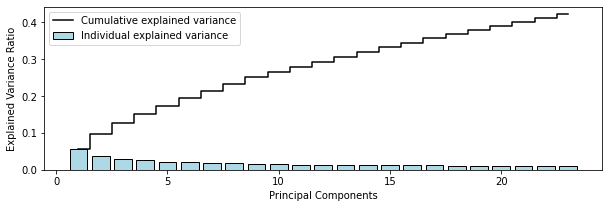

In [69]:
print('''\n\033[1m''' + '''Graph Visualization of selected components''' + '''\033[0m''')        
plt.figure(figsize=(10 , 3))
plt.bar(range(1, n+1), pca2.explained_variance_ratio_, label = 'Individual explained variance',color='lightblue',edgecolor='black')
plt.step(range(1, n+1), np.cumsum(pca2.explained_variance_ratio_),where='mid', label = 'Cumulative explained variance',color = 'black')
plt.ylabel('Explained Variance Ratio')  # x axis label
plt.xlabel('Principal Components')      # y axis label
plt.legend()

In [70]:
pca_transformed =  pca2.transform(x)
print('''\n\033[1m''' + '''Spliting dataset''' + '''\033[0m''')        
px_train, px_test, py_train, py_test = train_test_split(pca_transformed, y, test_size = 0.3, random_state = 202)

print('   shape of pca_x_train:',px_train.shape)
print('   shape of pca_x_test:',px_test.shape)


Spliting dataset
   shape of pca_x_train: (1096, 23)
   shape of pca_x_test: (471, 23)


In [71]:
y[y < 0] = -1
y[y > 0] = 1
y.value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

new random picked points


1359

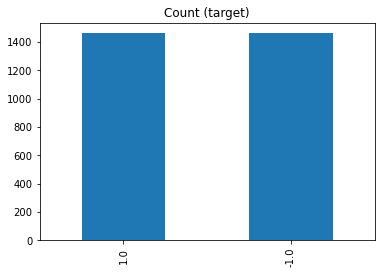

In [72]:
# RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

balpc = RandomOverSampler()
xupp, yupp= balpc.fit_sample(x, y)
rn=xupp.shape[0] - x.shape[0]
print('new random picked points')

yupp.value_counts().plot(kind='bar', title='Count (target)');
rn

In [73]:
nsdp = pd.concat([xupp,yupp], axis=1)
nsdp.head(5)

0         1         2         3         4         6         7  \
0  0.224463  0.849523 -0.436430  0.035804 -0.050121 -0.564354  0.265894   
1  1.107287 -0.383106  1.016977  0.155282 -0.059585  0.197639  0.321868   
2 -1.114000  0.798901 -0.481447  0.688278 -0.047447 -0.906768  0.254699   
3 -0.350156 -0.199072 -0.051705 -1.104376 -0.050831  0.502662 -0.013974   
4  0.242296  0.087328  1.117227 -0.156616 -0.047033 -0.115954  0.187531   

          8         9        10        11        12        14        15  \
0  0.509848  1.128455 -0.381577 -1.515617  0.763117 -0.375756  0.103879   
1  0.457021  0.022620 -1.608281 -0.133006  0.181528  0.411562  0.095954   
2 -0.260885  0.327222  0.124169 -0.229467  0.633530  0.182742  0.210657   
3  0.343240 -0.765369 -0.370817 -0.116929  0.581382  0.214786  0.535203   
4  0.545066 -0.149545 -0.790478 -0.599235  0.610329  0.558822  0.436541   

         16        17        18        19        20        21        22  \
0  0.056566 -0.286055  0.845957  0.174249 -0.146683  0.318209  0.735614   
1 -0.269742 -0.111740  0.446647 -0.093702 -1.348004  0.282279 -0.322078   
2 -0.247041 -0.335860  0.956559  0.272774  0.433058  0.272299  0.008186   
3 -0.089594 -0.227950  0.759334 -0.013593 -0.236334  0.239564 -0.173036   
4  0.179609  0.170486  0.560597 -0.035232 -0.971470  0.226789 -0.217071   

         23        24        25        26        27        28        29  \
0 -0.172197  0.361844 -1.738184 -0.874376 -2.887917 -1.522835 -0.842542   
1  0.223063 -0.462748  0.526079  0.400176  0.603714 -0.311431 -0.243722   
2 -0.174554 -0.558009  0.610045  0.480463  0.755573 -0.684173 -0.080607   
3 -0.513969 -0.468610  0.618498  0.344715  0.542987 -1.898787  0.681327   
4 -0.131402  0.143217  0.477615  0.278161  0.511055 -1.927707  1.933338   

         30        31        32        33        34        35        36  \
0 -0.636905 -0.287505 -0.958019  0.411164  0.029174 -0.115322 -0.029182   
1  0.791123 -0.478202 -0.213375  0.624843  0.065219 -0.105995 -0.065226   
2 -0.326993 -0.138873 -0.286600 -0.224141 -0.363423 -0.172607  0.363415   
3  0.696934 -0.545133 -0.210758 -0.209330 -0.061360 -0.172179  0.061352   
4  2.595907 -0.747983  0.488609 -0.143239 -0.283042 -0.157178  0.283034   

         37        38        39        40        41        43        44  \
0  0.305382  0.266386 -0.645694 -0.283379  0.498003 -0.452655  0.874271   
1 -4.283580  1.539930 -0.310382  0.426118 -0.245879 -0.528535  0.035059   
2 -1.258050 -4.712218 -0.036862 -2.246208  0.890441  1.418810 -0.873898   
3 -3.376184 -0.335669 -0.905372  0.369643 -0.883858  1.202003 -0.575486   
4 -0.220697 -1.544931  1.526523  0.348307 -0.486722 -0.352717  2.160530   

         45        46        47        48        50        51        53  \
0 -0.812538 -0.852081  0.681680  0.277780 -0.919041  0.999838 -0.017844   
1 -0.455129 -0.727337  0.584067  1.298778 -0.114815  0.783909 -0.054299   
2 -0.629779  0.092064  0.639469  0.245998  0.580178  0.465101 -1.949961   
3 -0.629779  0.016866  0.657936  0.568511  0.592588  0.533265 -1.949961   
4  5.044562  4.610846 -0.759292 -0.416700  4.108142  1.249991  0.565437   

         54        55        56        57        58        59        60  \
0  0.041453 -0.862229  0.418572 -0.195538  1.323374 -0.491928 -0.702824   
1  0.058263 -0.123172  0.521553 -0.315462  1.044437 -0.225470 -0.523124   
2 -1.521941  3.105340 -2.200093 -1.082980 -0.070136  2.195150  1.559854   
3 -1.521941  3.105340 -2.200093 -1.082980 -0.070136  2.253475  1.048099   
4  0.932419  0.343601  0.139051 -1.035010  0.566594 -1.603330 -0.012134   

         61        62        63        64        65        66        67  \
0  0.728880 -0.912747  0.303850  0.239003  0.339085 -1.111942 -0.051277   
1 -0.415640 -0.292833 -0.434113 -0.271323  0.070691 -0.816696 -0.050504   
2 -0.928650 -0.101503 -0.378029 -0.879033 -0.400497  0.331273 -0.051450   
3 -0.772960 -0.037099 -0.060112 -0.990738 -0.514423  0.322201 -0.051103   
4 -2.291208  3.196132  1.12

In [74]:
nxp = nsdp.drop('Pass/Fail',axis=1)
nyp=nsdp['Pass/Fail']
print('''\n\033[1m''' + '''Spliting New dataset in Train and Test sets''' + '''\033[0m''')
nxp_train,nxp_test,nyp_train, nyp_test = train_test_split(nx, ny,train_size=0.7, test_size=0.3,random_state=202)

print('New X_Train',len(nxp_train),'\nNew X_Test',len(nxp_test))
print('New Y_Train',len(nyp_train),'\nNew Y_Test',len(nyp_test))


Spliting New dataset in Train and Test sets
New X_Train 2048 
New X_Test 878
New Y_Train 2048 
New Y_Test 878



		LOGISTIC REGRESSION

WITH PCA AND IMBALANCE TARGET SET

LOG-REG PCA TRAIN SCORE 0.8193359375

LOG-REG PCA TEST SCORE 0.907744874715262
		LOG-REG PCA MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90       415
         1.0       0.89      0.94      0.92       463

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878



LOG-REG PCA MODEL CONFUSION METRICS WITH HEATMAP
 [[361  54]
 [ 27 436]]


<AxesSubplot:>

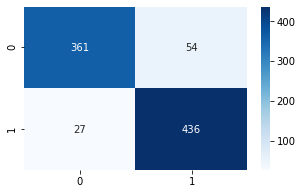

In [75]:
print('''\n\033[1m''' + '''\t\tLOGISTIC REGRESSION''' + '''\033[0m''')
print('''\n\033[1m''' + '''WITH PCA AND IMBALANCE TARGET SET''' + '''\033[0m''')

model = LogisticRegression()
model.fit(nxp_train, nyp_train)
model.fit(nxp_test, nyp_test)

nyp_pred = model.predict(nxp_test)

model_train = model.score(nxp_train,nyp_train)
model_test = model.score(nxp_test,nyp_test)

score_train['LOG-REG PCA TRAIN'] = model_train
score_test['LOG-REG PCA TEST'] = model_test

print('''\n\033[1m''' + '''LOG-REG PCA TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''LOG-REG PCA TEST SCORE''' + '''\033[0m''',model_test)


print('''\033[1m''' + '''\t\tLOG-REG PCA MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',metrics.classification_report(nyp_test, nyp_pred))
print('''\n\n\033[1m''' + '''LOG-REG PCA MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',metrics.confusion_matrix(nyp_test, nyp_pred))
cm3 = metrics.confusion_matrix(nyp_test, nyp_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm3, annot=True,cmap='Blues', fmt='g')

In [76]:

print('''\033[1m''' + '''\t\tLOG-REG PCA MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',metrics.classification_report(nyp_test, nyp_pred))
print('''\n\033[1m''' + '''LOG-REG PCA TRAIN SCORE''' + '''\033[0m''',model.score(nxp_train,nyp_train))
print('''\n\033[1m''' + '''LOG-REG PCA TEST SCORE''' + '''\033[0m''',model.score(nxp_test,nyp_test))
print('=====================================================================')
print('''\033[1m''' + '''\n\t\tLOG-REG TUINING MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',metrics.classification_report(ny_test, ny_predict))
print('''\n\033[1m''' + '''LOG-REG TUINING TRAIN SCORE''' + '''\033[0m''',model.score(nx_train,ny_train))
print('''\n\033[1m''' + '''LOG-REG TUINING TEST SCORE''' + '''\033[0m''',model.score(nx_test,ny_test))



		LOG-REG PCA MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90       415
         1.0       0.89      0.94      0.92       463

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878


LOG-REG PCA TRAIN SCORE 0.8193359375

LOG-REG PCA TEST SCORE 0.907744874715262

		LOG-REG TUINING MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90       415
         1.0       0.89      0.94      0.92       463

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878


LOG-REG TUINING TRAIN SCORE 0.8193359375

LOG-REG TUINING TEST SCORE 0.907744874715262


In [77]:
acc_arr = []   #Array for Accuracy values
mis_arr = []   #Array for Misclassification values
sen_arr = []   #Array for Sensitivity values
spec_arr = []  #Array for Specificity values
prec_arr = []  #Array for Precision values

In [78]:
#User defined function to find the confusion matrix values

def ConfusionMatrix(matrix):
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if i == 0:
                if j == 0:
                    tn = matrix[i][j]
                else:
                    fp = matrix[i][j]
            if i == 1:
                if j == 0:
                    fn = matrix[i][j]
                else:
                    tp = matrix[i][j]
        j = 0
    return tp,tn,fp,fn

In [79]:
TP,TN,FP,FN = ConfusionMatrix(cm1)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of logistic regression classifier on test set: 90.77%
Misclassification Rate: It is often wrong: 9.23%
Sensitivity: When its actually yes how often it predicts yes: 94.17%
Specificity: When its actually no, how often does it predict no: 86.99%
Precision: When it predicts yes, how often is it correct: 88.98%


In [80]:
TP,TN,FP,FN = ConfusionMatrix(cm2)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier test set after tuning: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of logistic regression classifier test set after tuning: 90.89%
Misclassification Rate: It is often wrong: 9.11%
Sensitivity: When its actually yes how often it predicts yes: 94.17%
Specificity: When its actually no, how often does it predict no: 87.23%
Precision: When it predicts yes, how often is it correct: 89.16%


In [81]:
TP,TN,FP,FN = ConfusionMatrix(cm3)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier test set after pca: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of logistic regression classifier test set after pca: 90.77%
Misclassification Rate: It is often wrong: 9.23%
Sensitivity: When its actually yes how often it predicts yes: 94.17%
Specificity: When its actually no, how often does it predict no: 86.99%
Precision: When it predicts yes, how often is it correct: 88.98%


## Using other models with tuning
1. KNeighborsClassifier
2. SVM
3. DecisionTreeClassifier
4. RandomForestClassifier


### 1. KNeighborsClassifier

In [82]:
print('''\n\033[1m''' + '''\t\t k-Nearest Neighbours''' + '''\033[0m''')

print('Creating odd list of K for KNN')
myList = list(range(1,50))

print('Subsetting just the odd ones')
neighbors = list(filter(lambda x: x % 2 != 0, myList))


		 k-Nearest Neighbours
Creating odd list of K for KNN
Subsetting just the odd ones


In [83]:
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nx_train, ny_train)
    
    y_Pred = knn.predict(nx_test)
    
    scores = accuracy_score(ny_test, y_Pred)
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1



kNN TRAIN SCORE 1.0

kNN TEST SCORE 0.9738041002277904
		kNN MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       1.00      0.94      0.97       415
         1.0       0.95      1.00      0.98       463

    accuracy                           0.97       878
   macro avg       0.98      0.97      0.97       878
weighted avg       0.98      0.97      0.97       878



kNN MODEL CONFUSION METRICS WITH HEATMAP
 [[392  23]
 [  0 463]]


<AxesSubplot:>

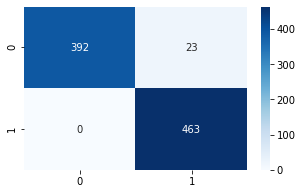

In [84]:
knn = KNeighborsClassifier(n_neighbors= optimal_k , weights = 'distance' )
knn.fit(nx_train, ny_train)
y_pred = knn.predict(nx_test)

model_train = knn.score(nx_train,ny_train)
model_test = knn.score(nx_test,ny_test)

score_train['kNN TRAIN'] = model_train
score_test['kNN TEST'] = model_test

print('''\n\033[1m''' + '''kNN TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''kNN TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\t\tkNN MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',classification_report(ny_test, y_pred))

print('''\n\n\033[1m''' + '''kNN MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',confusion_matrix(ny_test, y_pred))
cm4 = metrics.confusion_matrix(ny_test, y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm4, annot=True,cmap='Blues', fmt='g')

### 1. KNeighborsClassifier Tuning

In [85]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

randomCV = RandomizedSearchCV(model, param_distributions=grid, n_iter=10,cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)

#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
 #                          scoring='accuracy',error_score=0, iid=True)
grid_result =randomCV.fit(nx, ny)

# summarize results
print(f"Best model score of Random Forest using {grid_result.best_params_} is  {grid_result.best_score_:.3f}")

Best model score of Random Forest using {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'} is  0.931


In [86]:
pipe= make_pipeline(StandardScaler(),(KNeighborsClassifier(weights='uniform', n_neighbors=2)))
pipe.fit(X_train_d, y_train_d)
pipe.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [87]:
print('''\n\033[1m''' + '''Checking the achieved test accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved test accuracy of kNN"
Ha = "There is a change in the achieved test accuracy of kNN"

x = grid_result.best_score_                                        
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved test accuracies with the different sample population
No change in the achieved test accuracy of kNN as the p_value (nan) > 0.05


In [88]:
print('''\n\033[1m''' + '''Checking the achieved train accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved train accuracy of kNN"                
Ha = "There is a change in the achieved train accuracy of kNN"        
x = grid_result.best_score_                                           
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  
t, p_value  = stats.ttest_ind(x,y, axis = 0)          

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved train accuracies with the different sample population
No change in the achieved train accuracy of kNN as the p_value (nan) > 0.05


In [89]:
TP,TN,FP,FN = ConfusionMatrix(cm4)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of kNN classifier test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of kNN classifier test set: 97.38%
Misclassification Rate: It is often wrong: 2.62%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 94.46%
Precision: When it predicts yes, how often is it correct: 95.27%


### 2. SVM


SVM TRAIN SCORE 1.0

SVM TEST SCORE 1.0
		SVM MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



SVM MODEL CONFUSION METRICS WITH HEATMAP
 [[415   0]
 [  0 463]]


<AxesSubplot:>

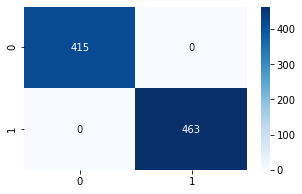

In [90]:
svm =SVC(gamma=0.025, C=3) 
svm.fit(nx_train, ny_train)
svm.score(nx_test, ny_test)

y_pred = svm.predict(nx_test)

model_train = svm.score(nx_train,ny_train)
model_test = svm.score(nx_test,ny_test)

score_train['SVM TRAIN'] = model_train
score_test['SVM TEST'] = model_test

print('''\n\033[1m''' + '''SVM TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''SVM TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\t\tSVM MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',classification_report(ny_test, y_pred))

print('''\n\n\033[1m''' + '''SVM MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',confusion_matrix(ny_test, y_pred))
cm5 = metrics.confusion_matrix(ny_test, y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm5, annot=True,cmap='Blues', fmt='g')

### 2. SVM Tuning

In [91]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [0.001, 0.01, 0.1, 1, 10]

# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

randomCV = RandomizedSearchCV(model, param_distributions=grid, n_iter=10,cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)

grid_result =randomCV.fit(nx, ny)

# summarize results
print(f"Best model score of Random Forest using {grid_result.best_params_} is  {grid_result.best_score_:.3f}")

Best model score of Random Forest using {'kernel': 'rbf', 'gamma': 10, 'C': 50} is  1.000


In [92]:
pipe= make_pipeline(StandardScaler(),(SVC(gamma=0.025, C=3) ))
pipe.fit(X_train_d, y_train_d)
pipe.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=3, gamma=0.025))])

In [93]:
print('''\n\033[1m''' + '''Checking the achieved train accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved test accuracy of SVM"
Ha = "There is a change in the achieved test accuracy of SVM"

x = grid_result.best_score_
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved train accuracies with the different sample population
No change in the achieved test accuracy of SVM as the p_value (nan) > 0.05


In [94]:
print('''\n\033[1m''' + '''Checking the achieved train accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved train accuracy of SVM"                
Ha = "There is a change in the achieved train accuracy of SVM"  

x = grid_result.best_score_                                           
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)          

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved train accuracies with the different sample population
No change in the achieved train accuracy of SVM as the p_value (nan) > 0.05


In [95]:
TP,TN,FP,FN = ConfusionMatrix(cm5)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of SVM classifier test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of SVM classifier test set: 100.00%
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


### 3. DecisionTree Classifier


SVM TRAIN SCORE 0.9091796875

SVM TEST SCORE 1.0
		SVM MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



SVM MODEL CONFUSION METRICS WITH HEATMAP
 [[415   0]
 [  0 463]]


<AxesSubplot:>

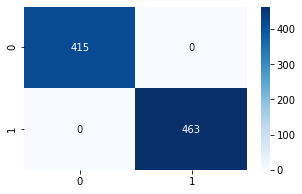

In [96]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(nx_train, ny_train)
dTree.fit(nx_test, ny_test)

y_pred = dTree.predict(nx_test)

model_train = dTree.score(nx_train,ny_train)
model_test = dTree.score(nx_test,ny_test)

score_train['DTREEE TRAIN'] = model_train
score_test['DTREE TEST'] = model_test

print('''\n\033[1m''' + '''SVM TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''SVM TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\t\tSVM MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',classification_report(ny_test, y_pred))

print('''\n\n\033[1m''' + '''SVM MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',confusion_matrix(ny_test, y_pred))
cm6 = metrics.confusion_matrix(ny_test, y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm6, annot=True,cmap='Blues', fmt='g')

### 3. DecisionTree Classifier Tuning

In [97]:
param_grid ={"max_depth": [5, None],
             "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

randomCV = RandomizedSearchCV(dTree, param_distributions= param_grid, n_iter=10,cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)

grid_result =randomCV.fit(nx, ny)

print(f"Best model score of Random Forest using {grid_result.best_params_} is  {grid_result.best_score_:.3f}")

Best model score of Random Forest using {'min_samples_leaf': 1, 'max_features': 1, 'max_depth': None, 'criterion': 'gini'} is  0.964


In [98]:
pipe= make_pipeline(StandardScaler(),( DecisionTreeClassifier(criterion = 'gini', random_state=1)))
pipe.fit(X_train_d, y_train_d)
pipe.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [99]:
print('''\n\033[1m''' + '''Checking the achieved test accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved test accuracy of Decision Tree"
Ha = "There is a change in the achieved test accuracy of Decision Tree"

x = grid_result.best_score_
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved test accuracies with the different sample population
No change in the achieved test accuracy of Decision Tree as the p_value (nan) > 0.05


In [100]:
print('''\n\033[1m''' + '''Checking the achieved train accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved train accuracy of Decision Tree"                
Ha = "There is a change in the achieved train accuracy of Decision Tree"  

x = grid_result.best_score_                                           
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)          

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved train accuracies with the different sample population
No change in the achieved train accuracy of Decision Tree as the p_value (nan) > 0.05


In [101]:
TP,TN,FP,FN = ConfusionMatrix(cm6)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Decision Tree classifier test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Decision Tree classifier test set: 100.00%
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


### 4. RandomForest Classifier


RNDM FRST TRAIN SCORE 1.0

RNDM FRST TEST SCORE 0.9988610478359908
		RANDOM FOREST MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



RANDOM FOREST MODEL CONFUSION METRICS WITH HEATMAP
 [[415   0]
 [  0 463]]


<AxesSubplot:>

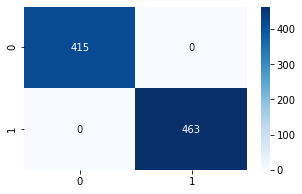

In [102]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(nx_train, ny_train)
y_predict = rfcl.predict(nx_test)

model_train = rfcl.score(nx_train,ny_train)
model_test = rfcl.score(nx_test,ny_test)

score_train['RNDM FRST TRAIN'] = model_train
score_test['RNDM FRST TEST'] = model_test

print('''\n\033[1m''' + '''RNDM FRST TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''RNDM FRST TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\t\tRANDOM FOREST MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',classification_report(ny_test, y_pred))

print('''\n\n\033[1m''' + '''RANDOM FOREST MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',confusion_matrix(ny_test, y_pred))
cm7 = metrics.confusion_matrix(ny_test, y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm7, annot=True,cmap='Blues', fmt='g')


### 4. RandomForest Classifier Tuning

In [103]:
# define models and parameters
model = RandomForestClassifier()
grid = {'n_estimators': [6, 25],
              'max_features': [5, 6], 
              'max_depth': [10, 50, None], 
              'bootstrap': [True, False]}


# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

randomCV = RandomizedSearchCV(model, param_distributions=grid, n_iter=10,cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)

grid_result =randomCV.fit(nx, ny)
# summarize results
print(f"Best model score of Random Forest using {grid_result.best_params_} is  {grid_result.best_score_:.3f}")

Best model score of Random Forest using {'n_estimators': 25, 'max_features': 5, 'max_depth': None, 'bootstrap': True} is  1.000



RNDM FRST TRAIN SCORE 1.0

RNDM FRST TEST SCORE 1.0
		RANDOM FOREST MODEL CLASSIFICATION REPORT
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



RANDOM FOREST MODEL CONFUSION METRICS WITH HEATMAP
 [[415   0]
 [  0 463]]


<AxesSubplot:>

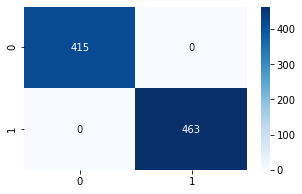

In [104]:
rfcl = RandomForestClassifier(n_estimators= 25, max_features= 6, max_depth = 50, bootstrap =  False)
rfcl = rfcl.fit(nx_train, ny_train)
y_predict = rfcl.predict(nx_test)

model_train = rfcl.score(nx_train,ny_train)
model_test = rfcl.score(nx_test,ny_test)

score_train['RNDM FRST TRAIN'] = model_train
score_test['RNDM FRST TEST'] = model_test

print('''\n\033[1m''' + '''RNDM FRST TRAIN SCORE''' + '''\033[0m''',model_train)
print('''\n\033[1m''' + '''RNDM FRST TEST SCORE''' + '''\033[0m''',model_test)

print('''\033[1m''' + '''\t\tRANDOM FOREST MODEL CLASSIFICATION REPORT\n''' + '''\033[0m''',classification_report(ny_test, y_pred))

print('''\n\n\033[1m''' + '''RANDOM FOREST MODEL CONFUSION METRICS WITH HEATMAP\n''' + '''\033[0m''',confusion_matrix(ny_test, y_pred))
cm8 = metrics.confusion_matrix(ny_test, y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm8, annot=True,cmap='Blues', fmt='g')


In [105]:
pipe= make_pipeline(StandardScaler(),( RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)))
pipe.fit(X_train_d, y_train_d)
pipe.fit(X_test_d, y_test_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=12, n_estimators=50,
                                        random_state=1))])

In [106]:
print('''\n\033[1m''' + '''Checking the achieved test accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved test accuracy of Random Forest"
Ha = "There is a change in the achieved test accuracy of Random Forest"

x = grid_result.best_score_
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved test accuracies with the different sample population
No change in the achieved test accuracy of Random Forest as the p_value (nan) > 0.05


In [107]:
print('''\n\033[1m''' + '''Checking the achieved train accuracies with the different sample population''' + '''\033[0m''')
Ho = "No change in the achieved train accuracy of Random Forest"                
Ha = "There is a change in the achieved train accuracy of Random Forest"        
x = grid_result.best_score_                                          
y = FindAccuracy(X_train_d,y_train_d,X_test_d,y_test_d)  

t, p_value  = stats.ttest_ind(x,y, axis = 0)          

if p_value < 0.05:                                       
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Checking the achieved train accuracies with the different sample population
No change in the achieved train accuracy of Random Forest as the p_value (nan) > 0.05


In [108]:
TP,TN,FP,FN = ConfusionMatrix(cm7)

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Random Forest classifier test set: {:.2%}'.format(Accuracy))
acc_arr.append(Accuracy)

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
mis_arr.append(Misclassification_Rate)

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
sen_arr.append(Sensitivity)

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
spec_arr.append(Specificity)

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
prec_arr.append(Precision)

Accuracy of Random Forest classifier test set: 100.00%
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


### Using models with CrossValidation

In [109]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=optimal_k))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())

for classifier in clfs:
    kfold = KFold(n_splits = 25, random_state = 56)
    
    model_train= cross_val_score(classifier,nx_train,ny_train,cv = kfold)
    model_test= cross_val_score(classifier,nx_test,ny_test,cv = kfold)

    score_train['CV SCORE OF TRAIN',str(classifier)] = model_train.mean()
    score_test['CV SCORE OF TEST',str(classifier)] = model_test.mean()
    print('===========================================================')
    
    print('KFOLD TRAIN SCORE(OVERALL)',str(classifier),'{:.2f}% WITH STD+/-({:.2f}%)'.format(model_train.mean(),model_train.std()))
    print('KFOLD TEST SCORE(OVERALL)',str(classifier),'{:.2f}% WITH STD+/-({:.2f}%)'.format(model_test.mean(),model_test.std()))
    
    

KFOLD TRAIN SCORE(OVERALL) LogisticRegression() 0.83% WITH STD+/-(0.04%)
KFOLD TEST SCORE(OVERALL) LogisticRegression() 0.83% WITH STD+/-(0.06%)
KFOLD TRAIN SCORE(OVERALL) SVC() 0.98% WITH STD+/-(0.01%)
KFOLD TEST SCORE(OVERALL) SVC() 0.94% WITH STD+/-(0.04%)
KFOLD TRAIN SCORE(OVERALL) KNeighborsClassifier(n_neighbors=1) 0.96% WITH STD+/-(0.03%)
KFOLD TEST SCORE(OVERALL) KNeighborsClassifier(n_neighbors=1) 0.89% WITH STD+/-(0.05%)
KFOLD TRAIN SCORE(OVERALL) DecisionTreeClassifier() 0.96% WITH STD+/-(0.02%)
KFOLD TEST SCORE(OVERALL) DecisionTreeClassifier() 0.91% WITH STD+/-(0.04%)
KFOLD TRAIN SCORE(OVERALL) RandomForestClassifier() 1.00% WITH STD+/-(0.00%)
KFOLD TEST SCORE(OVERALL) RandomForestClassifier() 0.98% WITH STD+/-(0.02%)


### Using models with PCA

PCA WITH LogisticRegression()
PCA TRAIN SCORE OF ('LogisticRegression()', ' 0.82')
PCA TRAIN SCORE OF ('LogisticRegression()', ' 0.91')
LogisticRegression() PCA CLASSIFICATION REPORT OF
               precision    recall  f1-score   support

        -1.0       0.93      0.87      0.90       415
         1.0       0.89      0.94      0.92       463

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878

LogisticRegression() PCA CONFUSION METRICS WITH HEATMAP OF
 [[361  54]
 [ 27 436]] 




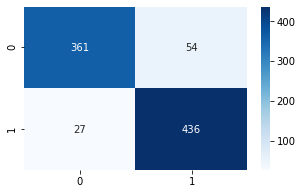

Accuracy of ('LogisticRegression()', 'test set after PCA: 90.77%')
Misclassification Rate: It is often wrong: 9.23%
Sensitivity: When its actually yes how often it predicts yes: 94.17%
Specificity: When its actually no, how often does it predict no: 86.99%
Precision: When it predicts yes, how often is it correct: 88.98%
PCA WITH SVC()
PCA TRAIN SCORE OF ('SVC()', ' 0.93')
PCA TRAIN SCORE OF ('SVC()', ' 0.99')
SVC() PCA CLASSIFICATION REPORT OF
               precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       415
         1.0       0.99      0.99      0.99       463

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878

SVC() PCA CONFUSION METRICS WITH HEATMAP OF
 [[411   4]
 [  5 458]] 




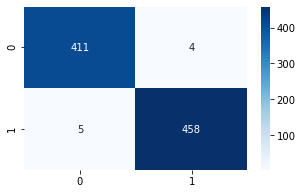

Accuracy of ('SVC()', 'test set after PCA: 98.97%')
Misclassification Rate: It is often wrong: 1.03%
Sensitivity: When its actually yes how often it predicts yes: 98.92%
Specificity: When its actually no, how often does it predict no: 99.04%
Precision: When it predicts yes, how often is it correct: 99.13%
PCA WITH KNeighborsClassifier(n_neighbors=1)
PCA TRAIN SCORE OF ('KNeighborsClassifier(n_neighbors=1)', ' 0.88')
PCA TRAIN SCORE OF ('KNeighborsClassifier(n_neighbors=1)', ' 1.00')
KNeighborsClassifier(n_neighbors=1) PCA CLASSIFICATION REPORT OF
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878

KNeighborsClassifier(n_neighbors=1) PCA CONFUSION METRICS WITH HEATMAP OF
 [[415   0]
 [  0 463]] 




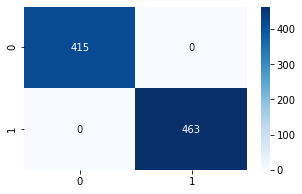

Accuracy of ('KNeighborsClassifier(n_neighbors=1)', 'test set after PCA: 100.00%')
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%
PCA WITH DecisionTreeClassifier()
PCA TRAIN SCORE OF ('DecisionTreeClassifier()', ' 0.96')
PCA TRAIN SCORE OF ('DecisionTreeClassifier()', ' 1.00')
DecisionTreeClassifier() PCA CLASSIFICATION REPORT OF
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878

DecisionTreeClassifier() PCA CONFUSION METRICS WITH HEATMAP OF
 [[415   0]
 [  0 463]] 




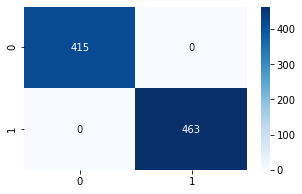

Accuracy of ('DecisionTreeClassifier()', 'test set after PCA: 100.00%')
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%
PCA WITH RandomForestClassifier()
PCA TRAIN SCORE OF ('RandomForestClassifier()', ' 1.00')
PCA TRAIN SCORE OF ('RandomForestClassifier()', ' 1.00')
RandomForestClassifier() PCA CLASSIFICATION REPORT OF
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       415
         1.0       1.00      1.00      1.00       463

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878

RandomForestClassifier() PCA CONFUSION METRICS WITH HEATMAP OF
 [[415   0]
 [  0 463]] 




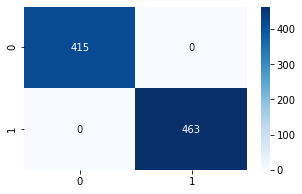

Accuracy of ('RandomForestClassifier()', 'test set after PCA: 100.00%')
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


In [111]:
for classifier in clfs:
    print('PCA WITH',str(classifier))
    pipe= Pipeline([('pca', PCA()), (str(classifier), classifier)])
    pipe.fit(nx_train,ny_train)
    pipe.fit(nx_test,ny_test)
    
    model_train = pipe.score(nx_train,ny_train)
    model_test =  pipe.score(nx_test,ny_test)
    
    score_train['PCA TRAIN',str(classifier)] = model_train
    score_test['PCA TEST',str(classifier)] = model_test
    
    print('PCA TRAIN SCORE OF',(str(classifier)," {:.2f}". format( pipe.score( nx_train, ny_train))))
    print('PCA TRAIN SCORE OF',(str(classifier)," {:.2f}". format( pipe.score( nx_test, ny_test))))
    
    y_pred = pipe.predict(nx_test)
    print((str(classifier)),'PCA CLASSIFICATION REPORT OF\n',classification_report(ny_test, y_pred))
    
    print((str(classifier)),'PCA CONFUSION METRICS WITH HEATMAP OF\n',confusion_matrix(ny_test, y_pred),'\n\n')
    cm = metrics.confusion_matrix(ny_test, y_pred)
    plt.figure(figsize = (5,3))
    sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
    plt.show()
    print('==========================================================')
    TP,TN,FP,FN = ConfusionMatrix(cm)

    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    print('Accuracy of',(str(classifier),'test set after PCA: {:.2%}'.format(Accuracy)))
    acc_arr.append(Accuracy)

    Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
    print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))
    mis_arr.append(Misclassification_Rate)

    #Recall
    Sensitivity=TP/(FN+TP)
    print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))
    sen_arr.append(Sensitivity)

    Specificity=TN/(TN+FP)
    print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))
    spec_arr.append(Specificity)

    Precision=TP/(FP+TP)
    print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))
    prec_arr.append(Precision)
        


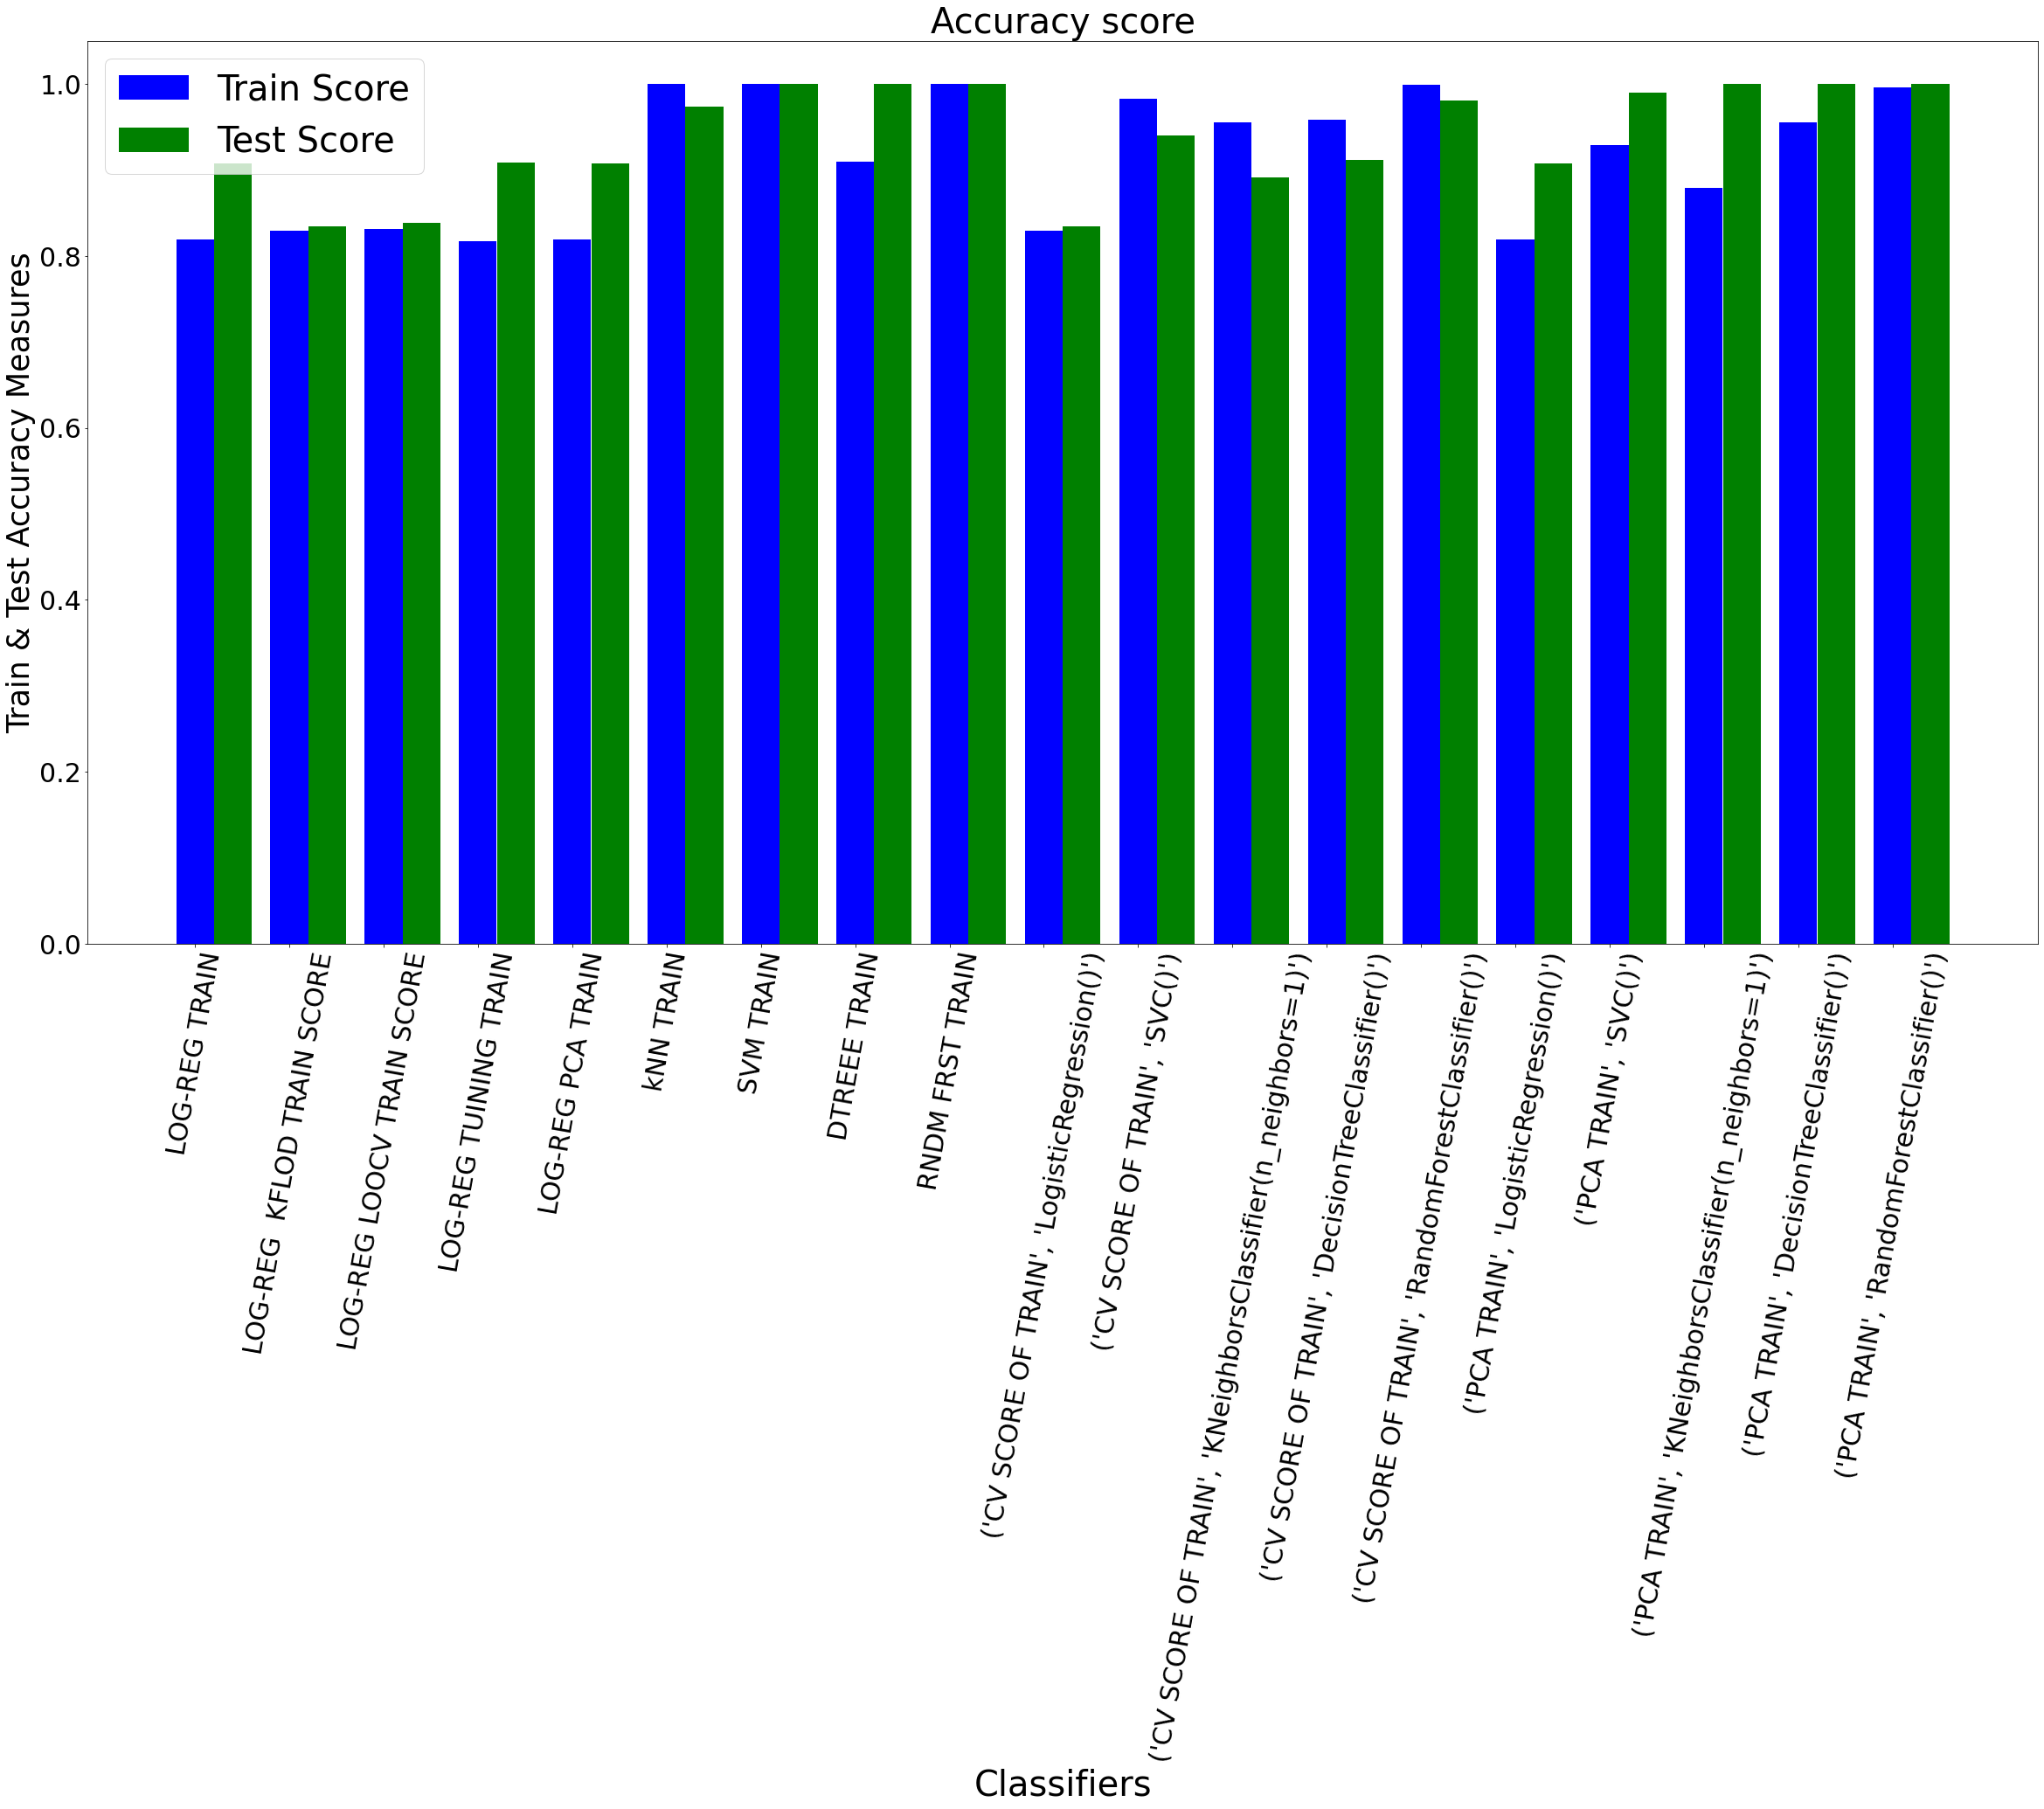

In [112]:
import numpy as np
import matplotlib.pyplot as plt

w=.4
X = np.arange(len(score_train))
ig, ax = plt.subplots(figsize=(40,19))
ax.bar(X, score_train.values(), width=w, color='b', align='center')
ax.bar(X+w+.001, score_test.values(), width=w, color='g', align='center')
ax.legend(('Train Score','Test Score'),fontsize = 40)



ax.set_xlabel('Classifiers',  fontsize = 40)
ax.set_ylabel('Train & Test Accuracy Measures',  fontsize = 35)
ax.set_title('Comparison of all the Classifier Models',  fontsize = 40)
ax.tick_params(labelsize=30)

#Changing alignment of labels in x axis
for c in ax.get_xticklabels():
    c.set_rotation(80)
    
plt.xticks(X, score_train.keys())
plt.title("Accuracy score", fontsize=40)
plt.show()

In [113]:
scaink=score_train.keys()
scestk=score_test.keys()
scainv=score_train.values()
scestv=score_test.values()

In [114]:
print('''\n\033[1m''' + '''Displaying and comparing all the models designed with their train and test accuracies''' + '''\033[0m''')

results = pd.DataFrame({'Train Model' : scaink,
                        'Train Accuracy': scainv,
                        'Test Model' : scestk,'Test Accuracy' : scestv})
results


Displaying and comparing all the models designed with their train and test accuracies


Train Model  Train Accuracy  \
0                                       LOG-REG TRAIN        0.819336   
1                          LOG-REG  KFLOD TRAIN SCORE        0.829130   
2                           LOG-REG LOOCV TRAIN SCORE        0.831543   
3                               LOG-REG TUINING TRAIN        0.817383   
4                                   LOG-REG PCA TRAIN        0.819336   
5                                           kNN TRAIN        1.000000   
6                                           SVM TRAIN        1.000000   
7                                        DTREEE TRAIN        0.909180   
8                                     RNDM FRST TRAIN        1.000000   
9           (CV SCORE OF TRAIN, LogisticRegression())        0.829130   
10                         (CV SCORE OF TRAIN, SVC())        0.982909   
11  (CV SCORE OF TRAIN, KNeighborsClassifier(n_nei...        0.955598   
12      (CV SCORE OF TRAIN, DecisionTreeClassifier())        0.958007   
13      (CV SCORE OF TRAIN, RandomForestClassifier())        0.999024   
14                  (PCA TRAIN, LogisticRegression())        0.819336   
15                                 (PCA TRAIN, SVC())        0.928711   
16   (PCA TRAIN, KNeighborsClassifier(n_neighbors=1))        0.879395   
17              (PCA TRAIN, DecisionTreeClassifier())        0.955078   
18              (PCA TRAIN, RandomForestClassifier())        0.995605   

                                           Test Model  Test Accuracy  
0                                        LOG-REG TEST       0.907745  
1                            LOG-REG KFLOD TEST SCORE       0.834889  
2                            LOG-REG LOOCV TEST SCORE       0.838269  
3                                LOG-REG TUINING TEST       0.908884  
4                                    LOG-REG PCA TEST       0.907745  
5                                            kNN TEST       0.973804  
6                                            SVM TEST       1.000000  
7                                          DTREE TEST       1.000000  
8                                      RNDM FRST TEST       1.000000  
9            (CV SCORE OF TEST, LogisticRegression())       0.834889  
10                          (CV SCORE OF TEST, SVC())       0.939810  
11  (CV SCORE OF TEST, KNeighborsClassifier(n_neig...       0.891810  
12       (CV SCORE OF TEST, DecisionTreeClassifier())       0.911270  
13       (CV SCORE OF TEST, RandomForestClassifier())       0.980698  
14                   (PCA TEST, LogisticRegression())       0.907745  
15                                  (PCA TEST, SVC())       0.989749  
16    (PCA TEST, KNeighborsClassifier(n_neighbors=1))       1.000000  
17               (PCA TEST, DecisionTreeClassifier())       1.000000  
18               (PCA TEST, RandomForestClassifier())       1.000000

### From the graph and the table, it is clear that ramdon forest is the best classifier among all

# Pickling the model

In [115]:
import pickle

# save the model to disk
filename = 'best_model.pkl'
pickle.dump(rfcl, open(filename, 'wb'))

In [116]:
fp = pd.read_excel("Future_predictions.xlsx")
fp.head(3)

Time        0        1          2          3       4    5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100   

          6       7       8       9      10      11        12  13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470   0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   0   9.5157   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   

      40     41  42        43       44        45        46      47        48  \
0  61.29  4.515  70  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282   
1  78.25  2.773  70  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445   
2  14.37  5.434  70  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845   

   49        50        51  52     53     54    55      56      57      58  \
0   1  624.3145  218.3174   0  4.592  4.841  2834  0.9317  0.9484  4.7057   
1   1  631.2618  205.1695   0  4.590  4.842  2853  0.9324  0.9479  4.6820   
2   1  637.2655  185.7574   0  4.486  4.748  2936  0.9139  0.9447  4.5873   

        59        60       61        62       63       64       65        66  \
0  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367  693.7724   
1   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301  697.1964   
2  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829  710.5095   

       67        68  69        70       71        72        73  74      75  \
0  0.9226  148.6009   1  608.1700  84.0793       NaN       NaN   0  0.0126   
1  1.1598  154.3709   1  620.3582  82.3494       NaN       NaN   0 -0.0039   
2  0.8694  145.8000   1  625.9636  84.7681  140.6972  485.2665   0 -0.0078   

       76      77      78      79      80      81      82      83      84  85  \
0 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044  7.2163  0.1320 NaN   
1 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377  0.0017  6.8043  0.1358 NaN   
2 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182  0.0287  7.1041  0.1362 NaN   

       86      87         88      89         90      91      92      93  \
0  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.3274 -0.0055 -0.0001   
1  2.3754  0.9894  1931.6464  0.1874  8407.0299  0.1455 -0.0015  0.0000   
2  2.4532  0.9880  1685.8514  0.1497  9317.1698  0.0553  0.0006 -0.0013   

       94      95      96  97      98      99     100     101     102     103  \
0  0.0001  0.0003 -0.2786   0  0.3974 -0.0251  0.0002  0.0002  0.1350 -0.0042   
1 -0.0005  0.0001  0.5854   0 -0.9353 -0.0158 -0.0004 -0.0004 -0.0752 -0.0045   
2  0.0000  0.0002 -0.1343   0 -0.1427  0.1218  0.0006 -0.0001  0.0134 -0.0026   

      104     105     106     107     108  109  110  111     112     113  114  \
0  0.0003  0.0056  0.0000 -0.2468  0.3196  NaN  NaN  NaN     NaN  0.9460    0   
1  0.0002  0.0015  0.0000  0.0772 -0.0903  NaN  NaN  NaN     NaN  0.9425   

In [117]:
fp.to_csv ("Test.csv",  
                  index = None, 
                  header=True) 
    
# read csv file and convert  
# into a dataframe object 
fpc = pd.DataFrame(pd.read_csv("Test.csv"))

In [118]:
fpc.shape

(18, 591)

In [119]:
for x in ulf:
    fpc=fpc.drop(x,axis=1)

In [120]:
fpc.fillna(0,inplace=True)    

In [121]:
fpc.shape

(18, 139)

In [122]:
scaler = StandardScaler().fit(fpc)
X_unseen = scaler.transform(fpc)

In [123]:
loaded_model = pickle.load(open(filename, 'rb'))

Ypredict = loaded_model.predict(X_unseen)  
Ypredict

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.])

# Conclusion

All the predictions indicate Pass label for all the rows in the future data. There can be a possibility of misclassification in the predictions as the misclassification rate during training was 0.23%. And also, the precision was 99.53%.